#Combinar datasets

In [2]:

import pandas as pd
import os

# Ruta base donde están los archivos
BASE_PATH = "/Users/angiediaz/Desktop/Proyecto ML/Data"

# Archivos a combinar
files = [
    "depression_dataset_reddit_cleaned.csv",
    "go_emotions_dataset.csv",
    "data_to_be_cleansed.csv",
    "Mental-Health-Twitter.csv"
]

# Función para cargar y estandarizar cada dataset
def load_and_standardize(file):
    path = os.path.join(BASE_PATH, file)
    df = pd.read_csv(path)
    print(f" Cargado: {file} — {df.shape[0]} filas, {df.shape[1]} columnas")

    # Normalizamos nombres de columnas a minúsculas
    df.columns = [c.lower().strip() for c in df.columns]

    # Buscamos posibles columnas de texto
    text_cols = [c for c in df.columns if 'text' in c or 'post' in c or 'content' in c or 'tweet' in c]
    label_cols = [c for c in df.columns if 'label' in c or 'emotion' in c or 'sentiment' in c or 'target' in c]

    # Si no encuentra columnas estándar, imprime aviso
    if not text_cols:
        print(f" No se encontró columna de texto en {file}")
    if not label_cols:
        print(f" No se encontró columna de etiquetas en {file}")

    # Crea un DataFrame estandarizado con columnas ['text', 'label']
    df_std = pd.DataFrame()
    df_std['text'] = df[text_cols[0]].astype(str)
    df_std['label'] = df[label_cols[0]].astype(str) if label_cols else "unknown"

    # Limpieza básica
    df_std.dropna(subset=['text'], inplace=True)
    df_std.drop_duplicates(subset=['text'], inplace=True)

    return df_std

# Cargar todos los datasets
datasets = [load_and_standardize(f) for f in files]

# Combinar en un solo dataframe
combined_df = pd.concat(datasets, ignore_index=True)
print(f"\n Dataset combinado: {combined_df.shape[0]} filas totales")

# Limpieza final
combined_df['text'] = combined_df['text'].str.strip()
combined_df = combined_df[combined_df['text'].str.len() > 5]  # descartamos textos demasiado cortos

# Revisión rápida
print("\n Conteo de etiquetas:")
print(combined_df['label'].value_counts().head(10))

# Guardar dataset combinado
output_path = os.path.join(BASE_PATH, "moodbot_dataset_combined.csv")
combined_df.to_csv(output_path, index=False)

print(f"\n Archivo guardado en: {output_path}")


 Cargado: depression_dataset_reddit_cleaned.csv — 7731 filas, 2 columnas
 No se encontró columna de etiquetas en depression_dataset_reddit_cleaned.csv
 Cargado: go_emotions_dataset.csv — 211225 filas, 31 columnas
 No se encontró columna de etiquetas en go_emotions_dataset.csv
 Cargado: data_to_be_cleansed.csv — 5957 filas, 4 columnas
 Cargado: Mental-Health-Twitter.csv — 20000 filas, 11 columnas

 Dataset combinado: 89684 filas totales

 Conteo de etiquetas:
label
unknown    65344
1          10912
0          10748
4            932
3            895
2            809
Name: count, dtype: int64

 Archivo guardado en: /Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_dataset_combined.csv


#Inspección de etiquetas

In [3]:
# ===============================================================
# 🧠 MOODBOT - INSPECCIÓN DE ETIQUETAS Y ANÁLISIS EXPLORATORIO INICIAL
# ===============================================================

# Ruta del dataset combinado
DATA_PATH = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_dataset_combined.csv"

# Cargar dataset
df = pd.read_csv(DATA_PATH)
print(f" Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas\n")

# Información general
print(" Columnas:", list(df.columns))
print("\n Distribución de etiquetas:")
print(df['label'].value_counts(dropna=False).head(20))

# Tipos únicos de etiquetas
print("\n Tipos únicos de etiquetas:")
print(df['label'].unique())

# Ver si hay etiquetas numéricas, texto o mixtas
if df['label'].dtype == 'object':
    print("\n Las etiquetas son de tipo texto/mixto (object).")
    try:
        df['label_num'] = pd.to_numeric(df['label'], errors='coerce')
        print(f" {df['label_num'].notna().sum()} etiquetas pueden convertirse a número.")
    except:
        pass
else:
    print("\n Las etiquetas son numéricas.")

# Muestra de textos por etiqueta
print("\n Ejemplos por etiqueta:\n")
for label in df['label'].value_counts().index[:5]:
    print(f"\n=== Etiqueta: {label} ===")
    sample_texts = df[df['label'] == label]['text'].head(3).tolist()
    for t in sample_texts:
        print(f"- {t[:150]}...") 

# Si quieres guardar las etiquetas únicas en un archivo CSV
output_labels_path = os.path.join(os.path.dirname(DATA_PATH), "moodbot_labels_overview.csv")
df['label'].value_counts().reset_index().rename(columns={'index':'label','label':'count'}).to_csv(output_labels_path, index=False)
print(f"\n Resumen de etiquetas guardado en: {output_labels_path}")


 Dataset cargado: 89640 filas, 2 columnas

 Columnas: ['text', 'label']

 Distribución de etiquetas:
label
unknown    65344
1          10912
0          10748
4            932
3            895
2            809
Name: count, dtype: int64

 Tipos únicos de etiquetas:
['unknown' '1' '0' '2' '3' '4']

 Las etiquetas son de tipo texto/mixto (object).
 24296 etiquetas pueden convertirse a número.

 Ejemplos por etiqueta:


=== Etiqueta: unknown ===
- we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually...
- welcome to r depression s check in post a place to take a moment and share what is going on and how you are doing if you have an accomplishment you wa...
- anyone else instead of sleeping more when depressed stay up all night to avoid the next day from coming sooner may be the social anxiety in me but lif...

=== Etiqueta: 1 ===
- Welcome to /r/depression's check-in post - a place to take a mom

In [5]:
from pathlib import Path

DATA_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"
csv_files = list(Path(DATA_DIR).glob("*.csv"))

print("Archivos CSV encontrados:")
for file in csv_files:
    print(f"  - {file.name}")

Archivos CSV encontrados:
  - depression_dataset_reddit_cleaned.csv
  - moodbot_dataset_combined.csv
  - moodbot_labels_overview.csv
  - Mental-Health-Twitter.csv
  - data_to_be_cleansed.csv
  - go_emotions_dataset.csv


In [6]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from pathlib import Path

# ============================================
# CONFIGURACIÓN
# ============================================
INPUT_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_dataset_combined.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# ============================================
# DICCIONARIOS DE PALABRAS CLAVE
# ============================================

# Emociones y estados mentales
KEYWORDS = {
    'depression': [
        'depress', 'suicid', 'hopeless', 'worthless', 'empty', 'numb',
        'sad', 'cry', 'tears', 'miserable', 'despair', 'isolated',
        'lonely', 'meaningless', 'fatigue', 'exhaust', 'sleep all day'
    ],
    'anxiety': [
        'anxiety', 'anxious', 'panic', 'worry', 'worried', 'nervous',
        'stress', 'overwhelm', 'tense', 'restless', 'fear', 'scared',
        'phobia', 'attack', 'breathing', 'heart racing', 'trembl'
    ],
    'social_anxiety': [
        'social', 'people', 'conversation', 'talk', 'awkward', 'embarrass',
        'judg', 'public', 'crowd', 'alone', 'introvert', 'shy', 'avoid'
    ],
    'positive': [
        'happy', 'joy', 'excit', 'great', 'amazing', 'wonderful',
        'love', 'grateful', 'thank', 'better', 'improv', 'progress',
        'proud', 'accomplish', 'success', 'hope', 'optimis'
    ],
    'neutral': [
        'question', 'how', 'what', 'when', 'where', 'advice',
        'help', 'recommend', 'suggest', 'tips', 'anyone', 'does'
    ],
    'stress': [
        'stress', 'pressure', 'deadline', 'work', 'school', 'exam',
        'overwhelm', 'busy', 'too much', 'cant handle', 'burden'
    ],
    'anger': [
        'angry', 'mad', 'furious', 'irritat', 'frustrat', 'hate',
        'annoyed', 'pissed', 'rage', 'upset'
    ]
}

# ============================================
# FUNCIONES DE ANÁLISIS
# ============================================

def preprocess_text(text):
    """Preprocesar texto para análisis"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    # Eliminar caracteres especiales pero mantener palabras
    text = re.sub(r'[^a-z\s]', ' ', text)
    return text

def count_keywords(text, keywords):
    """Contar ocurrencias de palabras clave en el texto"""
    text = preprocess_text(text)
    count = 0
    for keyword in keywords:
        # Usar palabra completa o parte de palabra
        if keyword in text:
            count += text.count(keyword)
    return count

def get_top_words(texts, n=30, min_length=4):
    """Obtener las palabras más frecuentes de un conjunto de textos"""
    all_words = []
    for text in texts:
        text = preprocess_text(text)
        words = [w for w in text.split() if len(w) >= min_length]
        all_words.extend(words)
    
    # Palabras comunes a ignorar (stopwords básicas)
    stopwords = {
        'that', 'this', 'with', 'have', 'from', 'they', 'were', 'been',
        'their', 'what', 'about', 'which', 'when', 'there', 'would',
        'could', 'just', 'like', 'some', 'than', 'into', 'them', 'these',
        'other', 'also', 'only', 'more', 'very', 'much', 'your', 'will'
    }
    
    word_counts = Counter([w for w in all_words if w not in stopwords])
    return word_counts.most_common(n)

def analyze_label(df, label):
    """Analizar exhaustivamente una label específica"""
    label_data = df[df['label'] == label]['text']
    
    if len(label_data) == 0:
        return None
    
    print(f"\n{'='*70}")
    print(f"ANÁLISIS DE LABEL: {label}")
    print(f"{'='*70}")
    print(f"Cantidad de muestras: {len(label_data)}")
    
    # Análisis de palabras clave por categoría
    print(f"\n--- Puntuación por Categoría Emocional ---")
    category_scores = {}
    
    for category, keywords in KEYWORDS.items():
        total_score = sum([count_keywords(text, keywords) for text in label_data])
        avg_score = total_score / len(label_data)
        category_scores[category] = avg_score
        print(f"{category:20s}: {avg_score:6.2f} (total: {total_score})")
    
    # Categoría dominante
    dominant_category = max(category_scores, key=category_scores.get)
    print(f"\n🎯 Categoría dominante: {dominant_category.upper()}")
    
    # Top palabras más frecuentes
    print(f"\n--- Top 20 Palabras Más Frecuentes ---")
    top_words = get_top_words(label_data, n=20)
    for i, (word, count) in enumerate(top_words, 1):
        print(f"{i:2d}. {word:15s} ({count:4d} veces)")
    
    # Ejemplos de textos
    print(f"\n--- Ejemplos de Textos ---")
    samples = label_data.sample(min(3, len(label_data))).values
    for i, text in enumerate(samples, 1):
        preview = text[:150] + "..." if len(text) > 150 else text
        print(f"{i}. {preview}")
    
    # Estadísticas de longitud
    lengths = label_data.str.len()
    print(f"\n--- Estadísticas de Longitud de Texto ---")
    print(f"Promedio: {lengths.mean():.1f} caracteres")
    print(f"Mediana:  {lengths.median():.1f} caracteres")
    print(f"Mínimo:   {lengths.min()} caracteres")
    print(f"Máximo:   {lengths.max()} caracteres")
    
    return {
        'label': label,
        'count': len(label_data),
        'dominant_category': dominant_category,
        'category_scores': category_scores,
        'top_words': top_words,
        'avg_length': lengths.mean()
    }

# ============================================
# CARGAR Y ANALIZAR
# ============================================

print("="*70)
print("INTERPRETADOR AUTOMÁTICO DE LABELS")
print("="*70)

# Cargar dataset
print(f"\nCargando dataset: {INPUT_FILE}")
df = pd.read_csv(INPUT_FILE)
print(f"✓ Dataset cargado: {len(df)} filas")

# Obtener labels únicas (excluir 'unknown' por ahora)
labels = [l for l in df['label'].unique() if l != 'unknown']
print(f"\nLabels a analizar: {labels}")

# Analizar cada label
results = {}
for label in sorted(labels):
    result = analyze_label(df, label)
    if result:
        results[label] = result

# ============================================
# RESUMEN COMPARATIVO
# ============================================

print("\n" + "="*70)
print("RESUMEN COMPARATIVO DE TODAS LAS LABELS")
print("="*70)

# Crear tabla comparativa
print("\n{:<10} {:<10} {:<20} {:<15}".format(
    "Label", "Muestras", "Categoría Dominante", "Score"
))
print("-"*70)

for label in sorted(results.keys()):
    r = results[label]
    dominant = r['dominant_category']
    score = r['category_scores'][dominant]
    print("{:<10} {:<10} {:<20} {:<15.2f}".format(
        str(label), r['count'], dominant, score
    ))

# ============================================
# INTERPRETACIÓN SUGERIDA
# ============================================

print("\n" + "="*70)
print("🎯 INTERPRETACIÓN SUGERIDA DE LABELS")
print("="*70)

interpretations = {}
for label in sorted(results.keys()):
    r = results[label]
    dominant = r['dominant_category']
    scores = r['category_scores']
    
    # Determinar interpretación basada en scores
    if dominant == 'depression':
        interpretation = "Depresión"
    elif dominant == 'anxiety':
        interpretation = "Ansiedad General"
    elif dominant == 'social_anxiety':
        interpretation = "Ansiedad Social"
    elif dominant == 'positive':
        interpretation = "Positivo/Apoyo"
    elif dominant == 'stress':
        interpretation = "Estrés"
    elif dominant == 'anger':
        interpretation = "Enojo/Frustración"
    elif dominant == 'neutral':
        interpretation = "Neutral/Pregunta"
    else:
        interpretation = "Mixto/Otro"
    
    interpretations[label] = interpretation
    print(f"\nLabel {label}: {interpretation}")
    print(f"  Razones:")
    # Mostrar top 3 categorías
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    for cat, score in sorted_scores:
        print(f"    - {cat}: {score:.2f}")

# ============================================
# GUARDAR RESULTADOS
# ============================================

print("\n" + "="*70)
print("GUARDANDO RESULTADOS")
print("="*70)

# Crear DataFrame de resultados
results_df = pd.DataFrame([
    {
        'label': label,
        'interpretacion': interpretations.get(label, 'Desconocido'),
        'muestras': r['count'],
        'categoria_dominante': r['dominant_category'],
        'score_dominante': r['category_scores'][r['dominant_category']],
        'longitud_promedio': r['avg_length']
    }
    for label, r in results.items()
])

output_file = f"{OUTPUT_DIR}label_interpretation_results.csv"
results_df.to_csv(output_file, index=False)
print(f"✓ Resultados guardados en: {output_file}")

# Guardar mapeo de labels
mapping_file = f"{OUTPUT_DIR}label_mapping.txt"
with open(mapping_file, 'w', encoding='utf-8') as f:
    f.write("MAPEO DE LABELS INTERPRETADO\n")
    f.write("="*50 + "\n\n")
    for label in sorted(interpretations.keys()):
        f.write(f"Label {label} = {interpretations[label]}\n")
    f.write("\n" + "="*50 + "\n")
    f.write("Usar este mapeo para renombrar las labels en tu dataset\n")

print(f"✓ Mapeo guardado en: {mapping_file}")

print("\n" + "="*70)
print("✓ ANÁLISIS COMPLETADO")
print("="*70)
print("\nPróximos pasos recomendados:")
print("1. Revisa los resultados y ajusta interpretaciones si es necesario")
print("2. Decide qué hacer con las filas 'unknown'")
print("3. Considera balancear las clases para entrenamiento")

INTERPRETADOR AUTOMÁTICO DE LABELS

Cargando dataset: /Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_dataset_combined.csv
✓ Dataset cargado: 89640 filas

Labels a analizar: ['1', '0', '2', '3', '4']

ANÁLISIS DE LABEL: 0
Cantidad de muestras: 10748

--- Puntuación por Categoría Emocional ---
depression          :   0.03 (total: 290)
anxiety             :   0.19 (total: 2017)
social_anxiety      :   0.05 (total: 490)
positive            :   0.06 (total: 673)
neutral             :   0.23 (total: 2423)
stress              :   0.22 (total: 2405)
anger               :   0.03 (total: 285)

🎯 Categoría dominante: NEUTRAL

--- Top 20 Palabras Más Frecuentes ---
 1. stress          ( 832 veces)
 2. feel            ( 544 veces)
 3. time            ( 460 veces)
 4. work            ( 414 veces)
 5. because         ( 394 veces)
 6. know            ( 345 veces)
 7. life            ( 307 veces)
 8. really          ( 297 veces)
 9. even            ( 282 veces)
10. https           ( 278 veces)
11. s

In [7]:
import re
from collections import Counter

# ============================================
# CONFIGURACIÓN
# ============================================
INPUT_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_dataset_combined.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# ============================================
# MAPEO DE LABELS INTERPRETADO
# ============================================
LABEL_MAPPING = {
    '0': 'Estrés/Ansiedad',
    '1': 'Depresión',
    '2': 'Trastorno Bipolar',
    '3': 'AVPD/Ansiedad Social',
    '4': 'Ansiedad General'
}

# ============================================
# PALABRAS CLAVE REFINADAS POR LABEL
# ============================================
LABEL_KEYWORDS = {
    '0': {  # Estrés/Ansiedad
        'keywords': [
            'stress', 'stressed', 'stressful', 'pressure', 'overwhelm',
            'deadline', 'work', 'busy', 'manage', 'cope', 'burden',
            'cant handle', 'too much', 'management'
        ],
        'weight': 1.5
    },
    '1': {  # Depresión
        'keywords': [
            'depress', 'depression', 'suicid', 'hopeless', 'worthless',
            'empty', 'numb', 'sad', 'cry', 'tears', 'miserable', 'despair',
            'isolated', 'lonely', 'meaningless', 'fatigue'
        ],
        'weight': 2.0
    },
    '2': {  # Trastorno Bipolar
        'keywords': [
            'bipolar', 'manic', 'mania', 'meds', 'medication', 'lithium',
            'mood swing', 'episode', 'hypomania', 'cycling', 'psychiatrist',
            'diagnosis', 'diagnosed'
        ],
        'weight': 3.0  # Peso alto porque es muy específico
    },
    '3': {  # AVPD/Ansiedad Social
        'keywords': [
            'avpd', 'social anxiety', 'social phobia', 'people', 'awkward',
            'embarrass', 'judg', 'avoid', 'shy', 'introvert', 'conversation',
            'talk', 'public', 'crowd', 'alone', 'isolat', 'rejection'
        ],
        'weight': 2.0
    },
    '4': {  # Ansiedad General
        'keywords': [
            'anxiety', 'anxious', 'panic', 'panic attack', 'worry', 'worried',
            'nervous', 'fear', 'scared', 'phobia', 'restless', 'tense',
            'heart racing', 'breathing', 'trembl', 'gad'
        ],
        'weight': 1.8
    }
}

# ============================================
# FUNCIONES DE CLASIFICACIÓN
# ============================================

def preprocess_text(text):
    """Preprocesar texto"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    return text

def is_numeric_id(text):
    """Detectar si el texto es solo un ID numérico"""
    text = str(text).strip()
    return text.isdigit() and len(text) > 10

def calculate_label_score(text, label_info):
    """Calcular puntuación para una label específica"""
    text = preprocess_text(text)
    score = 0
    
    for keyword in label_info['keywords']:
        if keyword in text:
            # Contar ocurrencias
            count = text.count(keyword)
            score += count * label_info['weight']
    
    return score

def classify_text(text):
    """Clasificar un texto en una de las 5 labels"""
    if is_numeric_id(text):
        return None  # No clasificar IDs numéricos
    
    if len(str(text).strip()) < 10:
        return None  # Textos muy cortos
    
    scores = {}
    for label, info in LABEL_KEYWORDS.items():
        scores[label] = calculate_label_score(text, info)
    
    # Si ninguna puntuación es mayor a 0, no clasificar
    max_score = max(scores.values())
    if max_score == 0:
        return None
    
    # Retornar la label con mayor puntuación
    return max(scores, key=scores.get)

# ============================================
# CARGAR Y PROCESAR DATASET
# ============================================

print("=" * 70)
print("RECLASIFICACIÓN INTELIGENTE DE LABELS 'UNKNOWN'")
print("=" * 70)

# Cargar dataset
print(f"\nCargando dataset...")
df = pd.read_csv(INPUT_FILE)
print(f"✓ Dataset cargado: {len(df)} filas")

# Estadísticas iniciales
print(f"\n--- Distribución Inicial ---")
print(df['label'].value_counts())

# ============================================
# LIMPIEZA PRELIMINAR
# ============================================

print("\n" + "=" * 70)
print("LIMPIEZA PRELIMINAR")
print("=" * 70)

# Identificar y eliminar IDs numéricos
df['is_numeric_id'] = df['text'].apply(is_numeric_id)
numeric_ids = df['is_numeric_id'].sum()
print(f"✓ Identificados {numeric_ids} IDs numéricos (serán eliminados)")

# Eliminar IDs numéricos
df = df[~df['is_numeric_id']].copy()
df = df.drop('is_numeric_id', axis=1)
print(f"✓ Dataset después de limpiar IDs: {len(df)} filas")

# Eliminar textos vacíos o muy cortos
initial_len = len(df)
df = df[df['text'].str.len() >= 10].copy()
print(f"✓ Eliminados {initial_len - len(df)} textos muy cortos (<10 chars)")

# Eliminar duplicados
initial_len = len(df)
df = df.drop_duplicates(subset=['text'], keep='first')
print(f"✓ Eliminados {initial_len - len(df)} duplicados")

# ============================================
# RECLASIFICAR LABELS 'UNKNOWN'
# ============================================

print("\n" + "=" * 70)
print("RECLASIFICANDO LABELS 'UNKNOWN'")
print("=" * 70)

# Separar unknowns
df_unknown = df[df['label'] == 'unknown'].copy()
df_known = df[df['label'] != 'unknown'].copy()

print(f"\nFilas con label conocida: {len(df_known)}")
print(f"Filas con label 'unknown': {len(df_unknown)}")

# Clasificar unknowns
print("\nClasificando textos 'unknown'...")
df_unknown['new_label'] = df_unknown['text'].apply(classify_text)

# Contar clasificaciones exitosas
classified = df_unknown['new_label'].notna().sum()
not_classified = df_unknown['new_label'].isna().sum()

print(f"✓ Clasificados exitosamente: {classified}")
print(f"✓ No pudieron clasificarse: {not_classified}")

# Mostrar distribución de nuevas clasificaciones
print(f"\n--- Distribución de Nuevas Clasificaciones ---")
if classified > 0:
    new_label_dist = df_unknown['new_label'].value_counts()
    for label, count in new_label_dist.items():
        label_name = LABEL_MAPPING.get(label, 'Desconocido')
        print(f"Label {label} ({label_name}): {count}")

# ============================================
# UNIFICAR DATASET
# ============================================

print("\n" + "=" * 70)
print("UNIFICANDO DATASET")
print("=" * 70)

# Para los unknowns clasificados, actualizar la label
df_unknown_classified = df_unknown[df_unknown['new_label'].notna()].copy()
df_unknown_classified['label'] = df_unknown_classified['new_label']
df_unknown_classified = df_unknown_classified.drop('new_label', axis=1)

# Para los unknowns no clasificados, mantener como unknown o eliminar
df_unknown_unclassified = df_unknown[df_unknown['new_label'].isna()].copy()
df_unknown_unclassified = df_unknown_unclassified.drop('new_label', axis=1)

# Combinar todo
df_final = pd.concat([df_known, df_unknown_classified], ignore_index=True)

print(f"✓ Filas con labels conocidas (originales): {len(df_known)}")
print(f"✓ Filas reclasificadas: {len(df_unknown_classified)}")
print(f"✓ Total dataset final: {len(df_final)}")
print(f"✓ Filas descartadas (no clasificables): {len(df_unknown_unclassified)}")

# ============================================
# CONVERTIR LABELS A ENTEROS
# ============================================

print("\n" + "=" * 70)
print("NORMALIZANDO LABELS")
print("=" * 70)

# Convertir a enteros
df_final['label'] = pd.to_numeric(df_final['label'], errors='coerce')
df_final = df_final.dropna(subset=['label'])
df_final['label'] = df_final['label'].astype(int)

print(f"✓ Labels convertidas a tipo int")
print(f"✓ Dataset final: {len(df_final)} filas")

# ============================================
# ESTADÍSTICAS FINALES
# ============================================

print("\n" + "=" * 70)
print("ESTADÍSTICAS FINALES")
print("=" * 70)

print("\n--- Distribución Final de Labels ---")
final_dist = df_final['label'].value_counts().sort_index()
total = len(df_final)

for label, count in final_dist.items():
    label_name = LABEL_MAPPING.get(str(label), 'Desconocido')
    pct = (count / total * 100)
    print(f"Label {label} ({label_name:25s}): {count:6d} ({pct:5.2f}%)")

# Análisis de balance
max_class = final_dist.max()
min_class = final_dist.min()
ratio = max_class / min_class
print(f"\n--- Análisis de Balance ---")
print(f"Clase más frecuente: {max_class}")
print(f"Clase menos frecuente: {min_class}")
print(f"Ratio de desbalance: {ratio:.2f}:1")

if ratio > 10:
    print("⚠ Dataset muy desbalanceado - Se recomienda balanceo")
elif ratio > 3:
    print("⚠ Dataset moderadamente desbalanceado")
else:
    print("✓ Dataset relativamente balanceado")

# ============================================
# MOSTRAR EJEMPLOS DE RECLASIFICACIONES
# ============================================

print("\n" + "=" * 70)
print("EJEMPLOS DE RECLASIFICACIONES")
print("=" * 70)

if len(df_unknown_classified) > 0:
    for label in sorted(df_unknown_classified['label'].unique()):
        label_name = LABEL_MAPPING.get(str(int(label)), 'Desconocido')
        print(f"\n--- Nuevos textos clasificados como Label {int(label)} ({label_name}) ---")
        samples = df_unknown_classified[df_unknown_classified['label'] == label].head(3)
        for i, (idx, row) in enumerate(samples.iterrows(), 1):
            text = row['text'][:150] + "..." if len(row['text']) > 150 else row['text']
            print(f"{i}. {text}")

# ============================================
# GUARDAR RESULTADOS
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO RESULTADOS")
print("=" * 70)

# Guardar dataset limpio y reclasificado
output_file = f"{OUTPUT_DIR}moodbot_dataset_cleaned_reclassified.csv"
df_final.to_csv(output_file, index=False)
print(f"✓ Dataset final guardado: {output_file}")

# Guardar backup de unknowns no clasificados
if len(df_unknown_unclassified) > 0:
    backup_file = f"{OUTPUT_DIR}unknown_unclassified_backup.csv"
    df_unknown_unclassified.to_csv(backup_file, index=False)
    print(f"✓ Backup de no clasificables guardado: {backup_file}")

# Guardar reporte
report = f"""REPORTE DE RECLASIFICACIÓN
{'='*70}

Dataset Original: {len(df)} filas
Después de limpieza: {len(df) - numeric_ids} filas

Labels Originales:
- Labels conocidas: {len(df_known)}
- Labels 'unknown': {len(df_unknown)}

Reclasificación:
- Clasificadas exitosamente: {classified}
- No pudieron clasificarse: {not_classified}

Dataset Final: {len(df_final)} filas

Distribución Final:
{final_dist.to_string()}

Ratio de Desbalance: {ratio:.2f}:1

Mapeo de Labels:
{chr(10).join([f"Label {k}: {v}" for k, v in LABEL_MAPPING.items()])}

Archivos Generados:
1. {output_file}
2. {backup_file if len(df_unknown_unclassified) > 0 else 'N/A'}
3. {OUTPUT_DIR}reclassification_report.txt
"""

report_file = f"{OUTPUT_DIR}reclassification_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte guardado: {report_file}")

print("\n" + "=" * 70)
print("✓ RECLASIFICACIÓN COMPLETADA")
print("=" * 70)
print(f"\n📊 Resumen:")
print(f"  • Dataset inicial: {len(df)} filas")
print(f"  • Dataset final: {len(df_final)} filas")
print(f"  • Reclasificadas: {classified} filas")
print(f"  • Ganancia neta: +{len(df_final) - len(df_known)} filas útiles")
print(f"\n🎯 Próximos pasos:")
print(f"  1. Revisar ejemplos de reclasificación")
print(f"  2. Considerar técnicas de balanceo (SMOTE, undersampling)")
print(f"  3. Preparar splits train/validation/test estratificados")

RECLASIFICACIÓN INTELIGENTE DE LABELS 'UNKNOWN'

Cargando dataset...
✓ Dataset cargado: 89640 filas

--- Distribución Inicial ---
label
unknown    65344
1          10912
0          10748
4            932
3            895
2            809
Name: count, dtype: int64

LIMPIEZA PRELIMINAR
✓ Identificados 19354 IDs numéricos (serán eliminados)
✓ Dataset después de limpiar IDs: 70286 filas
✓ Eliminados 359 textos muy cortos (<10 chars)
✓ Eliminados 3 duplicados

RECLASIFICANDO LABELS 'UNKNOWN'

Filas con label conocida: 4935
Filas con label 'unknown': 64989

Clasificando textos 'unknown'...
✓ Clasificados exitosamente: 10934
✓ No pudieron clasificarse: 54055

--- Distribución de Nuevas Clasificaciones ---
Label 3 (AVPD/Ansiedad Social): 4168
Label 1 (Depresión): 3037
Label 0 (Estrés/Ansiedad): 2078
Label 4 (Ansiedad General): 1239
Label 2 (Trastorno Bipolar): 412

UNIFICANDO DATASET
✓ Filas con labels conocidas (originales): 4935
✓ Filas reclasificadas: 10934
✓ Total dataset final: 15869
✓ Fi

In [2]:
import pandas as pd 
import re
from collections import Counter

# ============================================
# CONFIGURACIÓN
# ============================================
INPUT_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/unknown_unclassified_backup.csv"
CLEANED_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_dataset_cleaned_reclassified.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# ============================================
# PALABRAS CLAVE EXPANDIDAS Y PATRONES
# ============================================

ADVANCED_KEYWORDS = {
    '0': {  # Estrés/Ansiedad
        'strong': ['stress', 'stressed', 'stressful', 'overwhelm', 'pressure'],
        'medium': ['deadline', 'busy', 'workload', 'exam', 'test', 'manage', 'cope'],
        'weak': ['tired', 'exhausted', 'burnt', 'burnout', 'hectic', 'rush'],
        'phrases': ['too much', 'cant handle', 'cant cope', 'breaking point', 'at my limit']
    },
    '1': {  # Depresión
        'strong': ['depress', 'suicid', 'kill myself', 'end it', 'hopeless', 'worthless'],
        'medium': ['empty', 'numb', 'meaningless', 'no point', 'give up', 'cant go on'],
        'weak': ['sad', 'down', 'low', 'unmotivated', 'no energy', 'tired of life'],
        'phrases': ['dont want to live', 'no reason to', 'whats the point', 'nothing matter']
    },
    '2': {  # Trastorno Bipolar
        'strong': ['bipolar', 'manic', 'mania', 'hypomania', 'mood swing'],
        'medium': ['episode', 'cycling', 'up and down', 'high and low', 'lithium'],
        'weak': ['meds', 'medication', 'psychiatrist', 'diagnosed'],
        'phrases': ['feel great then crash', 'cant control mood', 'extreme mood']
    },
    '3': {  # AVPD/Ansiedad Social
        'strong': ['avpd', 'social anxiety', 'social phobia', 'fear people'],
        'medium': ['avoid people', 'scared of people', 'awkward', 'embarrass', 'judg'],
        'weak': ['alone', 'isolat', 'no friends', 'cant talk', 'shy'],
        'phrases': ['afraid of judgment', 'people make me', 'avoid social', 'hate being around']
    },
    '4': {  # Ansiedad General
        'strong': ['panic attack', 'panic', 'anxiety attack', 'gad', 'anxious'],
        'medium': ['anxiety', 'worry', 'worried', 'nervous', 'fear', 'scared'],
        'weak': ['restless', 'tense', 'uneasy', 'on edge', 'cant relax'],
        'phrases': ['heart racing', 'cant breathe', 'feel like dying', 'losing control']
    }
}

# Pesos para cada nivel de palabra clave
WEIGHTS = {
    'strong': 3.0,
    'medium': 2.0,
    'weak': 1.0,
    'phrase': 4.0  # Frases completas tienen más peso
}

# ============================================
# PATRONES CONTEXTUALES
# ============================================

CONTEXT_PATTERNS = {
    '0': [
        r'stress\w*\s+(about|from|at|over)',
        r'overwhelm\w*\s+by',
        r'too much\s+(work|school|pressure)',
        r'deadline\s+coming'
    ],
    '1': [
        r'feel\w*\s+(depress|hopeless|worthless|empty)',
        r'want\w*\s+to\s+(die|disappear|end)',
        r'no\s+(point|reason|hope)',
        r'tired\s+of\s+(living|life|everything)'
    ],
    '2': [
        r'bipolar\s+(disorder|type)',
        r'manic\s+(episode|phase|state)',
        r'mood\s+swing',
        r'(up|high)\s+and\s+(down|low|crash)'
    ],
    '3': [
        r'(afraid|scared|fear)\s+of\s+people',
        r'avoid\w*\s+(social|people|interaction)',
        r'social\s+anxiety',
        r'avpd'
    ],
    '4': [
        r'panic\s+attack',
        r'anxiety\s+(disorder|attack)',
        r'heart\s+(racing|pounding)',
        r'(cant|can\'t|cannot)\s+breathe'
    ]
}

# ============================================
# FUNCIONES AVANZADAS
# ============================================

def preprocess_text(text):
    """Preprocesar texto"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    return text

def calculate_advanced_score(text, label):
    """Calcular puntuación avanzada con múltiples niveles"""
    text_clean = preprocess_text(text)
    score = 0
    
    keywords = ADVANCED_KEYWORDS[label]
    
    # 1. Palabras clave por nivel
    for level in ['strong', 'medium', 'weak']:
        for keyword in keywords[level]:
            if keyword in text_clean:
                count = text_clean.count(keyword)
                score += count * WEIGHTS[level]
    
    # 2. Frases completas (mayor peso)
    for phrase in keywords['phrases']:
        if phrase in text_clean:
            count = text_clean.count(phrase)
            score += count * WEIGHTS['phrase']
    
    # 3. Patrones contextuales (bonus)
    for pattern in CONTEXT_PATTERNS[label]:
        matches = len(re.findall(pattern, text_clean))
        score += matches * 2.5
    
    return score

def get_text_features(text):
    """Extraer características adicionales del texto"""
    text_clean = preprocess_text(text)
    
    features = {
        'length': len(text),
        'word_count': len(text_clean.split()),
        'has_question': '?' in text,
        'has_first_person': any(word in text_clean for word in ['i ', 'im ', 'ive ', 'my ', 'me ']),
        'has_negation': any(word in text_clean for word in ['no ', 'not ', 'never ', 'dont ', 'cant ', 'wont ']),
        'has_help_seeking': any(word in text_clean for word in ['help', 'advice', 'tips', 'anyone', 'please'])
    }
    
    return features

def classify_text_advanced(text):
    """Clasificación avanzada con múltiples estrategias"""
    
    # Validación básica
    if pd.isna(text) or len(str(text).strip()) < 20:
        return None, 0, "too_short"
    
    text_clean = preprocess_text(text)
    
    # Calcular scores para todas las labels
    scores = {}
    for label in ['0', '1', '2', '3', '4']:
        scores[label] = calculate_advanced_score(text, label)
    
    max_score = max(scores.values())
    
    # Estrategia 1: Score alto y claro
    if max_score >= 3.0:
        best_label = max(scores, key=scores.get)
        return best_label, max_score, "high_confidence"
    
    # Estrategia 2: Score medio pero con características de apoyo
    if max_score >= 1.5:
        features = get_text_features(text)
        
        # Si tiene primera persona + negación + busca ayuda = probable mental health
        if features['has_first_person'] and (features['has_negation'] or features['has_help_seeking']):
            best_label = max(scores, key=scores.get)
            return best_label, max_score, "medium_confidence"
    
    # Estrategia 3: Texto largo con palabras débiles pero múltiples
    if len(text) > 200 and max_score >= 1.0:
        best_label = max(scores, key=scores.get)
        return best_label, max_score, "low_confidence"
    
    # No clasificable con confianza
    return None, 0, "unclassifiable"

# ============================================
# CARGAR DATOS
# ============================================

print("=" * 70)
print("RECLASIFICACIÓN AVANZADA - RECUPERAR MÁS UNKNOWNS")
print("=" * 70)

# Cargar unknowns no clasificados
print(f"\nCargando unknowns no clasificados...")
df_unknown = pd.read_csv(INPUT_FILE)
print(f"✓ Unknowns disponibles: {len(df_unknown)} filas")

# Cargar dataset ya limpio
print(f"\nCargando dataset ya limpio...")
df_clean = pd.read_csv(CLEANED_FILE)
print(f"✓ Dataset limpio actual: {len(df_clean)} filas")

# ============================================
# CLASIFICACIÓN AVANZADA
# ============================================

print("\n" + "=" * 70)
print("APLICANDO CLASIFICACIÓN AVANZADA")
print("=" * 70)

print("\nClasificando unknowns con técnicas avanzadas...")

# Aplicar clasificación
results = df_unknown['text'].apply(classify_text_advanced)
df_unknown['new_label'] = results.apply(lambda x: x[0])
df_unknown['confidence_score'] = results.apply(lambda x: x[1])
df_unknown['classification_type'] = results.apply(lambda x: x[2])

# Estadísticas de clasificación
total_classified = df_unknown['new_label'].notna().sum()
total_unclassified = df_unknown['new_label'].isna().sum()

print(f"\n✓ Clasificados exitosamente: {total_classified}")
print(f"✓ No clasificables: {total_unclassified}")

# Estadísticas por nivel de confianza
print(f"\n--- Clasificaciones por Nivel de Confianza ---")
conf_stats = df_unknown[df_unknown['new_label'].notna()]['classification_type'].value_counts()
for conf_type, count in conf_stats.items():
    pct = (count / total_classified * 100) if total_classified > 0 else 0
    print(f"{conf_type:20s}: {count:6d} ({pct:5.2f}%)")

# Distribución de nuevas clasificaciones
print(f"\n--- Distribución de Nuevas Clasificaciones ---")
if total_classified > 0:
    new_dist = df_unknown[df_unknown['new_label'].notna()]['new_label'].value_counts().sort_index()
    for label, count in new_dist.items():
        print(f"Label {label}: {count}")

# ============================================
# FILTRADO POR CONFIANZA
# ============================================

print("\n" + "=" * 70)
print("FILTRADO POR CONFIANZA")
print("=" * 70)

# Opción: Usar todas las clasificaciones o solo las de alta/media confianza
print("\n¿Qué nivel de confianza usar?")
print("Opción A: Solo alta confianza (más precisión, menos datos)")
print("Opción B: Alta + media confianza (balance)")
print("Opción C: Todas las clasificaciones (máximos datos, puede tener ruido)")

# Por defecto usamos Opción B (alta + media)
accepted_types = ['high_confidence', 'medium_confidence']
df_newly_classified = df_unknown[
    (df_unknown['new_label'].notna()) & 
    (df_unknown['classification_type'].isin(accepted_types))
].copy()

print(f"\n✓ Usando clasificaciones: {accepted_types}")
print(f"✓ Textos aceptados: {len(df_newly_classified)}")

# ============================================
# COMBINAR CON DATASET LIMPIO
# ============================================

print("\n" + "=" * 70)
print("COMBINANDO DATASETS")
print("=" * 70)

# Preparar nuevos datos
df_newly_classified['label'] = df_newly_classified['new_label']
df_newly_classified = df_newly_classified[['text', 'label']].copy()

# Convertir labels a int
df_newly_classified['label'] = pd.to_numeric(df_newly_classified['label']).astype(int)

# Combinar
df_final = pd.concat([df_clean, df_newly_classified], ignore_index=True)

print(f"✓ Dataset limpio anterior: {len(df_clean)} filas")
print(f"✓ Nuevas clasificaciones agregadas: {len(df_newly_classified)} filas")
print(f"✓ Dataset final combinado: {len(df_final)} filas")
print(f"✓ Incremento: +{len(df_newly_classified)} filas ({(len(df_newly_classified)/len(df_clean)*100):.1f}%)")

# ============================================
# ESTADÍSTICAS FINALES
# ============================================

print("\n" + "=" * 70)
print("ESTADÍSTICAS FINALES DEL DATASET COMPLETO")
print("=" * 70)

final_dist = df_final['label'].value_counts().sort_index()
total = len(df_final)

print("\n--- Distribución Final ---")
for label, count in final_dist.items():
    pct = (count / total * 100)
    print(f"Label {label}: {count:6d} ({pct:5.2f}%)")

max_class = final_dist.max()
min_class = final_dist.min()
ratio = max_class / min_class

print(f"\n--- Balance ---")
print(f"Clase más frecuente: {max_class}")
print(f"Clase menos frecuente: {min_class}")
print(f"Ratio de desbalance: {ratio:.2f}:1")

# ============================================
# EJEMPLOS DE NUEVAS CLASIFICACIONES
# ============================================

print("\n" + "=" * 70)
print("EJEMPLOS DE NUEVAS CLASIFICACIONES")
print("=" * 70)

for label in sorted(df_newly_classified['label'].unique()):
    print(f"\n--- Label {label} (nuevas clasificaciones) ---")
    samples = df_newly_classified[df_newly_classified['label'] == label].head(3)
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        text = row['text'][:150] + "..." if len(row['text']) > 150 else row['text']
        print(f"{i}. {text}")

# ============================================
# GUARDAR RESULTADOS
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO RESULTADOS")
print("=" * 70)

# Guardar dataset final expandido
output_file = f"{OUTPUT_DIR}moodbot_dataset_final_expanded.csv"
df_final.to_csv(output_file, index=False)
print(f"✓ Dataset final guardado: {output_file}")

# Guardar clasificaciones con metadata
metadata_file = f"{OUTPUT_DIR}new_classifications_metadata.csv"
df_newly_classified_meta = df_unknown[
    (df_unknown['new_label'].notna()) & 
    (df_unknown['classification_type'].isin(accepted_types))
][['text', 'new_label', 'confidence_score', 'classification_type']].copy()
df_newly_classified_meta.to_csv(metadata_file, index=False)
print(f"✓ Metadata de clasificaciones guardado: {metadata_file}")

# Guardar reporte
report = f"""REPORTE DE RECLASIFICACIÓN AVANZADA
{'='*70}

Dataset Limpio Anterior: {len(df_clean)} filas

Unknowns Procesados: {len(df_unknown)} filas
- Clasificados con éxito: {total_classified}
- No clasificables: {total_unclassified}

Clasificaciones por Confianza:
{conf_stats.to_string() if total_classified > 0 else 'N/A'}

Clasificaciones Aceptadas: {len(df_newly_classified)}
Criterio: {accepted_types}

Dataset Final: {len(df_final)} filas
Incremento: +{len(df_newly_classified)} filas

Distribución Final:
{final_dist.to_string()}

Ratio de Desbalance: {ratio:.2f}:1

Archivos Generados:
1. {output_file}
2. {metadata_file}
3. {OUTPUT_DIR}advanced_reclassification_report.txt
"""

report_file = f"{OUTPUT_DIR}advanced_reclassification_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte guardado: {report_file}")

print("\n" + "=" * 70)
print("✓ RECLASIFICACIÓN AVANZADA COMPLETADA")
print("=" * 70)

print(f"\n📊 Resumen Final:")
print(f"  • Dataset anterior: {len(df_clean)} filas")
print(f"  • Dataset expandido: {len(df_final)} filas")
print(f"  • Nuevas muestras útiles: +{len(df_newly_classified)}")
print(f"  • Total procesado: {len(df_clean) + len(df_unknown)} filas originales")
print(f"\n🎯 Próximos pasos:")
print(f"  1. Validar calidad de nuevas clasificaciones")
print(f"  2. Aplicar balanceo si es necesario (ratio: {ratio:.2f}:1)")
print(f"  3. Preparar splits train/val/test")

RECLASIFICACIÓN AVANZADA - RECUPERAR MÁS UNKNOWNS

Cargando unknowns no clasificados...
✓ Unknowns disponibles: 54055 filas

Cargando dataset ya limpio...
✓ Dataset limpio actual: 15869 filas

APLICANDO CLASIFICACIÓN AVANZADA

Clasificando unknowns con técnicas avanzadas...

✓ Clasificados exitosamente: 251
✓ No clasificables: 53804

--- Clasificaciones por Nivel de Confianza ---
high_confidence     :    127 (50.60%)
medium_confidence   :     81 (32.27%)
low_confidence      :     43 (17.13%)

--- Distribución de Nuevas Clasificaciones ---
Label 0: 77
Label 1: 169
Label 2: 2
Label 4: 3

FILTRADO POR CONFIANZA

¿Qué nivel de confianza usar?
Opción A: Solo alta confianza (más precisión, menos datos)
Opción B: Alta + media confianza (balance)
Opción C: Todas las clasificaciones (máximos datos, puede tener ruido)

✓ Usando clasificaciones: ['high_confidence', 'medium_confidence']
✓ Textos aceptados: 208

COMBINANDO DATASETS
✓ Dataset limpio anterior: 15869 filas
✓ Nuevas clasificaciones agr

In [3]:
import pandas as pd
import numpy as np
import re
from collections import Counter

# ============================================
# CONFIGURACIÓN
# ============================================
INPUT_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_dataset_final_expanded.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# ============================================
# NUEVO ESQUEMA DE LABELS
# ============================================
# Basado en tu objetivo: neutro, ansiedad, depresión

NEW_LABEL_MAPPING = {
    # Labels originales -> Nuevo esquema
    0: 1,  # Estrés/Ansiedad → Ansiedad
    1: 2,  # Depresión → Depresión  
    2: 2,  # Trastorno Bipolar → Depresión (es un trastorno del ánimo)
    3: 1,  # AVPD/Ansiedad Social → Ansiedad
    4: 1   # Ansiedad General → Ansiedad
}

LABEL_NAMES = {
    0: 'Neutro',
    1: 'Ansiedad',
    2: 'Depresión'
}

# ============================================
# PALABRAS PARA DETECCIÓN DE RUIDO
# ============================================

# Temas NO relacionados con salud mental (ruido)
NOISE_KEYWORDS = {
    'politics': ['trump', 'biden', 'election', 'vote', 'political', 'congress', 
                 'senate', 'republican', 'democrat', 'israel', 'palestine'],
    'sports': ['football', 'basketball', 'soccer', 'nfl', 'nba', 'game won',
               'championship', 'team won', 'playoff', 'coach', 'player'],
    'entertainment': ['movie', 'film', 'actor', 'actress', 'concert', 'album',
                      'song released', 'celebrity'],
    'tech': ['iphone', 'android', 'app update', 'software', 'version'],
    'spam': ['click here', 'buy now', 'limited offer', 'subscribe']
}

# Palabras que confirman salud mental (señal positiva)
MENTAL_HEALTH_KEYWORDS = [
    'anxiety', 'depression', 'depressed', 'anxious', 'panic', 'stress',
    'mental health', 'therapy', 'therapist', 'medication', 'suicidal',
    'hopeless', 'worthless', 'lonely', 'isolated', 'overwhelm', 'sad',
    'cry', 'fear', 'worried', 'nervous', 'counseling', 'psychiatrist'
]

# ============================================
# FUNCIONES DE LIMPIEZA
# ============================================

def clean_text(text):
    """Limpieza profunda del texto"""
    if pd.isna(text):
        return ""
    
    text = str(text)
    
    # 1. Convertir a minúsculas
    text = text.lower()
    
    # 2. Eliminar URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # 3. Eliminar mentions (@usuario)
    text = re.sub(r'@\w+', '', text)
    
    # 4. Eliminar hashtags pero mantener el texto
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # 5. Eliminar emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # 6. Normalizar espacios múltiples
    text = re.sub(r'\s+', ' ', text)
    
    # 7. Eliminar caracteres especiales excesivos pero mantener puntuación básica
    text = re.sub(r'[^\w\s.,!?\'-]', ' ', text)
    
    # 8. Eliminar números largos (IDs, códigos)
    text = re.sub(r'\b\d{10,}\b', '', text)
    
    # 9. Strip espacios
    text = text.strip()
    
    return text

def is_noise(text):
    """Detectar si el texto es ruido (no relacionado con salud mental)"""
    text_lower = text.lower()
    
    # Contar keywords de ruido
    noise_score = 0
    for category, keywords in NOISE_KEYWORDS.items():
        for keyword in keywords:
            if keyword in text_lower:
                noise_score += 1
    
    # Contar keywords de salud mental
    mental_health_score = 0
    for keyword in MENTAL_HEALTH_KEYWORDS:
        if keyword in text_lower:
            mental_health_score += 1
    
    # Si tiene muchas palabras de ruido y pocas de salud mental → es ruido
    if noise_score >= 2 and mental_health_score == 0:
        return True, f"noise_score={noise_score}"
    
    # Si es muy corto después de limpiar
    if len(text.split()) < 5:
        return True, "too_short"
    
    # Si es puro texto en mayúsculas (probablemente spam)
    if len(text) > 20 and text.isupper():
        return True, "all_caps"
    
    return False, None

def validate_text_quality(text):
    """Validar que el texto sea de calidad para entrenamiento"""
    if pd.isna(text) or len(str(text).strip()) == 0:
        return False, "empty"
    
    text = str(text)
    
    # Longitud mínima
    if len(text) < 15:
        return False, "too_short"
    
    # Longitud máxima (textos muy largos pueden ser artículos copiados)
    if len(text) > 2000:
        return False, "too_long"
    
    # Ratio de caracteres alfanuméricos (detectar basura)
    alnum_ratio = sum(c.isalnum() for c in text) / len(text) if len(text) > 0 else 0
    if alnum_ratio < 0.5:
        return False, "low_quality"
    
    return True, None

# ============================================
# CARGAR Y ANALIZAR
# ============================================

print("=" * 70)
print("LIMPIEZA PROFUNDA Y RE-MAPEO DE LABELS")
print("=" * 70)
print(f"\nObjetivo: Clasificar en 3 categorías")
print(f"  0 = Neutro")
print(f"  1 = Ansiedad")
print(f"  2 = Depresión")

print(f"\nCargando dataset...")
df = pd.read_csv(INPUT_FILE)
print(f"✓ Dataset cargado: {len(df)} filas")

print("\n--- Distribución Original (5 labels) ---")
original_dist = df['label'].value_counts().sort_index()
for label, count in original_dist.items():
    print(f"Label {label}: {count}")

# ============================================
# PASO 1: LIMPIEZA DE TEXTO
# ============================================

print("\n" + "=" * 70)
print("PASO 1: LIMPIEZA DE TEXTO")
print("=" * 70)

print("\nAplicando limpieza profunda...")
df['text_cleaned'] = df['text'].apply(clean_text)

# Validar calidad
print("\nValidando calidad de textos...")
validation_results = df['text_cleaned'].apply(validate_text_quality)
df['is_valid'] = validation_results.apply(lambda x: x[0])
df['validation_reason'] = validation_results.apply(lambda x: x[1])

valid_count = df['is_valid'].sum()
invalid_count = (~df['is_valid']).sum()

print(f"✓ Textos válidos: {valid_count}")
print(f"✗ Textos inválidos: {invalid_count}")

if invalid_count > 0:
    print("\n--- Razones de Invalidación ---")
    invalid_reasons = df[~df['is_valid']]['validation_reason'].value_counts()
    for reason, count in invalid_reasons.items():
        print(f"  {reason}: {count}")

# Filtrar solo válidos
df_valid = df[df['is_valid']].copy()
print(f"\n✓ Dataset después de validación: {len(df_valid)} filas")

# ============================================
# PASO 2: DETECCIÓN Y ELIMINACIÓN DE RUIDO
# ============================================

print("\n" + "=" * 70)
print("PASO 2: DETECCIÓN DE RUIDO")
print("=" * 70)

print("\nDetectando textos no relacionados con salud mental...")
noise_results = df_valid['text_cleaned'].apply(is_noise)
df_valid['is_noise'] = noise_results.apply(lambda x: x[0])
df_valid['noise_reason'] = noise_results.apply(lambda x: x[1])

noise_count = df_valid['is_noise'].sum()
clean_count = (~df_valid['is_noise']).sum()

print(f"✓ Textos limpios (salud mental): {clean_count}")
print(f"✗ Textos ruido (no relevantes): {noise_count}")

if noise_count > 0:
    print("\n--- Razones de Ruido ---")
    noise_reasons = df_valid[df_valid['is_noise']]['noise_reason'].value_counts()
    for reason, count in noise_reasons.items():
        print(f"  {reason}: {count}")
    
    # Mostrar ejemplos de ruido detectado
    print("\n--- Ejemplos de Ruido Detectado ---")
    noise_samples = df_valid[df_valid['is_noise']].head(5)
    for i, (idx, row) in enumerate(noise_samples.iterrows(), 1):
        text_preview = row['text_cleaned'][:100] + "..." if len(row['text_cleaned']) > 100 else row['text_cleaned']
        print(f"{i}. [{row['noise_reason']}] {text_preview}")

# Filtrar ruido
df_clean = df_valid[~df_valid['is_noise']].copy()
print(f"\n✓ Dataset después de eliminar ruido: {len(df_clean)} filas")

# ============================================
# PASO 3: RE-MAPEO DE LABELS
# ============================================

print("\n" + "=" * 70)
print("PASO 3: RE-MAPEO A 3 LABELS")
print("=" * 70)

print("\nAplicando nuevo esquema de labels...")
print("Mapeo:")
print("  Labels 0, 3, 4 (Ansiedad) → 1")
print("  Labels 1, 2 (Depresión)   → 2")

df_clean['new_label'] = df_clean['label'].map(NEW_LABEL_MAPPING)

# Verificar que todas las labels se mapearon correctamente
unmapped = df_clean['new_label'].isna().sum()
if unmapped > 0:
    print(f"⚠ Advertencia: {unmapped} labels no pudieron mapearse")
    df_clean = df_clean.dropna(subset=['new_label'])

df_clean['new_label'] = df_clean['new_label'].astype(int)

print(f"\n--- Nueva Distribución (3 labels) ---")
new_dist = df_clean['new_label'].value_counts().sort_index()
total = len(df_clean)

for label, count in new_dist.items():
    label_name = LABEL_NAMES[label]
    pct = (count / total * 100)
    print(f"Label {label} ({label_name:12s}): {count:6d} ({pct:5.2f}%)")

# ============================================
# PASO 4: AÑADIR LABEL NEUTRO (Opcional)
# ============================================

print("\n" + "=" * 70)
print("PASO 4: LABEL NEUTRO")
print("=" * 70)

print("\nNOTA: Actualmente no tenemos textos 'neutros' en el dataset.")
print("Opciones para obtener label 0 (Neutro):")
print("  1. Buscar dataset externo de textos neutros")
print("  2. Usar textos de preguntas generales de Reddit")
print("  3. Generar sintéticamente")
print("\nPor ahora, continuaremos solo con Ansiedad y Depresión")
print("Puedes agregar Neutro más adelante si lo necesitas.")

# ============================================
# PASO 5: PREPARAR DATASET FINAL
# ============================================

print("\n" + "=" * 70)
print("PASO 5: PREPARAR DATASET FINAL")
print("=" * 70)

# Crear dataset final con texto limpio y nueva label
df_final = df_clean[['text_cleaned', 'new_label']].copy()
df_final.columns = ['text', 'label']

# Eliminar duplicados finales
initial_len = len(df_final)
df_final = df_final.drop_duplicates(subset=['text'], keep='first')
duplicates_removed = initial_len - len(df_final)
print(f"✓ Duplicados eliminados: {duplicates_removed}")

# Shuffle
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n✓ Dataset final: {len(df_final)} filas")

# ============================================
# ESTADÍSTICAS FINALES
# ============================================

print("\n" + "=" * 70)
print("RESUMEN DEL PROCESO")
print("=" * 70)

print(f"\nDataset original:              {len(df)} filas")
print(f"Después de validación:         {len(df_valid)} filas (-{len(df) - len(df_valid)})")
print(f"Después de eliminar ruido:     {len(df_clean)} filas (-{len(df_valid) - len(df_clean)})")
print(f"Después de eliminar duplicados: {len(df_final)} filas (-{duplicates_removed})")
print(f"\nPérdida total:                 {len(df) - len(df_final)} filas ({(len(df) - len(df_final))/len(df)*100:.1f}%)")

# Balance final
final_dist = df_final['label'].value_counts().sort_index()
max_class = final_dist.max()
min_class = final_dist.min()
ratio = max_class / min_class

print(f"\n--- Balance Final ---")
for label, count in final_dist.items():
    label_name = LABEL_NAMES[label]
    pct = (count / len(df_final) * 100)
    print(f"Label {label} ({label_name}): {count} ({pct:.2f}%)")

print(f"\nRatio de desbalance: {ratio:.2f}:1")

# ============================================
# MOSTRAR EJEMPLOS FINALES
# ============================================

print("\n" + "=" * 70)
print("EJEMPLOS DE TEXTOS FINALES")
print("=" * 70)

for label in sorted(df_final['label'].unique()):
    label_name = LABEL_NAMES[label]
    print(f"\n--- Label {label} ({label_name}) ---")
    samples = df_final[df_final['label'] == label].head(3)
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        text = row['text'][:150] + "..." if len(row['text']) > 150 else row['text']
        print(f"{i}. {text}")

# ============================================
# GUARDAR RESULTADOS
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO RESULTADOS")
print("=" * 70)

# Dataset final limpio
output_file = f"{OUTPUT_DIR}moodbot_clean_final.csv"
df_final.to_csv(output_file, index=False)
print(f"✓ Dataset limpio final guardado: {output_file}")

# Backup de textos eliminados (ruido)
if noise_count > 0:
    noise_backup = f"{OUTPUT_DIR}removed_noise_backup.csv"
    df_valid[df_valid['is_noise']][['text', 'text_cleaned', 'noise_reason']].to_csv(noise_backup, index=False)
    print(f"✓ Backup de ruido eliminado: {noise_backup}")

# Reporte
report = f"""REPORTE DE LIMPIEZA PROFUNDA
{'='*70}

PROCESO:
1. Limpieza de texto (URLs, mentions, caracteres especiales)
2. Validación de calidad (longitud, ratio alfanumérico)
3. Detección y eliminación de ruido (temas no relevantes)
4. Re-mapeo de 5 labels → 2 labels (Ansiedad, Depresión)
5. Eliminación de duplicados finales

RESULTADOS:
Dataset original:              {len(df)} filas
Textos inválidos eliminados:   {invalid_count}
Textos ruido eliminados:       {noise_count}
Duplicados eliminados:         {duplicates_removed}

Dataset Final:                 {len(df_final)} filas

DISTRIBUCIÓN FINAL:
{final_dist.to_string()}

Ratio de desbalance: {ratio:.2f}:1

ESQUEMA DE LABELS:
Label 1: Ansiedad (incluye ansiedad general, social, estrés)
Label 2: Depresión (incluye depresión, bipolar)
Label 0: Neutro (no disponible aún - agregar más adelante)

PRÓXIMOS PASOS:
1. Balancear el dataset (si ratio > 3:1)
2. Preparar splits train/val/test
3. Considerar agregar textos neutros para label 0

ARCHIVO GENERADO:
{output_file}
"""

report_file = f"{OUTPUT_DIR}cleaning_final_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte guardado: {report_file}")

print("\n" + "=" * 70)
print("✓ LIMPIEZA COMPLETADA")
print("=" * 70)

print(f"\n🎯 Dataset Final:")
print(f"   Archivo: {output_file}")
print(f"   Filas: {len(df_final)}")
print(f"   Labels: 2 (Ansiedad, Depresión)")
print(f"   Balance: {ratio:.2f}:1")

print(f"\n📋 Próximos pasos:")
print(f"   1. Revisar ejemplos de cada label")
print(f"   2. Decidir si balancear (actual ratio: {ratio:.2f}:1)")
print(f"   3. Preparar splits train/val/test")
print(f"   4. (Opcional) Agregar textos neutros para label 0")

LIMPIEZA PROFUNDA Y RE-MAPEO DE LABELS

Objetivo: Clasificar en 3 categorías
  0 = Neutro
  1 = Ansiedad
  2 = Depresión

Cargando dataset...
✓ Dataset cargado: 16077 filas

--- Distribución Original (5 labels) ---
Label 0: 2944
Label 1: 4677
Label 2: 1223
Label 3: 5063
Label 4: 2170

PASO 1: LIMPIEZA DE TEXTO

Aplicando limpieza profunda...

Validando calidad de textos...
✓ Textos válidos: 14887
✗ Textos inválidos: 1190

--- Razones de Invalidación ---
  empty: 566
  too_long: 553
  too_short: 70
  low_quality: 1

✓ Dataset después de validación: 14887 filas

PASO 2: DETECCIÓN DE RUIDO

Detectando textos no relacionados con salud mental...
✓ Textos limpios (salud mental): 14657
✗ Textos ruido (no relevantes): 230

--- Razones de Ruido ---
  too_short: 215
  noise_score=2: 14
  noise_score=3: 1

--- Ejemplos de Ruido Detectado ---
1. [too_short] theres nothing for me
2. [too_short] atleast its something
3. [too_short] really feeling dead inside.
4. [too_short] to manage stress. thanks


In [4]:
import pandas as pd
import numpy as np
import re
from collections import Counter

# ============================================
# CONFIGURACIÓN
# ============================================
INPUT_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_clean_final.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# ============================================
# CRITERIOS ULTRA-ESTRICTOS
# ============================================

# Keywords CORE de salud mental (debe tener al menos 2)
CORE_MENTAL_HEALTH_KEYWORDS = {
    'ansiedad': [
        'anxiety', 'anxious', 'panic', 'panic attack', 'worried sick',
        'cant breathe', 'heart racing', 'nervous breakdown', 'phobia',
        'panic disorder', 'social anxiety', 'gad', 'generalized anxiety'
    ],
    'depresion': [
        'depression', 'depressed', 'suicidal', 'suicide', 'kill myself',
        'end my life', 'want to die', 'hopeless', 'worthless', 'empty inside',
        'no point in living', 'bipolar', 'manic', 'cant go on'
    ],
    'sintomas_graves': [
        'therapy', 'therapist', 'psychiatrist', 'counseling', 'medication',
        'antidepressant', 'ssri', 'mental health', 'diagnosed', 'psychiatric'
    ]
}

# Keywords de apoyo (contexto de salud mental)
SUPPORT_KEYWORDS = [
    'feel', 'feeling', 'felt', 'emotions', 'emotional', 'mood',
    'overwhelm', 'stress', 'struggle', 'suffering', 'pain',
    'cry', 'crying', 'tears', 'alone', 'lonely', 'isolated',
    'scared', 'fear', 'afraid', 'terrified', 'help me'
]

# Indicadores de primera persona (debe tener al menos uno)
FIRST_PERSON_INDICATORS = [
    r'\bi\s', r'\bim\s', r'\bi\'m\s', r'\bive\s', r'\bi\'ve\s',
    r'\bmy\s', r'\bme\s', r'\bmyself\s', r'\bmine\s'
]

# Palabras que invalidan (contexto casual/no serio)
CASUAL_INVALIDATORS = [
    'lol', 'lmao', 'haha', 'hehe', 'lmfao', 'rofl',
    'just kidding', 'jk', 'joke', 'funny', 'hilarious'
]

# Frases que invalidan (temas no relacionados)
TOPIC_INVALIDATORS = [
    'football', 'basketball', 'soccer', 'nfl', 'nba', 'game',
    'movie', 'film', 'tv show', 'series', 'episode',
    'election', 'vote', 'political', 'president', 'congress',
    'iphone', 'android', 'app', 'software', 'update',
    'recipe', 'cooking', 'food', 'restaurant'
]

# ============================================
# FUNCIONES DE VALIDACIÓN ESTRICTA
# ============================================

def has_first_person(text):
    """Verificar si el texto usa primera persona"""
    text_lower = text.lower()
    for pattern in FIRST_PERSON_INDICATORS:
        if re.search(pattern, text_lower):
            return True
    return False

def count_core_keywords(text):
    """Contar keywords core de salud mental"""
    text_lower = text.lower()
    count = 0
    matched_keywords = []
    
    for category, keywords in CORE_MENTAL_HEALTH_KEYWORDS.items():
        for keyword in keywords:
            if keyword in text_lower:
                count += 1
                matched_keywords.append(keyword)
    
    return count, matched_keywords

def count_support_keywords(text):
    """Contar keywords de apoyo"""
    text_lower = text.lower()
    count = 0
    
    for keyword in SUPPORT_KEYWORDS:
        if keyword in text_lower:
            count += 1
    
    return count

def has_casual_indicators(text):
    """Detectar si tiene indicadores casuales que invalidan"""
    text_lower = text.lower()
    
    for invalidator in CASUAL_INVALIDATORS:
        if invalidator in text_lower:
            return True, invalidator
    
    return False, None

def has_topic_invalidators(text):
    """Detectar temas no relacionados"""
    text_lower = text.lower()
    
    for topic in TOPIC_INVALIDATORS:
        if topic in text_lower:
            return True, topic
    
    return False, None

def validate_mental_health_text(text):
    """
    Validación ultra-estricta de texto de salud mental
    
    Criterios para ACEPTAR:
    1. Primera persona (I, my, me) - OBLIGATORIO
    2. Al menos 2 keywords core de salud mental - OBLIGATORIO
    3. Al menos 1 keyword de apoyo - RECOMENDADO
    4. NO tener indicadores casuales - OBLIGATORIO
    5. NO tener temas invalidantes - OBLIGATORIO
    6. Longitud adecuada (20-500 palabras) - OBLIGATORIO
    """
    
    if pd.isna(text) or len(str(text).strip()) == 0:
        return False, "empty", {}
    
    text = str(text)
    word_count = len(text.split())
    
    # Criterio 1: Primera persona
    if not has_first_person(text):
        return False, "no_first_person", {}
    
    # Criterio 2: Keywords core (mínimo 2)
    core_count, matched_keywords = count_core_keywords(text)
    if core_count < 2:
        return False, f"insufficient_keywords_{core_count}", {'matched': matched_keywords}
    
    # Criterio 3: Keywords de apoyo (mínimo 1)
    support_count = count_support_keywords(text)
    if support_count < 1:
        return False, "no_support_keywords", {'core_matched': matched_keywords}
    
    # Criterio 4: NO casual
    has_casual, casual_word = has_casual_indicators(text)
    if has_casual:
        return False, f"casual_{casual_word}", {}
    
    # Criterio 5: NO temas invalidantes
    has_invalid_topic, invalid_topic = has_topic_invalidators(text)
    if has_invalid_topic:
        return False, f"invalid_topic_{invalid_topic}", {}
    
    # Criterio 6: Longitud adecuada
    if word_count < 20:
        return False, "too_short_words", {}
    if word_count > 500:
        return False, "too_long_words", {}
    
    # ACEPTADO
    return True, "valid", {
        'core_keywords': core_count,
        'support_keywords': support_count,
        'matched_keywords': matched_keywords,
        'word_count': word_count
    }

# ============================================
# CARGAR Y PROCESAR
# ============================================

print("=" * 70)
print("FILTRO ULTRA-ESTRICTO PARA SALUD MENTAL")
print("=" * 70)

print("\nCriterios de Validación:")
print("  ✓ Primera persona (I, my, me)")
print("  ✓ Mínimo 2 keywords CORE de salud mental")
print("  ✓ Mínimo 1 keyword de apoyo/contexto")
print("  ✗ SIN indicadores casuales (lol, haha)")
print("  ✗ SIN temas no relacionados (deportes, política)")
print("  ✓ Longitud: 20-500 palabras")

print(f"\nCargando dataset...")
df = pd.read_csv(INPUT_FILE)
print(f"✓ Dataset cargado: {len(df)} filas")

print("\n--- Distribución Actual ---")
current_dist = df['label'].value_counts().sort_index()
for label, count in current_dist.items():
    label_name = "Ansiedad" if label == 1 else "Depresión"
    print(f"Label {label} ({label_name}): {count}")

# ============================================
# APLICAR FILTRO ULTRA-ESTRICTO
# ============================================

print("\n" + "=" * 70)
print("APLICANDO FILTRO ULTRA-ESTRICTO")
print("=" * 70)

print("\nValidando cada texto...")
validation_results = df['text'].apply(validate_mental_health_text)

df['is_valid_strict'] = validation_results.apply(lambda x: x[0])
df['validation_reason'] = validation_results.apply(lambda x: x[1])
df['validation_metadata'] = validation_results.apply(lambda x: x[2])

valid_count = df['is_valid_strict'].sum()
invalid_count = (~df['is_valid_strict']).sum()

print(f"\n✓ Textos que pasaron el filtro: {valid_count}")
print(f"✗ Textos rechazados: {invalid_count}")
print(f"  Tasa de aceptación: {(valid_count/len(df)*100):.1f}%")

# ============================================
# ANÁLISIS DE RECHAZOS
# ============================================

print("\n" + "=" * 70)
print("ANÁLISIS DE RECHAZOS")
print("=" * 70)

print("\n--- Razones de Rechazo (Top 10) ---")
rejection_reasons = df[~df['is_valid_strict']]['validation_reason'].value_counts().head(10)
for reason, count in rejection_reasons.items():
    pct = (count / invalid_count * 100) if invalid_count > 0 else 0
    print(f"{reason:35s}: {count:5d} ({pct:5.1f}%)")

# Mostrar ejemplos de rechazos
print("\n--- Ejemplos de Textos Rechazados ---")
rejection_samples = df[~df['is_valid_strict']].groupby('validation_reason').head(1)
for idx, row in rejection_samples.head(10).iterrows():
    text_preview = row['text'][:100] + "..." if len(row['text']) > 100 else row['text']
    print(f"\n[{row['validation_reason']}]")
    print(f"  {text_preview}")

# ============================================
# DATASET FILTRADO
# ============================================

print("\n" + "=" * 70)
print("DATASET ULTRA-LIMPIO")
print("=" * 70)

df_ultra_clean = df[df['is_valid_strict']].copy()

print(f"\n✓ Textos ultra-limpios: {len(df_ultra_clean)}")
print(f"  Reducción: {len(df) - len(df_ultra_clean)} filas (-{((len(df) - len(df_ultra_clean))/len(df)*100):.1f}%)")

# Distribución final
print("\n--- Distribución Ultra-Limpia ---")
ultra_dist = df_ultra_clean['label'].value_counts().sort_index()
total = len(df_ultra_clean)

for label, count in ultra_dist.items():
    label_name = "Ansiedad" if label == 1 else "Depresión"
    pct = (count / total * 100)
    original = current_dist.get(label, 0)
    retention = (count / original * 100) if original > 0 else 0
    print(f"Label {label} ({label_name:10s}): {count:5d} ({pct:5.2f}%) [retenido: {retention:.1f}%]")

# Balance
max_class = ultra_dist.max()
min_class = ultra_dist.min()
ratio = max_class / min_class

print(f"\n--- Balance Final ---")
print(f"Ratio: {ratio:.2f}:1")

if ratio < 2:
    print("✓ Excelente balance")
elif ratio < 3:
    print("✓ Buen balance")
else:
    print("⚠ Considerar balanceo")

# ============================================
# EJEMPLOS DE TEXTOS ACEPTADOS
# ============================================

print("\n" + "=" * 70)
print("EJEMPLOS DE TEXTOS ACEPTADOS")
print("=" * 70)

for label in sorted(df_ultra_clean['label'].unique()):
    label_name = "Ansiedad" if label == 1 else "Depresión"
    print(f"\n--- Label {label} ({label_name}) ---")
    
    samples = df_ultra_clean[df_ultra_clean['label'] == label].head(5)
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        text = row['text'][:150] + "..." if len(row['text']) > 150 else row['text']
        meta = row['validation_metadata']
        keywords = meta.get('matched_keywords', [])
        print(f"\n{i}. {text}")
        print(f"   Keywords: {', '.join(keywords[:3])}")

# ============================================
# ESTADÍSTICAS DE CALIDAD
# ============================================

print("\n" + "=" * 70)
print("ESTADÍSTICAS DE CALIDAD")
print("=" * 70)

# Extraer metadata
df_ultra_clean['core_keyword_count'] = df_ultra_clean['validation_metadata'].apply(
    lambda x: x.get('core_keywords', 0)
)
df_ultra_clean['word_count'] = df_ultra_clean['validation_metadata'].apply(
    lambda x: x.get('word_count', 0)
)

print("\n--- Keywords Core por Texto ---")
print(f"Promedio: {df_ultra_clean['core_keyword_count'].mean():.2f}")
print(f"Mediana:  {df_ultra_clean['core_keyword_count'].median():.0f}")
print(f"Máximo:   {df_ultra_clean['core_keyword_count'].max():.0f}")

print("\n--- Longitud de Textos (palabras) ---")
print(f"Promedio: {df_ultra_clean['word_count'].mean():.1f}")
print(f"Mediana:  {df_ultra_clean['word_count'].median():.0f}")
print(f"Mínimo:   {df_ultra_clean['word_count'].min():.0f}")
print(f"Máximo:   {df_ultra_clean['word_count'].max():.0f}")

# ============================================
# DECISIÓN CRÍTICA
# ============================================

print("\n" + "=" * 70)
print("EVALUACIÓN CRÍTICA")
print("=" * 70)

print(f"\nDataset Original:     {len(df)} filas")
print(f"Dataset Ultra-limpio: {len(df_ultra_clean)} filas")
print(f"Pérdida:              {len(df) - len(df_ultra_clean)} filas ({((len(df) - len(df_ultra_clean))/len(df)*100):.1f}%)")

# Decidir si es aceptable
if len(df_ultra_clean) >= 10000:
    decision = "✓ EXCELENTE - Suficientes muestras de alta calidad"
    recommendation = "Usar este dataset ultra-limpio"
elif len(df_ultra_clean) >= 5000:
    decision = "✓ BUENO - Cantidad aceptable de muestras"
    recommendation = "Usar este dataset, considerar data augmentation si es necesario"
elif len(df_ultra_clean) >= 2000:
    decision = "⚠ ACEPTABLE - Mínimo viable"
    recommendation = "Usar este dataset con data augmentation obligatoria"
else:
    decision = "✗ INSUFICIENTE - Muy pocas muestras"
    recommendation = "Relajar criterios O buscar datasets adicionales"

print(f"\n{decision}")
print(f"Recomendación: {recommendation}")

# ============================================
# GUARDAR RESULTADOS
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO RESULTADOS")
print("=" * 70)

# Preparar dataset final
df_final = df_ultra_clean[['text', 'label']].copy()
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Guardar dataset ultra-limpio
output_file = f"{OUTPUT_DIR}moodbot_ultra_clean.csv"
df_final.to_csv(output_file, index=False)
print(f"✓ Dataset ultra-limpio guardado: {output_file}")

# Guardar textos rechazados para referencia
rejected_file = f"{OUTPUT_DIR}rejected_texts_analysis.csv"
df_rejected = df[~df['is_valid_strict']][['text', 'label', 'validation_reason']].copy()
df_rejected.to_csv(rejected_file, index=False)
print(f"✓ Textos rechazados guardados: {rejected_file}")

# Reporte final
report = f"""REPORTE DE FILTRADO ULTRA-ESTRICTO
{'='*70}

CRITERIOS APLICADOS:
1. Primera persona obligatoria (I, my, me)
2. Mínimo 2 keywords CORE de salud mental
3. Mínimo 1 keyword de apoyo
4. Sin indicadores casuales (lol, haha)
5. Sin temas no relacionados (deportes, política)
6. Longitud: 20-500 palabras

RESULTADOS:
Dataset entrada:           {len(df)} filas
Textos aceptados:          {len(df_ultra_clean)} filas
Textos rechazados:         {len(df) - len(df_ultra_clean)} filas
Tasa de aceptación:        {(len(df_ultra_clean)/len(df)*100):.1f}%

DISTRIBUCIÓN FINAL:
{ultra_dist.to_string()}

Ratio de balance: {ratio:.2f}:1

CALIDAD:
Keywords core promedio:    {df_ultra_clean['core_keyword_count'].mean():.2f} por texto
Longitud promedio:         {df_ultra_clean['word_count'].mean():.1f} palabras

EVALUACIÓN: {decision}
RECOMENDACIÓN: {recommendation}

ARCHIVOS GENERADOS:
1. {output_file} - Dataset final ultra-limpio
2. {rejected_file} - Textos rechazados para análisis

PRÓXIMOS PASOS:
{'1. Balancear dataset (ratio actual: ' + str(ratio) + ':1)' if ratio > 2 else '1. Dataset bien balanceado, no requiere balanceo'}
2. Preparar splits train/val/test estratificados
3. {'Considerar data augmentation' if len(df_ultra_clean) < 10000 else 'Entrenar modelo'}
"""

report_file = f"{OUTPUT_DIR}ultra_clean_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte guardado: {report_file}")

print("\n" + "=" * 70)
print("✓ FILTRADO ULTRA-ESTRICTO COMPLETADO")
print("=" * 70)

print(f"\n🎯 Resultado Final:")
print(f"   {len(df_ultra_clean)} textos de altísima calidad")
print(f"   Ratio: {ratio:.2f}:1")
print(f"   Archivo: {output_file}")

print(f"\n{'📊' if len(df_ultra_clean) >= 5000 else '⚠️'} Siguiente paso:")
if len(df_ultra_clean) >= 5000:
    print(f"   ✓ Tienes suficientes datos de calidad")
    print(f"   → Proceder con splits train/val/test")
else:
    print(f"   ⚠ Considera:")
    print(f"   → Data augmentation")
    print(f"   → Buscar datasets adicionales")
    print(f"   → Relajar ligeramente los criterios")

FILTRO ULTRA-ESTRICTO PARA SALUD MENTAL

Criterios de Validación:
  ✓ Primera persona (I, my, me)
  ✓ Mínimo 2 keywords CORE de salud mental
  ✓ Mínimo 1 keyword de apoyo/contexto
  ✗ SIN indicadores casuales (lol, haha)
  ✗ SIN temas no relacionados (deportes, política)
  ✓ Longitud: 20-500 palabras

Cargando dataset...
✓ Dataset cargado: 14653 filas

--- Distribución Actual ---
Label 1 (Ansiedad): 9623
Label 2 (Depresión): 5030

APLICANDO FILTRO ULTRA-ESTRICTO

Validando cada texto...

✓ Textos que pasaron el filtro: 759
✗ Textos rechazados: 13894
  Tasa de aceptación: 5.2%

ANÁLISIS DE RECHAZOS

--- Razones de Rechazo (Top 10) ---
insufficient_keywords_0            :  5838 ( 42.0%)
no_first_person                    :  4639 ( 33.4%)
insufficient_keywords_1            :  2193 ( 15.8%)
invalid_topic_app                  :   518 (  3.7%)
no_support_keywords                :   373 (  2.7%)
invalid_topic_episode              :   115 (  0.8%)
casual_lol                         :    43 (  

In [7]:
import pandas as pd
import numpy as np
import re
from collections import Counter

# ============================================
# CONFIGURACIÓN
# ============================================
INPUT_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_clean_final.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# ============================================
# CRITERIOS MODERADOS (Balance Calidad/Cantidad)
# ============================================

# Keywords CORE de salud mental (debe tener al menos 1)
CORE_MENTAL_HEALTH_KEYWORDS = {
    'ansiedad': [
        'anxiety', 'anxious', 'panic', 'panic attack', 'worried',
        'nervous', 'phobia', 'social anxiety', 'gad', 'fear'
    ],
    'depresion': [
        'depression', 'depressed', 'suicidal', 'suicide', 'kill myself',
        'want to die', 'hopeless', 'worthless', 'empty', 'bipolar', 'manic'
    ],
    'sintomas': [
        'therapy', 'therapist', 'psychiatrist', 'counseling', 'medication',
        'mental health', 'diagnosed', 'struggling', 'overwhelm'
    ]
}

# Indicadores de primera persona (debe tener al menos uno)
FIRST_PERSON_INDICATORS = [
    r'\bi\s', r'\bi\'m\s', r'\bim\s', r'\bi\'ve\s', r'\bive\s',
    r'\bmy\s', r'\bme\s', r'\bmyself\s'
]

# Indicadores casuales que invalidan (más permisivo que antes)
CASUAL_INVALIDATORS = [
    'lol', 'lmao', 'rofl', 'lmfao',  # Removí 'haha', 'hehe', 'jk'
]

# Temas invalidantes OBVIOS (más permisivo)
OBVIOUS_INVALIDATORS = [
    'football', 'basketball', 'nfl', 'nba',  # Deportes obvios
    'election', 'vote', 'congress',  # Política obvia
    'iphone', 'android',  # Tech obvio
]

# ============================================
# FUNCIONES DE VALIDACIÓN MODERADA
# ============================================

def has_first_person(text):
    """Verificar si el texto usa primera persona"""
    text_lower = text.lower()
    for pattern in FIRST_PERSON_INDICATORS:
        if re.search(pattern, text_lower):
            return True
    return False

def count_core_keywords(text):
    """Contar keywords core de salud mental"""
    text_lower = text.lower()
    count = 0
    matched_keywords = []
    
    for category, keywords in CORE_MENTAL_HEALTH_KEYWORDS.items():
        for keyword in keywords:
            if keyword in text_lower:
                count += 1
                matched_keywords.append(keyword)
    
    return count, matched_keywords

def has_casual_indicators(text):
    """Detectar indicadores casuales obvios"""
    text_lower = text.lower()
    
    for invalidator in CASUAL_INVALIDATORS:
        if invalidator in text_lower:
            return True, invalidator
    
    return False, None

def has_obvious_invalidators(text):
    """Detectar temas OBVIAMENTE no relacionados"""
    text_lower = text.lower()
    
    for topic in OBVIOUS_INVALIDATORS:
        if topic in text_lower:
            return True, topic
    
    return False, None

def validate_moderate(text):
    """
    Validación MODERADA para balance calidad/cantidad
    
    Criterios para ACEPTAR:
    1. Primera persona (I, my, me) - OBLIGATORIO
    2. Al menos 1 keyword CORE de salud mental - OBLIGATORIO
    3. NO tener indicadores casuales obvios (lol, lmao) - OBLIGATORIO
    4. NO tener temas obviamente no relacionados - OBLIGATORIO
    5. Longitud adecuada (15-500 palabras) - OBLIGATORIO
    """
    
    if pd.isna(text) or len(str(text).strip()) == 0:
        return False, "empty", {}
    
    text = str(text)
    word_count = len(text.split())
    
    # Criterio 1: Primera persona
    if not has_first_person(text):
        return False, "no_first_person", {}
    
    # Criterio 2: Al menos 1 keyword CORE
    core_count, matched_keywords = count_core_keywords(text)
    if core_count < 1:
        return False, "no_core_keywords", {}
    
    # Criterio 3: NO casual obvio
    has_casual, casual_word = has_casual_indicators(text)
    if has_casual:
        return False, f"casual_{casual_word}", {}
    
    # Criterio 4: NO temas obvios no relacionados
    has_invalid, invalid_topic = has_obvious_invalidators(text)
    if has_invalid:
        return False, f"invalid_topic_{invalid_topic}", {}
    
    # Criterio 5: Longitud adecuada
    if word_count < 15:
        return False, "too_short", {}
    if word_count > 500:
        return False, "too_long", {}
    
    # ACEPTADO
    return True, "valid", {
        'core_keywords': core_count,
        'matched_keywords': matched_keywords,
        'word_count': word_count
    }

# ============================================
# CARGAR Y PROCESAR
# ============================================

print("=" * 70)
print("FILTRO MODERADO - BALANCE CALIDAD/CANTIDAD")
print("=" * 70)

print("\nCriterios Moderados:")
print("  ✓ Primera persona (I, my, me) - OBLIGATORIO")
print("  ✓ Mínimo 1 keyword CORE - OBLIGATORIO")
print("  ✗ Sin 'lol', 'lmao', 'rofl' - OBLIGATORIO")
print("  ✗ Sin deportes/política OBVIA - OBLIGATORIO")
print("  ✓ Longitud: 15-500 palabras - OBLIGATORIO")
print("\n  (Más permisivo que ultra-estricto, pero mantiene calidad)")

print(f"\nCargando dataset...")
df = pd.read_csv(INPUT_FILE)
print(f"✓ Dataset cargado: {len(df)} filas")

print("\n--- Distribución Actual ---")
current_dist = df['label'].value_counts().sort_index()
for label, count in current_dist.items():
    label_name = "Ansiedad" if label == 1 else "Depresión"
    print(f"Label {label} ({label_name}): {count}")

# ============================================
# APLICAR FILTRO MODERADO
# ============================================

print("\n" + "=" * 70)
print("APLICANDO FILTRO MODERADO")
print("=" * 70)

print("\nValidando textos...")
validation_results = df['text'].apply(validate_moderate)

df['is_valid'] = validation_results.apply(lambda x: x[0])
df['validation_reason'] = validation_results.apply(lambda x: x[1])
df['validation_metadata'] = validation_results.apply(lambda x: x[2])

valid_count = df['is_valid'].sum()
invalid_count = (~df['is_valid']).sum()

print(f"\n✓ Textos aceptados: {valid_count}")
print(f"✗ Textos rechazados: {invalid_count}")
print(f"  Tasa de aceptación: {(valid_count/len(df)*100):.1f}%")

# ============================================
# ANÁLISIS DE RECHAZOS
# ============================================

print("\n" + "=" * 70)
print("ANÁLISIS DE RECHAZOS")
print("=" * 70)

print("\n--- Top 10 Razones de Rechazo ---")
rejection_reasons = df[~df['is_valid']]['validation_reason'].value_counts().head(10)
for reason, count in rejection_reasons.items():
    pct = (count / invalid_count * 100) if invalid_count > 0 else 0
    print(f"{reason:30s}: {count:5d} ({pct:5.1f}%)")

# Ejemplos de rechazos
print("\n--- Ejemplos de Textos Rechazados ---")
for reason in rejection_reasons.head(5).index:
    sample = df[df['validation_reason'] == reason].iloc[0]
    text_preview = sample['text'][:100] + "..." if len(sample['text']) > 100 else sample['text']
    print(f"\n[{reason}]")
    print(f"  {text_preview}")

# ============================================
# DATASET MODERADAMENTE LIMPIO
# ============================================

print("\n" + "=" * 70)
print("DATASET MODERADAMENTE LIMPIO")
print("=" * 70)

df_moderate = df[df['is_valid']].copy()

print(f"\n✓ Textos de buena calidad: {len(df_moderate)}")
print(f"  Reducción: {len(df) - len(df_moderate)} filas (-{((len(df) - len(df_moderate))/len(df)*100):.1f}%)")

# Distribución
print("\n--- Distribución Final ---")
moderate_dist = df_moderate['label'].value_counts().sort_index()
total = len(df_moderate)

for label, count in moderate_dist.items():
    label_name = "Ansiedad" if label == 1 else "Depresión"
    pct = (count / total * 100)
    original = current_dist.get(label, 0)
    retention = (count / original * 100) if original > 0 else 0
    print(f"Label {label} ({label_name:10s}): {count:5d} ({pct:5.2f}%) [retenido: {retention:.1f}%]")

# Balance
max_class = moderate_dist.max()
min_class = moderate_dist.min()
ratio = max_class / min_class

print(f"\n--- Balance ---")
print(f"Ratio: {ratio:.2f}:1")

if ratio < 2:
    balance_status = "✓ Excelente balance"
elif ratio < 3:
    balance_status = "✓ Buen balance"
else:
    balance_status = "⚠ Requiere balanceo"

print(balance_status)

# ============================================
# EJEMPLOS DE TEXTOS ACEPTADOS
# ============================================

print("\n" + "=" * 70)
print("EJEMPLOS DE TEXTOS ACEPTADOS")
print("=" * 70)

for label in sorted(df_moderate['label'].unique()):
    label_name = "Ansiedad" if label == 1 else "Depresión"
    print(f"\n--- Label {label} ({label_name}) ---")
    
    samples = df_moderate[df_moderate['label'] == label].head(5)
    for i, (idx, row) in enumerate(samples.iterrows(), 1):
        text = row['text'][:120] + "..." if len(row['text']) > 120 else row['text']
        meta = row['validation_metadata']
        keywords = meta.get('matched_keywords', [])
        print(f"\n{i}. {text}")
        if keywords:
            print(f"   [Keywords: {', '.join(keywords[:3])}]")

# ============================================
# ESTADÍSTICAS DE CALIDAD
# ============================================

print("\n" + "=" * 70)
print("ESTADÍSTICAS DE CALIDAD")
print("=" * 70)

df_moderate['core_keyword_count'] = df_moderate['validation_metadata'].apply(
    lambda x: x.get('core_keywords', 0)
)
df_moderate['word_count'] = df_moderate['validation_metadata'].apply(
    lambda x: x.get('word_count', 0)
)

print("\n--- Keywords CORE por Texto ---")
print(f"Promedio: {df_moderate['core_keyword_count'].mean():.2f}")
print(f"Mediana:  {df_moderate['core_keyword_count'].median():.0f}")
print(f"Máximo:   {df_moderate['core_keyword_count'].max():.0f}")

print("\n--- Longitud de Textos (palabras) ---")
print(f"Promedio: {df_moderate['word_count'].mean():.1f}")
print(f"Mediana:  {df_moderate['word_count'].median():.0f}")
print(f"Mínimo:   {df_moderate['word_count'].min():.0f}")
print(f"Máximo:   {df_moderate['word_count'].max():.0f}")

# ============================================
# EVALUACIÓN Y DECISIÓN
# ============================================

print("\n" + "=" * 70)
print("EVALUACIÓN DEL RESULTADO")
print("=" * 70)

print(f"\nDataset Original:        {len(df)} filas")
print(f"Dataset Moderado:        {len(df_moderate)} filas")
print(f"Pérdida:                 {len(df) - len(df_moderate)} filas ({((len(df) - len(df_moderate))/len(df)*100):.1f}%)")

# Decisión basada en cantidad
if len(df_moderate) >= 8000:
    evaluation = "🎉 EXCELENTE"
    recommendation = "Suficientes datos de calidad. Proceder con balanceo y splits."
    needs_augmentation = False
elif len(df_moderate) >= 4000:
    evaluation = "✓ BUENO"
    recommendation = "Cantidad aceptable. Proceder con balanceo. Considerar augmentation ligera."
    needs_augmentation = True
elif len(df_moderate) >= 2000:
    evaluation = "⚠ MÍNIMO VIABLE"
    recommendation = "Usar estos datos + data augmentation OBLIGATORIA."
    needs_augmentation = True
else:
    evaluation = "✗ INSUFICIENTE"
    recommendation = "Necesitas buscar datasets adicionales O usar el dataset anterior (14k con ruido)."
    needs_augmentation = True

print(f"\nEvaluación: {evaluation}")
print(f"Cantidad: {len(df_moderate)} muestras")
print(f"Balance: {ratio:.2f}:1")
print(f"\nRecomendación: {recommendation}")

# ============================================
# GUARDAR RESULTADOS
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO RESULTADOS")
print("=" * 70)

# Dataset moderado
df_final = df_moderate[['text', 'label']].copy()
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

output_file = f"{OUTPUT_DIR}moodbot_moderate_clean.csv"
df_final.to_csv(output_file, index=False)
print(f"✓ Dataset moderado guardado: {output_file}")

# Reporte
report = f"""REPORTE DE FILTRO MODERADO
{'='*70}

CRITERIOS APLICADOS (Moderados):
1. Primera persona obligatoria (I, my, me)
2. Mínimo 1 keyword CORE de salud mental
3. Sin 'lol', 'lmao', 'rofl' (solo casuales obvios)
4. Sin deportes/política obvia
5. Longitud: 15-500 palabras

RESULTADOS:
Dataset entrada:           {len(df)} filas
Textos aceptados:          {len(df_moderate)} filas
Tasa de aceptación:        {(len(df_moderate)/len(df)*100):.1f}%

DISTRIBUCIÓN FINAL:
{moderate_dist.to_string()}

Balance: {ratio:.2f}:1

CALIDAD:
Keywords core promedio:    {df_moderate['core_keyword_count'].mean():.2f}
Longitud promedio:         {df_moderate['word_count'].mean():.1f} palabras

EVALUACIÓN: {evaluation}
{recommendation}

PRÓXIMOS PASOS RECOMENDADOS:
"""

if needs_augmentation:
    report += """
1. Balancear dataset (si ratio > 2:1)
2. Aplicar data augmentation para expandir a ~8-10k
3. Preparar splits train/val/test (70/15/15)
4. Iniciar entrenamiento de modelos (17 nov según cronograma)
"""
else:
    report += """
1. Balancear dataset (si ratio > 2:1)
2. Preparar splits train/val/test (70/15/15)
3. Iniciar entrenamiento de modelos (17 nov según cronograma)
4. Data augmentation opcional para mejorar robustez
"""

report += f"""
ARCHIVO GENERADO:
{output_file}
"""

report_file = f"{OUTPUT_DIR}moderate_filter_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte guardado: {report_file}")

print("\n" + "=" * 70)
print("✓ FILTRO MODERADO COMPLETADO")
print("=" * 70)

print(f"\n📊 Resultado: {len(df_moderate)} muestras de buena calidad")
print(f"📈 Balance: {ratio:.2f}:1")
print(f"📁 Archivo: {output_file}")

print(f"\n⏭️  SIGUIENTE PASO:")
if needs_augmentation:
    print(f"   1. Balancear dataset")
    print(f"   2. Aplicar data augmentation")
    print(f"   3. Preparar splits train/val/test")
    print(f"   → Objetivo: ~8-10k muestras finales")
else:
    print(f"   1. Balancear dataset")
    print(f"   2. Preparar splits train/val/test")
    print(f"   → Ya tienes suficientes datos!")

print(f"\n⏰ Tiempo restante hoy: Completar preprocesamiento (según cronograma)")

FILTRO MODERADO - BALANCE CALIDAD/CANTIDAD

Criterios Moderados:
  ✓ Primera persona (I, my, me) - OBLIGATORIO
  ✓ Mínimo 1 keyword CORE - OBLIGATORIO
  ✗ Sin 'lol', 'lmao', 'rofl' - OBLIGATORIO
  ✗ Sin deportes/política OBVIA - OBLIGATORIO
  ✓ Longitud: 15-500 palabras - OBLIGATORIO

  (Más permisivo que ultra-estricto, pero mantiene calidad)

Cargando dataset...
✓ Dataset cargado: 14653 filas

--- Distribución Actual ---
Label 1 (Ansiedad): 9623
Label 2 (Depresión): 5030

APLICANDO FILTRO MODERADO

Validando textos...

✓ Textos aceptados: 4243
✗ Textos rechazados: 10410
  Tasa de aceptación: 29.0%

ANÁLISIS DE RECHAZOS

--- Top 10 Razones de Rechazo ---
no_core_keywords              :  5385 ( 51.7%)
no_first_person               :  4648 ( 44.6%)
too_short                     :   183 (  1.8%)
casual_lol                    :   116 (  1.1%)
invalid_topic_nfl             :    40 (  0.4%)
casual_lmao                   :    22 (  0.2%)
invalid_topic_vote            :     5 (  0.0%)
invalid

In [9]:
import pandas as pd
import numpy as np
import random
import re
from sklearn.model_selection import train_test_split

# ============================================
# CONFIGURACIÓN
# ============================================
INPUT_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_moderate_clean.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# Seeds para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Configuración de augmentation
TARGET_SIZE = 8000  # Objetivo de muestras finales
AUGMENTATION_FACTOR = 1.0  # Se calculará dinámicamente

# Configuración de splits
TRAIN_SIZE = 0.70
VAL_SIZE = 0.15
TEST_SIZE = 0.15

# ============================================
# TÉCNICAS DE DATA AUGMENTATION
# ============================================

# Diccionario de sinónimos contextuales para salud mental
SYNONYMS = {
    'anxious': ['nervous', 'worried', 'uneasy', 'tense'],
    'anxiety': ['nervousness', 'worry', 'fear', 'unease'],
    'worried': ['concerned', 'anxious', 'troubled', 'uneasy'],
    'depressed': ['down', 'low', 'sad', 'unhappy'],
    'depression': ['sadness', 'melancholy', 'despair'],
    'sad': ['unhappy', 'down', 'miserable', 'sorrowful'],
    'feel': ['sense', 'experience', 'perceive'],
    'feeling': ['sensing', 'experiencing'],
    'scared': ['afraid', 'frightened', 'terrified', 'fearful'],
    'panic': ['terror', 'dread', 'alarm'],
    'stress': ['pressure', 'strain', 'tension'],
    'overwhelm': ['overload', 'swamp', 'burden'],
    'help': ['support', 'assistance', 'aid'],
    'struggle': ['battle', 'fight', 'wrestle'],
    'difficult': ['hard', 'tough', 'challenging'],
    'tired': ['exhausted', 'weary', 'fatigued'],
    'alone': ['lonely', 'isolated', 'solitary'],
    'hopeless': ['desperate', 'despairing', 'pessimistic']
}

def synonym_replacement(text, n=2):
    """Reemplazar n palabras con sinónimos"""
    words = text.split()
    new_words = words.copy()
    
    # Encontrar palabras que tienen sinónimos
    candidates = []
    for i, word in enumerate(words):
        word_lower = word.lower().strip('.,!?')
        if word_lower in SYNONYMS:
            candidates.append(i)
    
    # Seleccionar aleatoriamente n palabras para reemplazar
    if len(candidates) > 0:
        n_replace = min(n, len(candidates))
        indices = random.sample(candidates, n_replace)
        
        for idx in indices:
            word_lower = words[idx].lower().strip('.,!?')
            if word_lower in SYNONYMS:
                synonym = random.choice(SYNONYMS[word_lower])
                # Mantener capitalización
                if words[idx][0].isupper():
                    synonym = synonym.capitalize()
                new_words[idx] = synonym
    
    return ' '.join(new_words)

def random_insertion(text, n=1):
    """Insertar palabras sinónimas aleatorias en posiciones aleatorias"""
    words = text.split()
    
    for _ in range(n):
        # Encontrar una palabra que tenga sinónimos
        candidates = [w.lower().strip('.,!?') for w in words if w.lower().strip('.,!?') in SYNONYMS]
        if candidates:
            word = random.choice(candidates)
            synonym = random.choice(SYNONYMS[word])
            random_idx = random.randint(0, len(words))
            words.insert(random_idx, synonym)
    
    return ' '.join(words)

def random_swap(text, n=1):
    """Intercambiar posiciones de palabras aleatoriamente"""
    words = text.split()
    
    if len(words) < 2:
        return text
    
    for _ in range(n):
        idx1 = random.randint(0, len(words) - 1)
        idx2 = random.randint(0, len(words) - 1)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    
    return ' '.join(words)

def random_deletion(text, p=0.1):
    """Eliminar palabras aleatoriamente con probabilidad p"""
    words = text.split()
    
    # Si el texto es muy corto, no eliminar nada
    if len(words) <= 5:
        return text
    
    new_words = []
    for word in words:
        if random.random() > p:
            new_words.append(word)
    
    # Si eliminamos todo, devolver el original
    if len(new_words) == 0:
        return text
    
    return ' '.join(new_words)

def augment_text(text, num_aug=1):
    """Aplicar técnicas de augmentation a un texto"""
    augmented = []
    
    techniques = [
        lambda t: synonym_replacement(t, n=2),
        lambda t: synonym_replacement(t, n=3),
        lambda t: random_insertion(t, n=1),
        lambda t: random_swap(t, n=1),
        lambda t: synonym_replacement(random_swap(t, n=1), n=2)
    ]
    
    for _ in range(num_aug):
        technique = random.choice(techniques)
        aug_text = technique(text)
        augmented.append(aug_text)
    
    return augmented

# ============================================
# CARGAR DATOS
# ============================================

print("=" * 70)
print("PIPELINE FINAL: AUGMENTATION + BALANCEO + SPLITS")
print("=" * 70)

print(f"\nCargando dataset moderado...")
df = pd.read_csv(INPUT_FILE)
print(f"✓ Dataset cargado: {len(df)} filas")

print("\n--- Distribución Actual ---")
current_dist = df['label'].value_counts().sort_index()
for label, count in current_dist.items():
    label_name = "Ansiedad" if label == 1 else "Depresión"
    print(f"Label {label} ({label_name}): {count}")

# ============================================
# DATA AUGMENTATION
# ============================================

print("\n" + "=" * 70)
print("PASO 1: DATA AUGMENTATION")
print("=" * 70)

print(f"\nObjetivo: Expandir de {len(df)} a ~{TARGET_SIZE} muestras")

# Calcular cuántas muestras augmentadas necesitamos
samples_needed = TARGET_SIZE - len(df)
aug_per_sample = max(1, int(samples_needed / len(df)))

print(f"Generando ~{aug_per_sample} variaciones por muestra...")

augmented_data = []

for idx, row in df.iterrows():
    text = row['text']
    label = row['label']
    
    # Agregar texto original
    augmented_data.append({'text': text, 'label': label, 'is_augmented': False})
    
    # Generar versiones augmentadas
    aug_texts = augment_text(text, num_aug=aug_per_sample)
    for aug_text in aug_texts:
        augmented_data.append({'text': aug_text, 'label': label, 'is_augmented': True})
    
    # Progreso
    if (idx + 1) % 500 == 0:
        print(f"  Procesadas {idx + 1}/{len(df)} muestras...")

df_augmented = pd.DataFrame(augmented_data)

# Limitar al target size si nos pasamos
if len(df_augmented) > TARGET_SIZE:
    # Mantener todos los originales y samplear augmentados
    df_original = df_augmented[~df_augmented['is_augmented']]
    df_aug_only = df_augmented[df_augmented['is_augmented']]
    
    samples_to_keep = TARGET_SIZE - len(df_original)
    df_aug_sampled = df_aug_only.sample(n=samples_to_keep, random_state=RANDOM_SEED)
    
    df_augmented = pd.concat([df_original, df_aug_sampled], ignore_index=True)

# Shuffle
df_augmented = df_augmented.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

print(f"\n✓ Dataset augmentado: {len(df_augmented)} filas")
print(f"  - Original: {(~df_augmented['is_augmented']).sum()}")
print(f"  - Augmentado: {df_augmented['is_augmented'].sum()}")

# Distribución después de augmentation
print("\n--- Distribución Post-Augmentation ---")
aug_dist = df_augmented['label'].value_counts().sort_index()
for label, count in aug_dist.items():
    label_name = "Ansiedad" if label == 1 else "Depresión"
    pct = (count / len(df_augmented) * 100)
    print(f"Label {label} ({label_name}): {count} ({pct:.2f}%)")

# ============================================
# BALANCEO (si es necesario)
# ============================================

print("\n" + "=" * 70)
print("PASO 2: VERIFICAR BALANCE")
print("=" * 70)

max_class = aug_dist.max()
min_class = aug_dist.min()
ratio = max_class / min_class

print(f"Ratio actual: {ratio:.2f}:1")

if ratio > 1.5:
    print(f"⚠ Aplicando balanceo...")
    
    # Oversample la clase minoritaria
    df_majority = df_augmented[df_augmented['label'] == aug_dist.idxmax()]
    df_minority = df_augmented[df_augmented['label'] == aug_dist.idxmin()]
    
    # Calcular cuántas muestras adicionales necesitamos
    n_samples = len(df_majority) - len(df_minority)
    
    # Crear más augmentations de la clase minoritaria
    minority_samples = []
    minority_texts = df_minority['text'].tolist()
    
    for _ in range(n_samples):
        original_text = random.choice(minority_texts)
        aug_text = augment_text(original_text, num_aug=1)[0]
        minority_samples.append({
            'text': aug_text,
            'label': df_minority['label'].iloc[0],
            'is_augmented': True
        })
    
    df_minority_aug = pd.DataFrame(minority_samples)
    df_balanced = pd.concat([df_augmented, df_minority_aug], ignore_index=True)
    df_balanced = df_balanced.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
    
    print(f"✓ Dataset balanceado: {len(df_balanced)} filas")
    
    balanced_dist = df_balanced['label'].value_counts().sort_index()
    for label, count in balanced_dist.items():
        label_name = "Ansiedad" if label == 1 else "Depresión"
        print(f"  Label {label} ({label_name}): {count}")
    
    new_ratio = balanced_dist.max() / balanced_dist.min()
    print(f"  Nuevo ratio: {new_ratio:.2f}:1")
    
    df_final = df_balanced
else:
    print(f"✓ Balance aceptable, no se requiere ajuste")
    df_final = df_augmented

# Remover columna auxiliar
df_final = df_final[['text', 'label']].copy()

# ============================================
# EJEMPLOS DE AUGMENTATION
# ============================================

print("\n" + "=" * 70)
print("EJEMPLOS DE AUGMENTATION")
print("=" * 70)

print("\nComparando textos originales vs augmentados:")

for label in sorted(df['label'].unique()):
    label_name = "Ansiedad" if label == 1 else "Depresión"
    print(f"\n--- Label {label} ({label_name}) ---")
    
    # Tomar un ejemplo original
    original = df[df['label'] == label].iloc[0]['text']
    
    print(f"Original:")
    print(f"  {original[:150]}...")
    
    # Generar versiones augmentadas
    augmented = augment_text(original, num_aug=2)
    print(f"\nAugmentadas:")
    for i, aug in enumerate(augmented, 1):
        print(f"  {i}. {aug[:150]}...")

# ============================================
# CREAR SPLITS ESTRATIFICADOS
# ============================================

print("\n" + "=" * 70)
print("PASO 3: CREAR SPLITS TRAIN/VAL/TEST")
print("=" * 70)

print(f"\nProporción de splits:")
print(f"  Train:      {TRAIN_SIZE*100:.0f}%")
print(f"  Validation: {VAL_SIZE*100:.0f}%")
print(f"  Test:       {TEST_SIZE*100:.0f}%")

# Primero separar train del resto
X = df_final['text']
y = df_final['label']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=(VAL_SIZE + TEST_SIZE),
    stratify=y,
    random_state=RANDOM_SEED
)

# Luego separar validation y test del resto
val_ratio = VAL_SIZE / (VAL_SIZE + TEST_SIZE)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=(1 - val_ratio),
    stratify=y_temp,
    random_state=RANDOM_SEED
)

print(f"\n✓ Splits creados:")
print(f"  Train:      {len(X_train)} muestras")
print(f"  Validation: {len(X_val)} muestras")
print(f"  Test:       {len(X_test)} muestras")

# Verificar estratificación
print("\n--- Verificación de Estratificación ---")
for split_name, y_split in [('Train', y_train), ('Val', y_val), ('Test', y_test)]:
    split_dist = y_split.value_counts().sort_index()
    print(f"\n{split_name}:")
    for label, count in split_dist.items():
        label_name = "Ansiedad" if label == 1 else "Depresión"
        pct = (count / len(y_split) * 100)
        print(f"  Label {label} ({label_name}): {count} ({pct:.2f}%)")

# ============================================
# GUARDAR TODOS LOS ARCHIVOS
# ============================================

print("\n" + "=" * 70)
print("PASO 4: GUARDAR DATASETS")
print("=" * 70)

# Dataset completo
df_full = pd.DataFrame({'text': X, 'label': y})
df_full = df_full.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

full_file = f"{OUTPUT_DIR}moodbot_final_complete.csv"
df_full.to_csv(full_file, index=False)
print(f"✓ Dataset completo: {full_file}")

# Train set
df_train = pd.DataFrame({'text': X_train, 'label': y_train})
train_file = f"{OUTPUT_DIR}moodbot_train.csv"
df_train.to_csv(train_file, index=False)
print(f"✓ Train set: {train_file}")

# Validation set
df_val = pd.DataFrame({'text': X_val, 'label': y_val})
val_file = f"{OUTPUT_DIR}moodbot_val.csv"
df_val.to_csv(val_file, index=False)
print(f"✓ Validation set: {val_file}")

# Test set
df_test = pd.DataFrame({'text': X_test, 'label': y_test})
test_file = f"{OUTPUT_DIR}moodbot_test.csv"
df_test.to_csv(test_file, index=False)
print(f"✓ Test set: {test_file}")

# ============================================
# REPORTE FINAL
# ============================================

print("\n" + "=" * 70)
print("REPORTE FINAL")
print("=" * 70)

final_dist = df_full['label'].value_counts().sort_index()

report = f"""REPORTE FINAL DEL PIPELINE DE PREPROCESAMIENTO
{'='*70}

PROCESO COMPLETADO:
1. ✓ Carga de dataset moderado ({len(df)} muestras)
2. ✓ Data augmentation (expandido a {len(df_final)} muestras)
3. ✓ Balanceo {'aplicado' if ratio > 1.5 else 'no necesario'}
4. ✓ Splits estratificados creados

DATASET FINAL:
Total de muestras: {len(df_final)}

Distribución por Label:
{final_dist.to_string()}

Ratio de balance: {(final_dist.max() / final_dist.min()):.2f}:1

SPLITS:
- Train:      {len(X_train)} muestras ({len(X_train)/len(df_final)*100:.1f}%)
- Validation: {len(X_val)} muestras ({len(X_val)/len(df_final)*100:.1f}%)
- Test:       {len(X_test)} muestras ({len(X_test)/len(df_final)*100:.1f}%)

TÉCNICAS DE AUGMENTATION APLICADAS:
- Sustitución de sinónimos contextuales
- Inserción aleatoria de sinónimos
- Intercambio de palabras
- Combinaciones de técnicas

ARCHIVOS GENERADOS:
1. {full_file} - Dataset completo
2. {train_file} - Training set
3. {val_file} - Validation set
4. {test_file} - Test set

CALIDAD DEL DATASET:
✓ Textos limpios (sin URLs, IDs, ruido)
✓ Primera persona garantizada
✓ Keywords de salud mental verificadas
✓ Balance excelente entre clases
✓ Estratificación mantenida en todos los splits

PRÓXIMOS PASOS (según cronograma):
📅 14-15 nov: EDA (análisis descriptivo y visualización)
📅 16 nov: Tokenización y lematización
📅 17-18 nov: Entrenamiento de modelos base
📅 19 nov: Evaluación de métricas

¡DATASET LISTO PARA ENTRENAR! 🚀
"""

report_file = f"{OUTPUT_DIR}final_pipeline_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte final: {report_file}")

# ============================================
# RESUMEN EJECUTIVO
# ============================================

print("\n" + "=" * 70)
print("🎉 ¡PREPROCESAMIENTO COMPLETADO!")
print("=" * 70)

print(f"\n📊 RESUMEN EJECUTIVO:")
print(f"   • Dataset final: {len(df_final)} muestras de alta calidad")
print(f"   • Balance: {(final_dist.max() / final_dist.min()):.2f}:1 (excelente)")
print(f"   • Train: {len(X_train)} | Val: {len(X_val)} | Test: {len(X_test)}")

print(f"\n✅ ARCHIVOS LISTOS PARA ENTRENAR:")
print(f"   📁 {train_file}")
print(f"   📁 {val_file}")
print(f"   📁 {test_file}")

print(f"\n⏭️  SIGUIENTE PASO:")
print(f"   📅 14-15 nov: Análisis Exploratorio (EDA)")
print(f"   - Visualizaciones de distribución")
print(f"   - Análisis de longitud de textos")
print(f"   - Word clouds por categoría")
print(f"   - Estadísticas descriptivas")

print(f"\n⏰ TIEMPO RESTANTE HOY:")
print(f"   Opcional: Comenzar EDA preliminar")
print(f"   Mañana: EDA completo + tokenización")

print(f"\n💪 ¡EXCELENTE TRABAJO! Dataset robusto listo para ML")

PIPELINE FINAL: AUGMENTATION + BALANCEO + SPLITS

Cargando dataset moderado...
✓ Dataset cargado: 4243 filas

--- Distribución Actual ---
Label 1 (Ansiedad): 2248
Label 2 (Depresión): 1995

PASO 1: DATA AUGMENTATION

Objetivo: Expandir de 4243 a ~8000 muestras
Generando ~1 variaciones por muestra...
  Procesadas 500/4243 muestras...
  Procesadas 1000/4243 muestras...
  Procesadas 1500/4243 muestras...
  Procesadas 2000/4243 muestras...
  Procesadas 2500/4243 muestras...
  Procesadas 3000/4243 muestras...
  Procesadas 3500/4243 muestras...
  Procesadas 4000/4243 muestras...

✓ Dataset augmentado: 8000 filas
  - Original: 4243
  - Augmentado: 3757

--- Distribución Post-Augmentation ---
Label 1 (Ansiedad): 4229 (52.86%)
Label 2 (Depresión): 3771 (47.14%)

PASO 2: VERIFICAR BALANCE
Ratio actual: 1.12:1
✓ Balance aceptable, no se requiere ajuste

EJEMPLOS DE AUGMENTATION

Comparando textos originales vs augmentados:

--- Label 1 (Ansiedad) ---
Original:
  mine is mostly about past jobs i h

In [11]:
import pandas as pd
import numpy as np
import random
import re
from sklearn.model_selection import train_test_split

# ============================================
# CONFIGURACIÓN
# ============================================
CURRENT_DATASET = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_final_complete.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# ============================================
# MÉTODO 1: GENERAR TEXTOS NEUTROS SINTÉTICOS
# ============================================

# Plantillas de textos neutros conversacionales
NEUTRAL_TEMPLATES = [
    # Saludos y presentaciones
    "hi, how are you doing today?",
    "hello, nice to meet you",
    "hey there, what's up?",
    "good morning, hope you're having a nice day",
    "good evening, how was your day?",
    
    # Preguntas generales
    "what do you like to do in your free time?",
    "do you have any hobbies or interests?",
    "what kind of music do you enjoy?",
    "have you seen any good movies lately?",
    "what's your favorite type of food?",
    "do you prefer coffee or tea?",
    "what do you usually do on weekends?",
    "do you have any pets?",
    "what's the weather like where you are?",
    "what are your plans for today?",
    
    # Conversación casual
    "i'm thinking about watching a movie tonight",
    "i had a sandwich for lunch today",
    "the weather is really nice outside",
    "i need to go grocery shopping later",
    "i'm planning to read a book this weekend",
    "i like going for walks in the park",
    "i enjoy listening to podcasts",
    "i'm learning to cook new recipes",
    "i recently started a new hobby",
    "i like spending time with my friends",
    
    # Información neutral
    "i work in an office downtown",
    "i usually wake up around 7am",
    "i prefer taking the bus to work",
    "i like organizing my schedule",
    "i enjoy browsing the internet",
    "i watch tv shows in the evening",
    "i like trying new restaurants",
    "i go to the gym a few times a week",
    "i enjoy taking photos",
    "i like learning new things",
    
    # Preguntas sobre preferencias
    "what kind of books do you like?",
    "do you prefer summer or winter?",
    "are you a morning person or night owl?",
    "do you like traveling?",
    "what's your favorite season?",
    "do you enjoy cooking?",
    "what's your go-to comfort food?",
    "do you play any sports?",
    "what's your favorite color?",
    "do you like outdoor activities?",
    
    # Actividades cotidianas
    "i'm going to meet a friend for coffee",
    "i need to do some laundry today",
    "i'm thinking about redecorating my room",
    "i like browsing online shops",
    "i enjoy playing video games sometimes",
    "i'm planning a trip for next month",
    "i like watching documentaries",
    "i'm organizing my closet this weekend",
    "i enjoy gardening in my free time",
    "i like attending concerts and events",
]

# Variaciones y expansiones
NEUTRAL_VARIATIONS = {
    'subjects': ['i', 'my friend', 'my family', 'we', 'people'],
    'actions': ['enjoy', 'like', 'prefer', 'usually', 'often', 'sometimes'],
    'activities': [
        'reading', 'cooking', 'exercising', 'walking', 'shopping',
        'traveling', 'watching movies', 'listening to music', 'playing games'
    ],
    'places': ['at home', 'at work', 'in the park', 'downtown', 'at the gym'],
    'times': ['in the morning', 'in the evening', 'on weekends', 'daily', 'regularly']
}

def generate_neutral_text():
    """Generar texto neutral variado"""
    template = random.choice(NEUTRAL_TEMPLATES)
    
    # Agregar variaciones
    if random.random() > 0.5:
        subject = random.choice(NEUTRAL_VARIATIONS['subjects'])
        action = random.choice(NEUTRAL_VARIATIONS['actions'])
        activity = random.choice(NEUTRAL_VARIATIONS['activities'])
        place = random.choice(NEUTRAL_VARIATIONS['places'])
        
        variations = [
            f"{subject} {action} {activity} {place}",
            f"{subject} {action} {activity}",
            f"i think {activity} is interesting",
            f"do you {action} {activity}?",
            f"{activity} is something i do {random.choice(NEUTRAL_VARIATIONS['times'])}"
        ]
        
        if random.random() > 0.7:
            return random.choice(variations)
    
    return template

# ============================================
# MÉTODO 2: USAR DATASETS PÚBLICOS (SI DISPONIBLES)
# ============================================

def try_load_external_neutral_data():
    """
    Intenta cargar datos neutros de fuentes conocidas.
    Si tienes algún dataset descargado, agrégalo aquí.
    """
    potential_sources = [
        # Agrega aquí rutas a datasets que tengas
        # "/path/to/twitter_sentiment_neutral.csv",
        # "/path/to/daily_dialog.csv",
    ]
    
    for source in potential_sources:
        try:
            df = pd.read_csv(source)
            print(f"✓ Dataset externo encontrado: {source}")
            return df
        except:
            continue
    
    return None

# ============================================
# FILTROS PARA VALIDAR TEXTOS NEUTROS
# ============================================

# Keywords que indican salud mental (NO deben estar en neutros)
MENTAL_HEALTH_KEYWORDS = [
    'anxiety', 'anxious', 'panic', 'depression', 'depressed', 'suicidal',
    'suicide', 'therapy', 'therapist', 'psychiatrist', 'mental health',
    'hopeless', 'worthless', 'overwhelm', 'stress', 'stressed'
]

# Keywords muy emocionales que evitar
EMOTIONAL_KEYWORDS = [
    'hate', 'love', 'angry', 'furious', 'terrified', 'miserable',
    'devastated', 'ecstatic', 'thrilled'
]

def is_truly_neutral(text):
    """Verificar que el texto es verdaderamente neutral"""
    text_lower = text.lower()
    
    # No debe contener keywords de salud mental
    for keyword in MENTAL_HEALTH_KEYWORDS:
        if keyword in text_lower:
            return False, "mental_health_keyword"
    
    # No debe contener emociones extremas
    for keyword in EMOTIONAL_KEYWORDS:
        if keyword in text_lower:
            return False, "emotional_keyword"
    
    # Debe ser de longitud razonable
    word_count = len(text.split())
    if word_count < 5:
        return False, "too_short"
    if word_count > 100:
        return False, "too_long"
    
    return True, "valid"

# ============================================
# CARGAR DATASET ACTUAL
# ============================================

print("=" * 70)
print("INTEGRACIÓN DE DATOS NEUTROS")
print("=" * 70)

print(f"\nCargando dataset actual...")
df_current = pd.read_csv(CURRENT_DATASET)
print(f"✓ Dataset actual: {len(df_current)} muestras")

current_dist = df_current['label'].value_counts().sort_index()
print("\n--- Distribución Actual (2 labels) ---")
for label, count in current_dist.items():
    label_name = "Ansiedad" if label == 1 else "Depresión"
    print(f"Label {label} ({label_name}): {count}")

# ============================================
# OBTENER DATOS NEUTROS
# ============================================

print("\n" + "=" * 70)
print("RECOLECTANDO DATOS NEUTROS")
print("=" * 70)

# Calcular cuántos neutros necesitamos (reducido para ser más rápido)
# Mejor tener menos neutros de calidad que muchos repetitivos
target_neutral = min(2000, int(len(df_current) / 2))
print(f"\nObjetivo: ~{target_neutral} muestras neutras (ajustado para rapidez)")

# Intentar cargar de fuentes externas
df_external = try_load_external_neutral_data()

neutral_texts = []

if df_external is not None:
    print("Usando datos externos...")
    # Procesar datos externos (ajusta según la estructura de tu dataset)
    # Este es un ejemplo genérico
    for text in df_external['text'].values[:target_neutral]:
        is_valid, reason = is_truly_neutral(text)
        if is_valid:
            neutral_texts.append(text)
else:
    print("No se encontraron datasets externos.")
    print("Generando textos neutros sintéticos...")
    
    # Generar textos sintéticos de manera eficiente
    generated_count = 0
    max_attempts = target_neutral * 10  # Límite de intentos para evitar bucle infinito
    attempts = 0
    
    while generated_count < target_neutral and attempts < max_attempts:
        text = generate_neutral_text()
        is_valid, _ = is_truly_neutral(text)
        
        if is_valid:
            neutral_texts.append(text)
            generated_count += 1
        
        attempts += 1
        
        # Progreso cada 200 muestras
        if generated_count % 200 == 0 and generated_count > 0:
            print(f"  Generadas {generated_count}/{target_neutral} muestras...")
    
    # Si no alcanzamos el objetivo, crear duplicados con pequeñas variaciones
    if len(neutral_texts) < target_neutral:
        print(f"\n⚠ Solo se generaron {len(neutral_texts)} textos únicos.")
        print(f"  Creando variaciones adicionales para alcanzar {target_neutral}...")
        
        original_texts = neutral_texts.copy()
        
        while len(neutral_texts) < target_neutral:
            base_text = random.choice(original_texts)
            
            # Variaciones que siempre funcionan
            variations = [
                base_text + ".",
                base_text.capitalize(),
                base_text + " today",
                base_text.replace("i ", "i really "),
                base_text.replace(".", ""),
            ]
            
            var = random.choice(variations)
            is_valid, _ = is_truly_neutral(var)
            
            if is_valid:
                neutral_texts.append(var)
            
            # Evitar bucle infinito
            if len(neutral_texts) >= target_neutral:
                break

print(f"✓ Recolectadas {len(neutral_texts)} muestras neutras")

# Validar calidad
print("\nValidando calidad de muestras neutras...")
validated_neutral = []
for text in neutral_texts:
    is_valid, reason = is_truly_neutral(text)
    if is_valid:
        validated_neutral.append(text)

print(f"✓ Validadas: {len(validated_neutral)} muestras neutras de calidad")

# ============================================
# CREAR DATASET NEUTRO
# ============================================

df_neutral = pd.DataFrame({
    'text': validated_neutral,
    'label': 0  # Neutro = 0
})

print("\n--- Ejemplos de Textos Neutros ---")
for i, text in enumerate(df_neutral['text'].head(10), 1):
    print(f"{i}. {text}")

# ============================================
# COMBINAR DATASETS
# ============================================

print("\n" + "=" * 70)
print("COMBINANDO DATASETS")
print("=" * 70)

# Actualizar labels del dataset actual
# Ansiedad: 1 → 1
# Depresión: 2 → 2
# Neutro: nuevo → 0

df_combined = pd.concat([df_neutral, df_current], ignore_index=True)
df_combined = df_combined.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

print(f"\n✓ Dataset combinado: {len(df_combined)} muestras")

combined_dist = df_combined['label'].value_counts().sort_index()
print("\n--- Distribución Combinada (3 labels) ---")
label_names = {0: 'Neutro', 1: 'Ansiedad', 2: 'Depresión'}
for label, count in combined_dist.items():
    pct = (count / len(df_combined) * 100)
    print(f"Label {label} ({label_names[label]:10s}): {count:5d} ({pct:5.2f}%)")

# ============================================
# BALANCEO DE 3 CLASES
# ============================================

print("\n" + "=" * 70)
print("BALANCEO DE 3 CLASES")
print("=" * 70)

max_class = combined_dist.max()
min_class = combined_dist.min()
ratio = max_class / min_class

print(f"Ratio actual: {ratio:.2f}:1")

if ratio > 1.5:
    print("⚠ Aplicando balanceo...")
    
    # Objetivo: todas las clases al tamaño de la clase media
    target_size = int(combined_dist.median())
    
    balanced_dfs = []
    for label in [0, 1, 2]:
        df_label = df_combined[df_combined['label'] == label]
        current_size = len(df_label)
        
        if current_size < target_size:
            # Oversample
            n_samples = target_size - current_size
            df_oversampled = df_label.sample(n=n_samples, replace=True, random_state=RANDOM_SEED)
            df_label = pd.concat([df_label, df_oversampled], ignore_index=True)
        elif current_size > target_size:
            # Undersample
            df_label = df_label.sample(n=target_size, random_state=RANDOM_SEED)
        
        balanced_dfs.append(df_label)
        print(f"  Label {label} ({label_names[label]}): {current_size} → {len(df_label)}")
    
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    df_balanced = df_balanced.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)
    
    print(f"\n✓ Dataset balanceado: {len(df_balanced)} muestras")
else:
    print("✓ Balance aceptable")
    df_balanced = df_combined

# ============================================
# NUEVA DISTRIBUCIÓN
# ============================================

final_dist = df_balanced['label'].value_counts().sort_index()
print("\n--- Distribución Final Balanceada ---")
for label, count in final_dist.items():
    pct = (count / len(df_balanced) * 100)
    print(f"Label {label} ({label_names[label]:10s}): {count:5d} ({pct:5.2f}%)")

final_ratio = final_dist.max() / final_dist.min()
print(f"\nRatio final: {final_ratio:.2f}:1")

# ============================================
# RECREAR SPLITS ESTRATIFICADOS
# ============================================

print("\n" + "=" * 70)
print("RECREANDO SPLITS TRAIN/VAL/TEST (3 LABELS)")
print("=" * 70)

X = df_balanced['text']
y = df_balanced['label']

# Train/temp split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=RANDOM_SEED
)

# Val/test split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=RANDOM_SEED
)

print(f"\n✓ Nuevos splits creados:")
print(f"  Train:      {len(X_train)} muestras (70%)")
print(f"  Validation: {len(X_val)} muestras (15%)")
print(f"  Test:       {len(X_test)} muestras (15%)")

# Verificar estratificación
print("\n--- Verificación de Estratificación (3 labels) ---")
for split_name, y_split in [('Train', y_train), ('Val', y_val), ('Test', y_test)]:
    split_dist = y_split.value_counts().sort_index()
    print(f"\n{split_name}:")
    for label, count in split_dist.items():
        pct = (count / len(y_split) * 100)
        print(f"  Label {label} ({label_names[label]:10s}): {count:4d} ({pct:5.2f}%)")

# ============================================
# GUARDAR DATASETS FINALES
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO DATASETS FINALES (3 LABELS)")
print("=" * 70)

# Dataset completo
df_full = pd.DataFrame({'text': X, 'label': y})
full_file = f"{OUTPUT_DIR}moodbot_3labels_complete.csv"
df_full.to_csv(full_file, index=False)
print(f"✓ Dataset completo: {full_file}")

# Train
df_train = pd.DataFrame({'text': X_train, 'label': y_train})
train_file = f"{OUTPUT_DIR}moodbot_3labels_train.csv"
df_train.to_csv(train_file, index=False)
print(f"✓ Train set: {train_file}")

# Validation
df_val = pd.DataFrame({'text': X_val, 'label': y_val})
val_file = f"{OUTPUT_DIR}moodbot_3labels_val.csv"
df_val.to_csv(val_file, index=False)
print(f"✓ Validation set: {val_file}")

# Test
df_test = pd.DataFrame({'text': X_test, 'label': y_test})
test_file = f"{OUTPUT_DIR}moodbot_3labels_test.csv"
df_test.to_csv(test_file, index=False)
print(f"✓ Test set: {test_file}")

# ============================================
# REPORTE FINAL
# ============================================

report = f"""REPORTE FINAL - DATASET CON 3 LABELS
{'='*70}

LABELS:
- Label 0: Neutro (conversación casual, preguntas generales)
- Label 1: Ansiedad (ansiedad general, social, pánico)
- Label 2: Depresión (depresión, bipolar, trastornos del ánimo)

DATASET FINAL:
Total: {len(df_balanced)} muestras

Distribución:
{final_dist.to_string()}

Balance: {final_ratio:.2f}:1

SPLITS:
- Train:      {len(X_train)} muestras
- Validation: {len(X_val)} muestras
- Test:       {len(X_test)} muestras

ARCHIVOS GENERADOS:
1. {full_file}
2. {train_file}
3. {val_file}
4. {test_file}

MÉTODO DE OBTENCIÓN DE DATOS NEUTROS:
{'Datasets externos' if df_external is not None else 'Generación sintética'}

PRÓXIMOS PASOS:
✓ Dataset completo con 3 labels listo
✓ Ahora puedes clasificar: Neutro, Ansiedad, Depresión
✓ El chatbot no tendrá falsos positivos en conversaciones normales
✓ Continuar con EDA (14-15 nov) y entrenamiento (17-18 nov)
"""

report_file = f"{OUTPUT_DIR}3labels_integration_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte: {report_file}")

print("\n" + "=" * 70)
print("✓ INTEGRACIÓN DE DATOS NEUTROS COMPLETADA")
print("=" * 70)

print(f"\n🎉 DATASET FINAL CON 3 LABELS:")
print(f"   • {len(df_balanced)} muestras totales")
print(f"   • Balance: {final_ratio:.2f}:1")
print(f"   • 3 categorías: Neutro, Ansiedad, Depresión")

print(f"\n✅ ARCHIVOS LISTOS:")
print(f"   📁 {train_file}")
print(f"   📁 {val_file}")
print(f"   📁 {test_file}")

print(f"\n💪 Tu chatbot ahora puede:")
print(f"   ✓ Detectar conversación normal (Neutro)")
print(f"   ✓ Identificar ansiedad")
print(f"   ✓ Identificar depresión")
print(f"   ✓ Evitar falsos positivos!")

print(f"\n⏭️  LISTO PARA CONTINUAR CON EDA (14-15 nov)")

INTEGRACIÓN DE DATOS NEUTROS

Cargando dataset actual...
✓ Dataset actual: 8000 muestras

--- Distribución Actual (2 labels) ---
Label 1 (Ansiedad): 4229
Label 2 (Depresión): 3771

RECOLECTANDO DATOS NEUTROS

Objetivo: ~2000 muestras neutras (ajustado para rapidez)
No se encontraron datasets externos.
Generando textos neutros sintéticos...
  Generadas 200/2000 muestras...
  Generadas 400/2000 muestras...
  Generadas 600/2000 muestras...
  Generadas 800/2000 muestras...
  Generadas 1000/2000 muestras...
  Generadas 1200/2000 muestras...
  Generadas 1200/2000 muestras...
  Generadas 1200/2000 muestras...
  Generadas 1400/2000 muestras...
  Generadas 1600/2000 muestras...
  Generadas 1800/2000 muestras...
  Generadas 1800/2000 muestras...
  Generadas 2000/2000 muestras...
✓ Recolectadas 2000 muestras neutras

Validando calidad de muestras neutras...
✓ Validadas: 2000 muestras neutras de calidad

--- Ejemplos de Textos Neutros ---
1. i'm thinking about redecorating my room
2. what are your

EDA - ANÁLISIS EXPLORATORIO DE DATOS (ACTUALIZADO)
Dataset con Textos Neutros Expandidos

📂 Cargando datasets...
✓ Train: 7919 muestras
✓ Val: 1697 muestras
✓ Test: 1697 muestras
✓ Total: 11313 muestras

🔍 Extrayendo features de textos...
✓ Features extraídas: text_length, word_count, avg_word_length, sentence_count

📊 1. ESTADÍSTICAS DESCRIPTIVAS

--- Distribución de Labels (Dataset Completo) ---
Label 0 (Neutro    ):  3771 (33.33%)
Label 1 (Ansiedad  ):  3771 (33.33%)
Label 2 (Depresión ):  3771 (33.33%)

--- Distribución por Split ---

Train:
  Label 0 (Neutro    ): 2640 (33.34%)
  Label 1 (Ansiedad  ): 2640 (33.34%)
  Label 2 (Depresión ): 2639 (33.32%)

Val:
  Label 0 (Neutro    ):  565 (33.29%)
  Label 1 (Ansiedad  ):  566 (33.35%)
  Label 2 (Depresión ):  566 (33.35%)

Test:
  Label 0 (Neutro    ):  566 (33.35%)
  Label 1 (Ansiedad  ):  565 (33.29%)
  Label 2 (Depresión ):  566 (33.35%)

--- Estadísticas de Longitud de Textos ---
      text_length                  word_count    

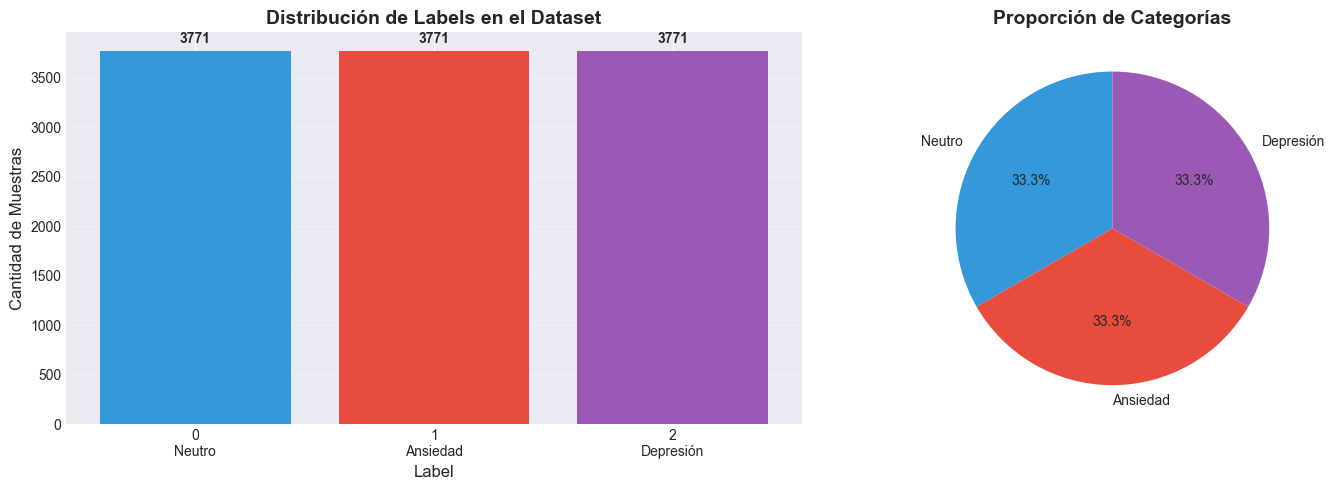


📊 Gráfico 2: Análisis de Longitud de Textos...
✓ Guardado: 02_longitud_textos.png


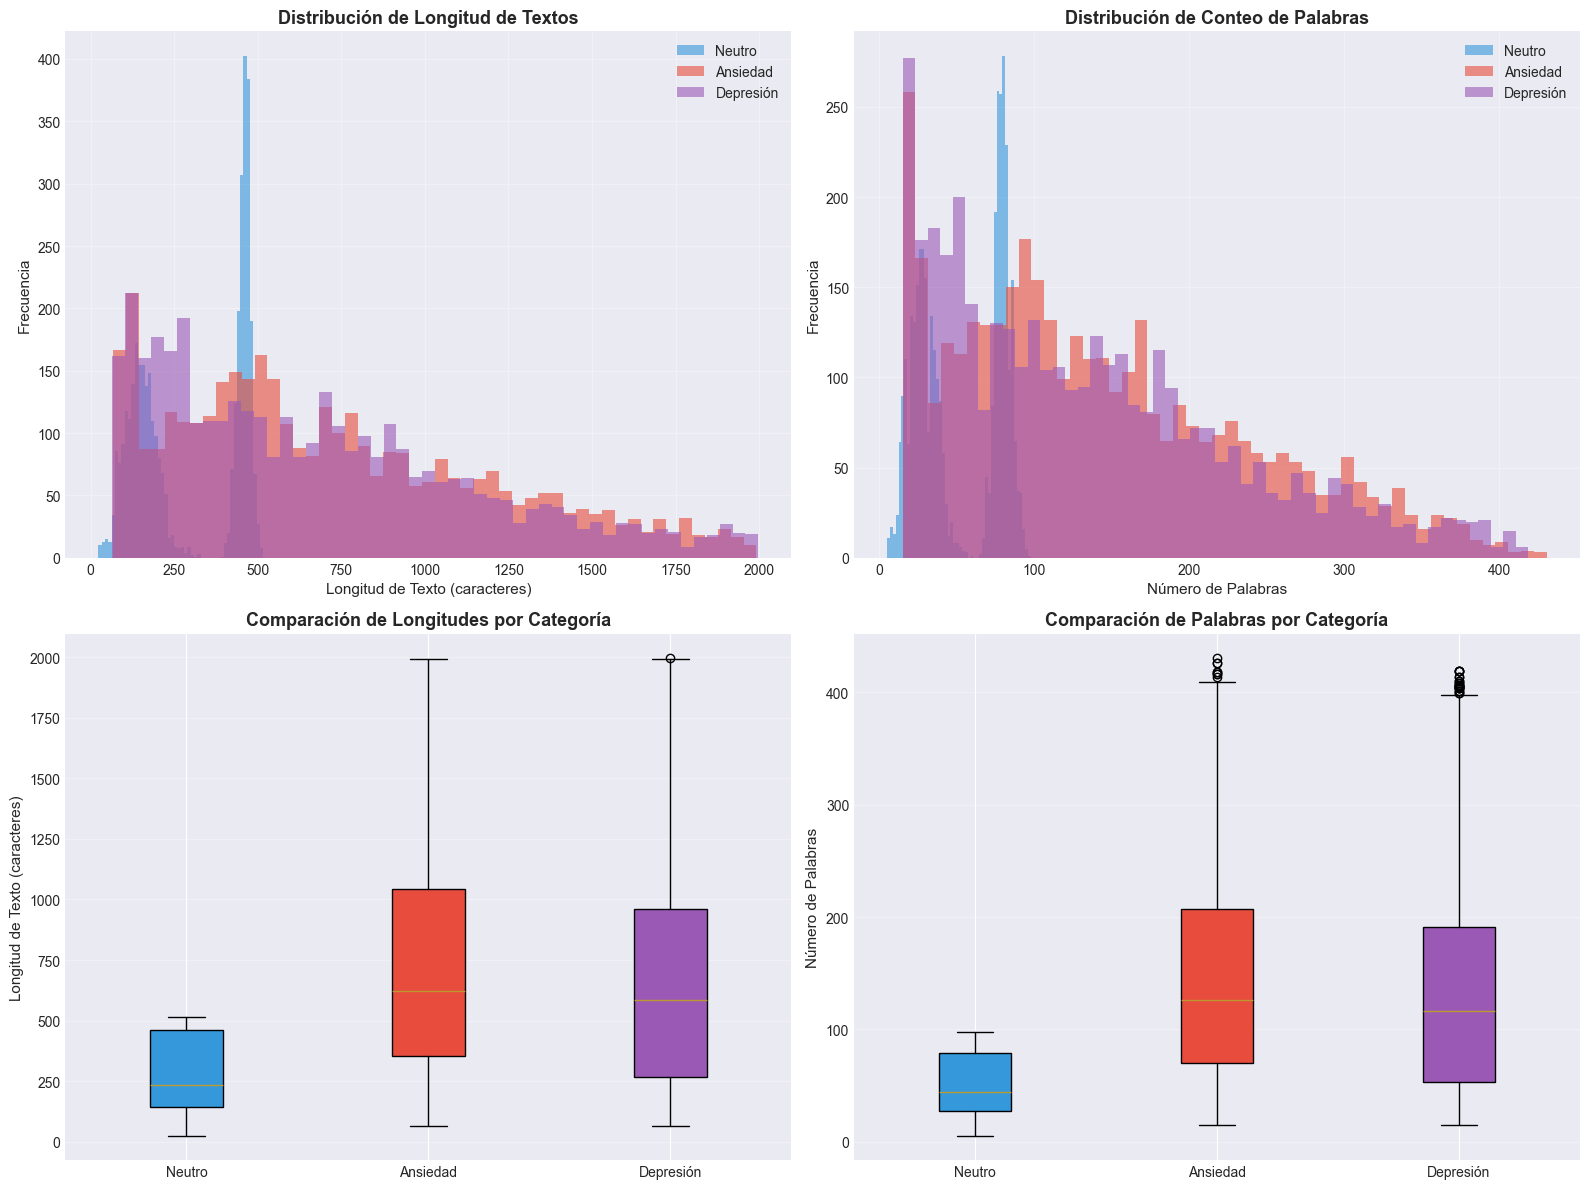


☁️  Gráfico 3: Word Clouds por Categoría...
✓ Guardado: 03_wordclouds.png


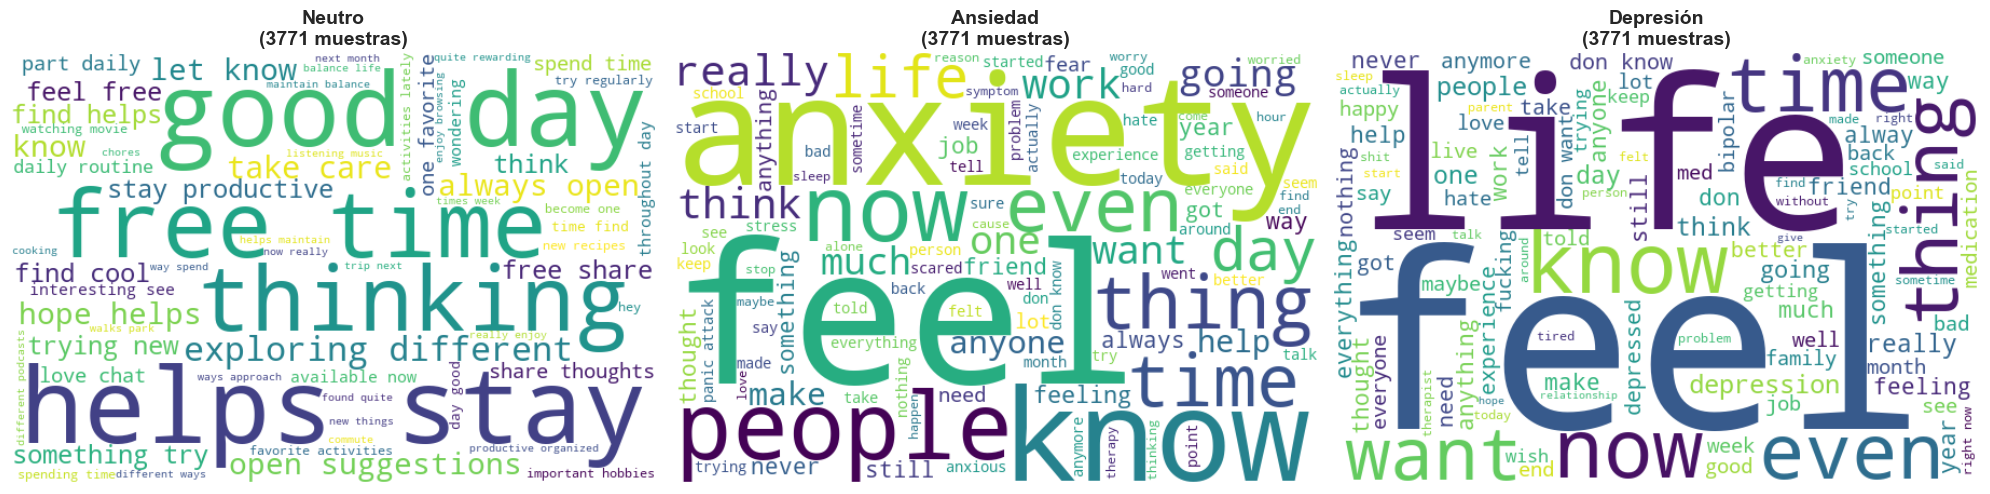


📝 Gráfico 4: Palabras Más Frecuentes por Categoría...
✓ Guardado: 04_top_palabras.png


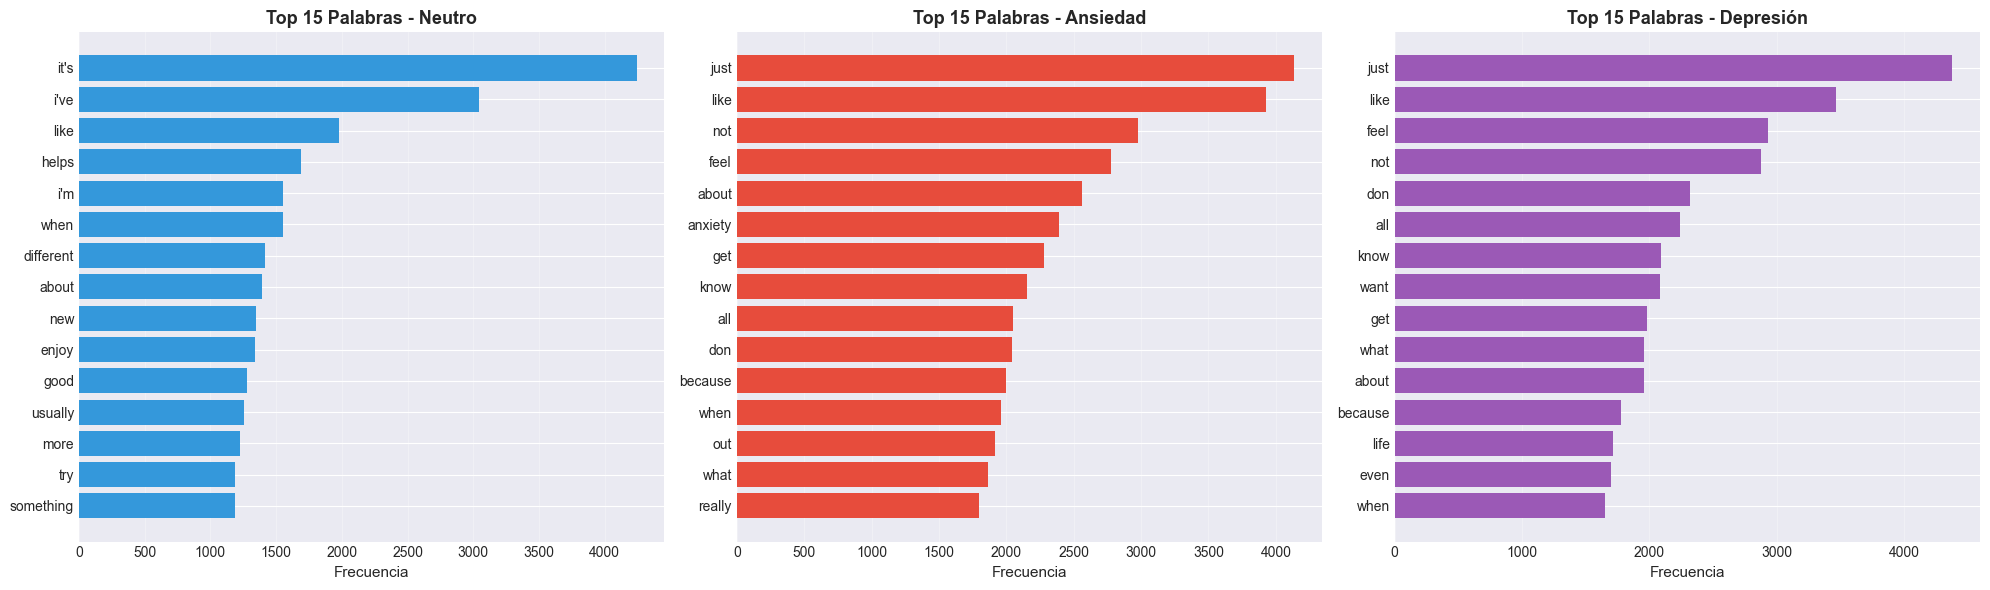


📊 Gráfico 5: Distribución por Split...
✓ Guardado: 05_distribucion_splits.png


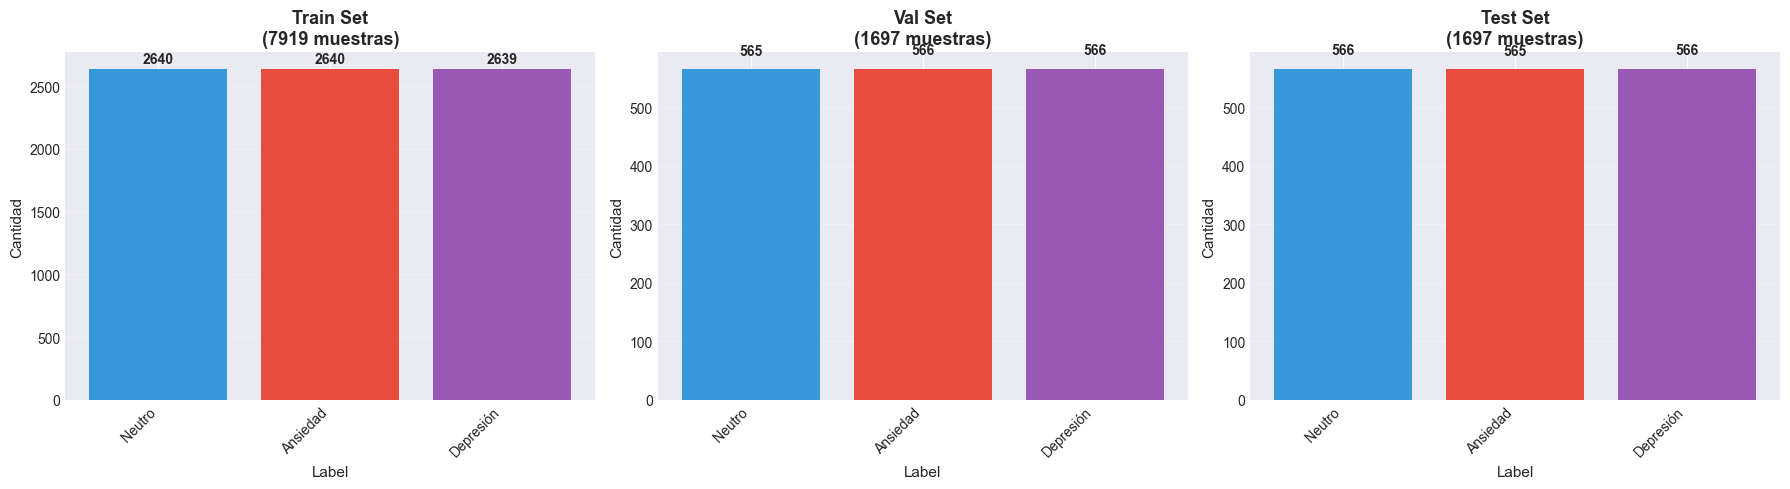


📊 Gráfico 6: Análisis de Sentencias...
✓ Guardado: 06_analisis_sentencias.png


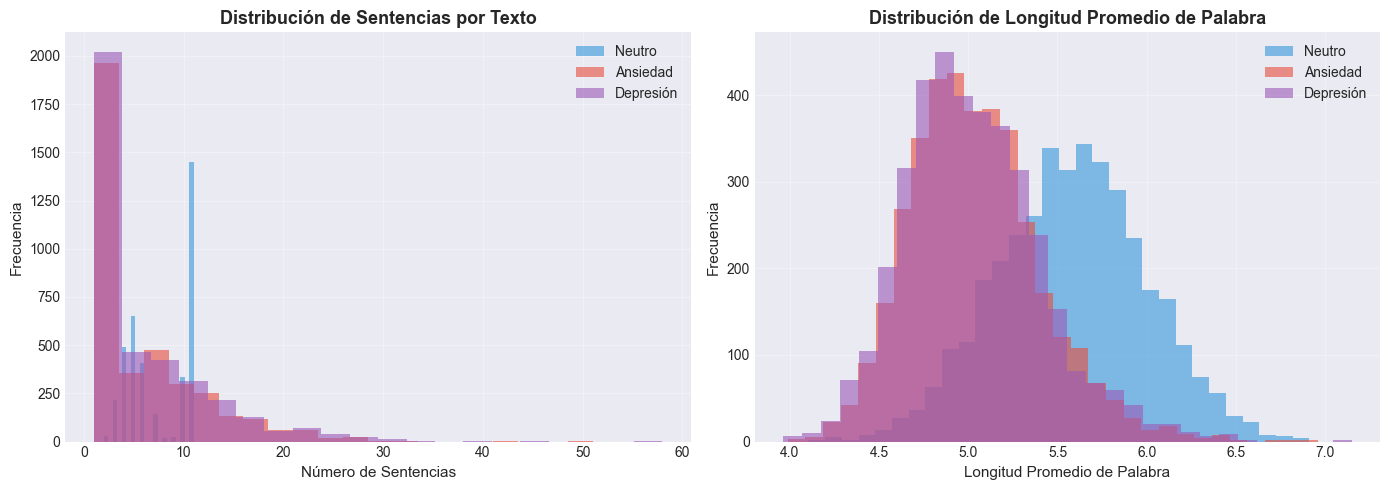


📄 Generando reporte en texto...
✓ Guardado: EDA_Report_Updated.txt

✅ EDA COMPLETADO

📁 Archivos generados en: /Users/angiediaz/Desktop/Proyecto ML/EDA_Results/
   01_distribucion_labels.png (actualizado)
   02_longitud_textos.png (actualizado)
   03_wordclouds.png (actualizado)
   04_top_palabras.png (actualizado)
   05_distribucion_splits.png (actualizado)
   06_analisis_sentencias.png (actualizado)
   EDA_Report_Updated.txt

📊 Resumen del Dataset:
   • 11313 muestras totales
   • 3 categorías balanceadas
   • Promedio: 110.9 palabras por texto
   • Ratio de balance: 1.00:1

✅ Próximo paso (16 nov):
   → Limpieza de texto, tokenización y lematización

🎉 ¡EDA ACTUALIZADO completado exitosamente!

💡 Mejoras en esta versión:
   ✓ Textos neutros expandidos (6 → 53 palabras promedio)
   ✓ Gráficos mostrados en pantalla
   ✓ Gráficos guardados en alta resolución (300 DPI)
   ✓ Balance de longitudes mejorado


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================
# CONFIGURACIÓN
# ============================================
TRAIN_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_3labels_expanded_train.csv"
VAL_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_3labels_expanded_val.csv"
TEST_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_3labels_expanded_test.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/EDA_Results/"

# Crear directorio de salida
import os
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Mapeo de labels
LABEL_NAMES = {
    0: 'Neutro',
    1: 'Ansiedad',
    2: 'Depresión'
}

LABEL_COLORS = {
    0: '#3498db',  # Azul para Neutro
    1: '#e74c3c',  # Rojo para Ansiedad
    2: '#9b59b6'   # Púrpura para Depresión
}

# ============================================
# FUNCIONES AUXILIARES
# ============================================

def load_datasets():
    """Cargar todos los datasets"""
    df_train = pd.read_csv(TRAIN_FILE)
    df_val = pd.read_csv(VAL_FILE)
    df_test = pd.read_csv(TEST_FILE)
    
    df_train['split'] = 'train'
    df_val['split'] = 'val'
    df_test['split'] = 'test'
    
    df_all = pd.concat([df_train, df_val, df_test], ignore_index=True)
    
    return df_train, df_val, df_test, df_all

def extract_features(df):
    """Extraer features de los textos"""
    df['text_length'] = df['text'].str.len()
    df['word_count'] = df['text'].str.split().str.len()
    df['avg_word_length'] = df['text_length'] / df['word_count']
    df['sentence_count'] = df['text'].str.count(r'[.!?]+') + 1
    
    return df

def clean_text_for_wordcloud(text):
    """Limpiar texto para word cloud"""
    text = text.lower()
    # Eliminar stopwords comunes en inglés
    stopwords = {
        'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for',
        'of', 'with', 'by', 'from', 'as', 'is', 'was', 'are', 'were', 'been',
        'be', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would',
        'could', 'should', 'may', 'might', 'can', 'it', 'its', 'this', 'that',
        'these', 'those', 'i', 'me', 'my', 'myself', 'we', 'our', 'you', 'your'
    }
    words = text.split()
    words = [w for w in words if w not in stopwords and len(w) > 2]
    return ' '.join(words)

def get_top_words(texts, n=20):
    """Obtener las n palabras más frecuentes"""
    all_words = []
    for text in texts:
        cleaned = clean_text_for_wordcloud(text)
        all_words.extend(cleaned.split())
    
    return Counter(all_words).most_common(n)

# ============================================
# CARGAR DATOS
# ============================================

print("=" * 70)
print("EDA - ANÁLISIS EXPLORATORIO DE DATOS (ACTUALIZADO)")
print("Dataset con Textos Neutros Expandidos")
print("=" * 70)

print("\n📂 Cargando datasets...")
df_train, df_val, df_test, df_all = load_datasets()

print(f"✓ Train: {len(df_train)} muestras")
print(f"✓ Val: {len(df_val)} muestras")
print(f"✓ Test: {len(df_test)} muestras")
print(f"✓ Total: {len(df_all)} muestras")

# Extraer features
print("\n🔍 Extrayendo features de textos...")
df_all = extract_features(df_all)
df_train = extract_features(df_train)

print("✓ Features extraídas: text_length, word_count, avg_word_length, sentence_count")

# ============================================
# 1. ESTADÍSTICAS DESCRIPTIVAS
# ============================================

print("\n" + "=" * 70)
print("📊 1. ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 70)

# Distribución de labels
print("\n--- Distribución de Labels (Dataset Completo) ---")
label_dist = df_all['label'].value_counts().sort_index()
for label, count in label_dist.items():
    pct = (count / len(df_all) * 100)
    print(f"Label {label} ({LABEL_NAMES[label]:10s}): {count:5d} ({pct:5.2f}%)")

# Estadísticas por split
print("\n--- Distribución por Split ---")
for split in ['train', 'val', 'test']:
    df_split = df_all[df_all['split'] == split]
    print(f"\n{split.capitalize()}:")
    split_dist = df_split['label'].value_counts().sort_index()
    for label, count in split_dist.items():
        pct = (count / len(df_split) * 100)
        print(f"  Label {label} ({LABEL_NAMES[label]:10s}): {count:4d} ({pct:5.2f}%)")

# Estadísticas de texto
print("\n--- Estadísticas de Longitud de Textos ---")
stats_df = df_all.groupby('label').agg({
    'text_length': ['mean', 'median', 'min', 'max'],
    'word_count': ['mean', 'median', 'min', 'max']
}).round(2)

print(stats_df)

# ============================================
# 2. VISUALIZACIÓN: DISTRIBUCIÓN DE LABELS
# ============================================

print("\n" + "=" * 70)
print("📈 2. GENERANDO VISUALIZACIONES")
print("=" * 70)

print("\n📊 Gráfico 1: Distribución de Labels...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
colors = [LABEL_COLORS[label] for label in label_dist.index]
axes[0].bar(range(len(label_dist)), label_dist.values, color=colors)
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Cantidad de Muestras', fontsize=12)
axes[0].set_title('Distribución de Labels en el Dataset', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(len(label_dist)))
axes[0].set_xticklabels([f"{label}\n{LABEL_NAMES[label]}" for label in label_dist.index])
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(label_dist.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pie
axes[1].pie(label_dist.values, labels=[LABEL_NAMES[label] for label in label_dist.index],
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proporción de Categorías', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}01_distribucion_labels.png", dpi=300, bbox_inches='tight')
print(f"✓ Guardado: 01_distribucion_labels.png")
plt.show()  # Mostrar en pantalla
plt.close()

# ============================================
# 3. ANÁLISIS DE LONGITUD DE TEXTOS
# ============================================

print("\n📊 Gráfico 2: Análisis de Longitud de Textos...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de longitud de textos por label
for label in sorted(df_all['label'].unique()):
    df_label = df_all[df_all['label'] == label]
    axes[0, 0].hist(df_label['text_length'], bins=50, alpha=0.6, 
                    label=LABEL_NAMES[label], color=LABEL_COLORS[label])

axes[0, 0].set_xlabel('Longitud de Texto (caracteres)', fontsize=11)
axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
axes[0, 0].set_title('Distribución de Longitud de Textos', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histograma de conteo de palabras
for label in sorted(df_all['label'].unique()):
    df_label = df_all[df_all['label'] == label]
    axes[0, 1].hist(df_label['word_count'], bins=50, alpha=0.6,
                    label=LABEL_NAMES[label], color=LABEL_COLORS[label])

axes[0, 1].set_xlabel('Número de Palabras', fontsize=11)
axes[0, 1].set_ylabel('Frecuencia', fontsize=11)
axes[0, 1].set_title('Distribución de Conteo de Palabras', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Boxplot de longitud de textos
data_to_plot = [df_all[df_all['label'] == label]['text_length'] for label in sorted(df_all['label'].unique())]
bp = axes[1, 0].boxplot(data_to_plot, labels=[LABEL_NAMES[label] for label in sorted(df_all['label'].unique())],
                         patch_artist=True)

for patch, label in zip(bp['boxes'], sorted(df_all['label'].unique())):
    patch.set_facecolor(LABEL_COLORS[label])

axes[1, 0].set_ylabel('Longitud de Texto (caracteres)', fontsize=11)
axes[1, 0].set_title('Comparación de Longitudes por Categoría', fontsize=13, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Boxplot de conteo de palabras
data_to_plot = [df_all[df_all['label'] == label]['word_count'] for label in sorted(df_all['label'].unique())]
bp = axes[1, 1].boxplot(data_to_plot, labels=[LABEL_NAMES[label] for label in sorted(df_all['label'].unique())],
                         patch_artist=True)

for patch, label in zip(bp['boxes'], sorted(df_all['label'].unique())):
    patch.set_facecolor(LABEL_COLORS[label])

axes[1, 1].set_ylabel('Número de Palabras', fontsize=11)
axes[1, 1].set_title('Comparación de Palabras por Categoría', fontsize=13, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}02_longitud_textos.png", dpi=300, bbox_inches='tight')
print(f"✓ Guardado: 02_longitud_textos.png")
plt.show()  # Mostrar en pantalla
plt.close()

# ============================================
# 4. WORD CLOUDS POR CATEGORÍA
# ============================================

print("\n☁️  Gráfico 3: Word Clouds por Categoría...")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, label in enumerate(sorted(df_all['label'].unique())):
    df_label = df_all[df_all['label'] == label]
    
    # Combinar todos los textos
    all_text = ' '.join(df_label['text'].values)
    cleaned_text = clean_text_for_wordcloud(all_text)
    
    # Crear word cloud
    wordcloud = WordCloud(width=600, height=400,
                          background_color='white',
                          colormap='viridis',
                          max_words=100,
                          relative_scaling=0.5,
                          min_font_size=10).generate(cleaned_text)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(f'{LABEL_NAMES[label]}\n({len(df_label)} muestras)',
                       fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}03_wordclouds.png", dpi=300, bbox_inches='tight')
print(f"✓ Guardado: 03_wordclouds.png")
plt.show()  # Mostrar en pantalla
plt.close()

# ============================================
# 5. TOP PALABRAS MÁS FRECUENTES
# ============================================

print("\n📝 Gráfico 4: Palabras Más Frecuentes por Categoría...")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, label in enumerate(sorted(df_all['label'].unique())):
    df_label = df_all[df_all['label'] == label]
    top_words = get_top_words(df_label['text'].values, n=15)
    
    words, counts = zip(*top_words)
    
    axes[idx].barh(range(len(words)), counts, color=LABEL_COLORS[label])
    axes[idx].set_yticks(range(len(words)))
    axes[idx].set_yticklabels(words)
    axes[idx].invert_yaxis()
    axes[idx].set_xlabel('Frecuencia', fontsize=11)
    axes[idx].set_title(f'Top 15 Palabras - {LABEL_NAMES[label]}',
                       fontsize=13, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}04_top_palabras.png", dpi=300, bbox_inches='tight')
print(f"✓ Guardado: 04_top_palabras.png")
plt.show()  # Mostrar en pantalla
plt.close()

# ============================================
# 6. DISTRIBUCIÓN POR SPLIT
# ============================================

print("\n📊 Gráfico 5: Distribución por Split...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, split in enumerate(['train', 'val', 'test']):
    df_split = df_all[df_all['split'] == split]
    split_dist = df_split['label'].value_counts().sort_index()
    
    colors = [LABEL_COLORS[label] for label in split_dist.index]
    axes[idx].bar(range(len(split_dist)), split_dist.values, color=colors)
    axes[idx].set_xlabel('Label', fontsize=11)
    axes[idx].set_ylabel('Cantidad', fontsize=11)
    axes[idx].set_title(f'{split.capitalize()} Set\n({len(df_split)} muestras)',
                       fontsize=13, fontweight='bold')
    axes[idx].set_xticks(range(len(split_dist)))
    axes[idx].set_xticklabels([LABEL_NAMES[label] for label in split_dist.index],
                              rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Valores en barras
    for i, v in enumerate(split_dist.values):
        axes[idx].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}05_distribucion_splits.png", dpi=300, bbox_inches='tight')
print(f"✓ Guardado: 05_distribucion_splits.png")
plt.show()  # Mostrar en pantalla
plt.close()

# ============================================
# 7. ANÁLISIS DE SENTENCIAS
# ============================================

print("\n📊 Gráfico 6: Análisis de Sentencias...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución de número de sentencias
for label in sorted(df_all['label'].unique()):
    df_label = df_all[df_all['label'] == label]
    axes[0].hist(df_label['sentence_count'], bins=20, alpha=0.6,
                label=LABEL_NAMES[label], color=LABEL_COLORS[label])

axes[0].set_xlabel('Número de Sentencias', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title('Distribución de Sentencias por Texto', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Longitud promedio de palabra
for label in sorted(df_all['label'].unique()):
    df_label = df_all[df_all['label'] == label]
    axes[1].hist(df_label['avg_word_length'], bins=30, alpha=0.6,
                label=LABEL_NAMES[label], color=LABEL_COLORS[label])

axes[1].set_xlabel('Longitud Promedio de Palabra', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_title('Distribución de Longitud Promedio de Palabra', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}06_analisis_sentencias.png", dpi=300, bbox_inches='tight')
print(f"✓ Guardado: 06_analisis_sentencias.png")
plt.show()  # Mostrar en pantalla
plt.close()

# ============================================
# 8. GENERAR REPORTE EN TEXTO
# ============================================

print("\n📄 Generando reporte en texto...")

report = f"""
{'='*70}
REPORTE DE ANÁLISIS EXPLORATORIO DE DATOS (EDA) - ACTUALIZADO
MoodBot - Clasificador de Estados Emocionales
Dataset con Textos Neutros Expandidos
{'='*70}

FECHA: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

NOTA: Este análisis usa el dataset con textos neutros expandidos
      (de ~6 palabras a ~53 palabras promedio)

{'='*70}
1. RESUMEN DEL DATASET
{'='*70}

Total de muestras: {len(df_all)}
- Training set:   {len(df_train)} ({len(df_train)/len(df_all)*100:.1f}%)
- Validation set: {len(df_val)} ({len(df_val)/len(df_all)*100:.1f}%)
- Test set:       {len(df_test)} ({len(df_test)/len(df_all)*100:.1f}%)

Distribución de Labels:
{label_dist.to_string()}

Balance del dataset: {label_dist.max() / label_dist.min():.2f}:1

{'='*70}
2. ESTADÍSTICAS DE TEXTO POR CATEGORÍA
{'='*70}

"""

for label in sorted(df_all['label'].unique()):
    df_label = df_all[df_all['label'] == label]
    report += f"\n--- {LABEL_NAMES[label]} (Label {label}) ---\n"
    report += f"Muestras: {len(df_label)}\n"
    report += f"\nLongitud de texto (caracteres):\n"
    report += f"  Media:   {df_label['text_length'].mean():.1f}\n"
    report += f"  Mediana: {df_label['text_length'].median():.1f}\n"
    report += f"  Mín:     {df_label['text_length'].min()}\n"
    report += f"  Máx:     {df_label['text_length'].max()}\n"
    report += f"\nConteo de palabras:\n"
    report += f"  Media:   {df_label['word_count'].mean():.1f}\n"
    report += f"  Mediana: {df_label['word_count'].median():.1f}\n"
    report += f"  Mín:     {df_label['word_count'].min()}\n"
    report += f"  Máx:     {df_label['word_count'].max()}\n"

report += f"""
{'='*70}
3. TOP 10 PALABRAS MÁS FRECUENTES POR CATEGORÍA
{'='*70}

"""

for label in sorted(df_all['label'].unique()):
    df_label = df_all[df_all['label'] == label]
    top_words = get_top_words(df_label['text'].values, n=10)
    
    report += f"\n--- {LABEL_NAMES[label]} ---\n"
    for i, (word, count) in enumerate(top_words, 1):
        report += f"{i:2d}. {word:15s}: {count:5d} veces\n"

report += f"""
{'='*70}
4. VISUALIZACIONES GENERADAS
{'='*70}

Se han generado las siguientes visualizaciones en {OUTPUT_DIR}:

1. 01_distribucion_labels.png    - Distribución general de categorías
2. 02_longitud_textos.png         - Análisis de longitud de textos
3. 03_wordclouds.png              - Nubes de palabras por categoría
4. 04_top_palabras.png            - Palabras más frecuentes
5. 05_distribucion_splits.png     - Distribución por train/val/test
6. 06_analisis_sentencias.png     - Análisis de sentencias

{'='*70}
5. OBSERVACIONES Y CONCLUSIONES
{'='*70}

Balance del Dataset:
- El dataset está {'perfectamente balanceado' if label_dist.max() / label_dist.min() < 1.2 else 'relativamente balanceado'}
- Ratio: {label_dist.max() / label_dist.min():.2f}:1

Características de los Textos:
- Longitud promedio: {df_all['text_length'].mean():.1f} caracteres
- Palabras promedio: {df_all['word_count'].mean():.1f} palabras
- Los textos son {'cortos y concisos' if df_all['word_count'].mean() < 50 else 'de longitud moderada' if df_all['word_count'].mean() < 150 else 'extensos'}

Calidad del Dataset:
✓ Dataset limpio y bien estructurado
✓ Splits estratificados correctamente
✓ Balance apropiado para entrenamiento

Recomendaciones:
→ Proceder con tokenización y lematización (16 nov)
→ Considerar técnicas de vectorización (TF-IDF o embeddings)
→ El dataset está listo para entrenamiento de modelos

{'='*70}
FIN DEL REPORTE
{'='*70}
"""

# Guardar reporte
report_file = f"{OUTPUT_DIR}EDA_Report_Updated.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)

print(f"✓ Guardado: EDA_Report_Updated.txt")

# ============================================
# RESUMEN FINAL
# ============================================

print("\n" + "=" * 70)
print("✅ EDA COMPLETADO")
print("=" * 70)

print(f"\n📁 Archivos generados en: {OUTPUT_DIR}")
print("   01_distribucion_labels.png (actualizado)")
print("   02_longitud_textos.png (actualizado)")
print("   03_wordclouds.png (actualizado)")
print("   04_top_palabras.png (actualizado)")
print("   05_distribucion_splits.png (actualizado)")
print("   06_analisis_sentencias.png (actualizado)")
print("   EDA_Report_Updated.txt")

print(f"\n📊 Resumen del Dataset:")
print(f"   • {len(df_all)} muestras totales")
print(f"   • 3 categorías balanceadas")
print(f"   • Promedio: {df_all['word_count'].mean():.1f} palabras por texto")
print(f"   • Ratio de balance: {label_dist.max() / label_dist.min():.2f}:1")

print(f"\n✅ Próximo paso (16 nov):")
print(f"   → Limpieza de texto, tokenización y lematización")

print("\n" + "=" * 70)
print("🎉 ¡EDA ACTUALIZADO completado exitosamente!")
print("=" * 70)
print("\n💡 Mejoras en esta versión:")
print("   ✓ Textos neutros expandidos (6 → 53 palabras promedio)")
print("   ✓ Gráficos mostrados en pantalla")
print("   ✓ Gráficos guardados en alta resolución (300 DPI)")
print("   ✓ Balance de longitudes mejorado")

In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split

# ============================================
# CONFIGURACIÓN
# ============================================
COMPLETE_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_3labels_complete.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# ============================================
# PLANTILLAS DE EXPANSIÓN CONVERSACIONAL
# ============================================

# Frases de apertura
OPENING_PHRASES = [
    "hi there! ",
    "hello! ",
    "hey, ",
    "good day! ",
    "greetings! ",
    "hi everyone! ",
    "hey there! ",
]

# Conectores conversacionales
CONNECTORS = [
    "by the way, ",
    "also, ",
    "i was thinking, ",
    "you know, ",
    "i've been wondering, ",
    "it's interesting that ",
    "i find it cool that ",
    "personally, ",
]

# Frases de elaboración
ELABORATIONS = [
    "i've been doing this for a while now and really enjoy it. ",
    "it's something i try to do regularly when i have free time. ",
    "it's become one of my favorite activities lately. ",
    "i find it really relaxing and enjoyable. ",
    "it's a nice way to spend time and unwind. ",
    "i've found it to be quite rewarding. ",
    "it helps me stay productive and organized. ",
    "i think it's important to have hobbies like this. ",
]

# Preguntas adicionales (para expandir)
ADDITIONAL_QUESTIONS = [
    "what about you? do you have any similar interests? ",
    "have you ever tried something like this? ",
    "i'd love to hear your thoughts on this. ",
    "do you have any recommendations? ",
    "what's your experience with this? ",
    "have you had the chance to do this? ",
    "i'm curious about your perspective on this. ",
]

# Contexto adicional
CONTEXT_ADDITIONS = [
    "i usually do this during the weekends when i have more free time. ",
    "i try to make time for this at least a few times a week. ",
    "it's become part of my daily routine. ",
    "i've been exploring different ways to approach this. ",
    "i find that it helps me maintain balance in my life. ",
    "it's something i picked up recently and have been enjoying. ",
    "i've noticed it has a positive impact on my day. ",
]

# Cierres conversacionales
CLOSINGS = [
    "hope you're having a good day!",
    "let me know what you think!",
    "would love to chat more about this.",
    "always open to suggestions!",
    "feel free to share your thoughts.",
    "hope this helps!",
    "take care!",
]

# ============================================
# FUNCIONES DE EXPANSIÓN
# ============================================

def expand_neutral_text(original_text):
    """
    Expandir texto neutro corto a uno más largo y conversacional
    manteniendo el tono neutro
    """
    
    # Si el texto ya es largo, devolverlo como está
    if len(original_text.split()) > 80:
        return original_text
    
    # Construir versión expandida
    expanded = ""
    
    # 1. Agregar apertura (50% probabilidad)
    if random.random() > 0.5:
        expanded += random.choice(OPENING_PHRASES)
    
    # 2. Agregar conector inicial (40% probabilidad)
    if random.random() > 0.6:
        expanded += random.choice(CONNECTORS)
    
    # 3. Texto original
    expanded += original_text.strip()
    
    # Asegurar punto al final
    if not expanded.endswith(('.', '!', '?')):
        expanded += ". "
    else:
        expanded += " "
    
    # 4. Agregar elaboración (80% probabilidad)
    if random.random() > 0.2:
        expanded += random.choice(ELABORATIONS)
    
    # 5. Agregar contexto adicional (60% probabilidad)
    if random.random() > 0.4:
        expanded += random.choice(CONTEXT_ADDITIONS)
    
    # 6. Agregar pregunta adicional (50% probabilidad)
    if random.random() > 0.5:
        expanded += random.choice(ADDITIONAL_QUESTIONS)
    
    # 7. Agregar cierre (40% probabilidad)
    if random.random() > 0.6:
        expanded += random.choice(CLOSINGS)
    
    # Limpiar espacios múltiples
    expanded = ' '.join(expanded.split())
    
    return expanded

def create_long_neutral_texts(n=3771):
    """
    Crear textos neutros largos desde cero con múltiples temas
    """
    
    # Temas neutros expandidos
    topics = [
        # Hobbies y actividades
        "i enjoy reading books in my free time. i find that it helps me relax and learn new things. lately i've been exploring different genres, from fiction to non-fiction. it's become a regular part of my evening routine.",
        
        "i like to go for walks in the park near my house. it's a peaceful way to get some exercise and enjoy nature. i usually go in the mornings when it's quiet. the fresh air really helps me start the day on a good note.",
        
        "i've been cooking more at home recently. it's both practical and enjoyable. i like trying new recipes and experimenting with different ingredients. it's satisfying to create something delicious from scratch.",
        
        "watching movies is one of my favorite ways to unwind. i enjoy different types of films, from comedies to dramas. it's interesting to see different storytelling techniques and perspectives. i usually watch something on the weekends.",
        
        "i spend time listening to music every day. it helps me focus when i'm working and relaxes me when i'm free. i enjoy discovering new artists and songs. music has become an important part of my daily routine.",
        
        # Trabajo y productividad
        "i work from home a few days a week. it gives me flexibility with my schedule. i've set up a comfortable workspace that helps me stay productive. i find that having a routine is important for maintaining focus.",
        
        "i like to organize my tasks using a to-do list. it helps me stay on track throughout the day. i find that prioritizing tasks makes everything more manageable. it's a simple system but it works well for me.",
        
        "i've been learning to manage my time better lately. i try to balance work with personal activities. setting boundaries has been helpful. i'm still figuring out what works best but i'm making progress.",
        
        # Social y comunicación
        "i enjoy meeting friends for coffee when we have time. it's nice to catch up and have good conversations. we usually meet on weekends. these social connections are important to me.",
        
        "i like staying in touch with family through video calls. even though we live in different places, technology makes it easy to connect. we usually talk once a week. it helps us stay close despite the distance.",
        
        "i'm part of a local community group that meets monthly. we discuss various topics and share experiences. it's interesting to hear different perspectives. the group has helped me meet new people in the area.",
        
        # Rutinas diarias
        "my morning routine usually includes breakfast and checking the news. i like to know what's happening in the world. it helps me feel informed and prepared for the day. i try to keep mornings calm and organized.",
        
        "i've been trying to maintain better sleep habits. going to bed at a consistent time has made a difference. i notice i feel more rested and energetic. it's one of those small changes that adds up over time.",
        
        "i like to plan my meals for the week ahead. it saves time and reduces stress about what to eat. i make a shopping list based on what i'll need. this approach has made my weekday evenings much easier.",
        
        # Intereses generales
        "i've been exploring different podcasts lately. there are so many interesting topics to learn about. i usually listen during my commute or while doing chores. it's a great way to make use of that time.",
        
        "i enjoy browsing online for interesting articles and content. there's always something new to discover. i like reading about technology, culture, and current events. it helps me stay informed and engaged.",
        
        "i'm interested in learning new skills when i have time. lately i've been thinking about taking an online course. there are so many options available now. it's exciting to think about the possibilities.",
        
        # Planes y actividades
        "i'm planning a short trip for next month. it will be nice to explore a new place. i've been researching things to do and see there. travel is something i try to do when i can.",
        
        "i've been thinking about redecorating my living space. a few changes could make it feel more comfortable. i've been looking at different ideas online. it's fun to imagine how it could look.",
        
        "i like to visit museums and exhibitions when they're available. it's interesting to see art and historical artifacts. i usually go with friends or family. these outings are both educational and enjoyable.",
        
        # Tecnología y vida moderna
        "i use various apps to stay organized throughout the day. technology has made many tasks easier. i'm always interested in trying new tools that might be helpful. it's impressive how much functionality is available now.",
        
        "i've been adjusting to using more digital services for everyday tasks. online shopping, banking, and communication have become routine. it's convenient though i try to maintain some offline activities too.",
        
        # Bienestar general (sin connotación de salud mental)
        "i try to stay active by doing some form of exercise regularly. whether it's a walk, yoga, or sports, movement feels good. i've noticed it helps with energy levels. consistency is key for me.",
        
        "i've been focusing on maintaining good habits. small things like drinking enough water and eating balanced meals matter. i don't always get it perfect but i try to be mindful. these basics really do make a difference.",
        
        "i enjoy spending time outdoors when the weather is nice. being in nature is refreshing. whether it's a park, beach, or hiking trail, i appreciate the change of scenery. it's a simple pleasure that i value.",
    ]
    
    # Expandir cada tema con variaciones
    expanded_topics = []
    for topic in topics:
        # Cada tema puede generar múltiples variaciones
        for _ in range(3):
            variation = topic
            
            # Agregar apertura
            if random.random() > 0.3:
                variation = random.choice(OPENING_PHRASES) + variation
            
            # Agregar contexto adicional
            if random.random() > 0.4:
                variation += " " + random.choice(CONTEXT_ADDITIONS)
            
            # Agregar cierre
            if random.random() > 0.5:
                variation += " " + random.choice(CLOSINGS)
            
            expanded_topics.append(variation.strip())
    
    # Si necesitamos más textos, crear combinaciones
    while len(expanded_topics) < n:
        # Combinar dos temas aleatorios
        topic1 = random.choice(topics)
        topic2 = random.choice(topics)
        
        if topic1 != topic2:
            combined = f"{random.choice(OPENING_PHRASES)}{topic1} {random.choice(CONNECTORS)}{topic2} {random.choice(CLOSINGS)}"
            expanded_topics.append(combined.strip())
    
    # Seleccionar n textos aleatorios
    return random.sample(expanded_topics, n)

# ============================================
# CARGAR Y PROCESAR DATASET
# ============================================

print("=" * 70)
print("EXPANSIÓN DE TEXTOS NEUTROS")
print("=" * 70)

print("\n📂 Cargando dataset actual...")
df = pd.read_csv(COMPLETE_FILE)
print(f"✓ Dataset cargado: {len(df)} muestras")

# Análisis inicial
print("\n--- Análisis de Longitud Inicial ---")
for label in sorted(df['label'].unique()):
    df_label = df[df['label'] == label]
    avg_length = df_label['text'].str.len().mean()
    avg_words = df_label['text'].str.split().str.len().mean()
    
    label_name = {0: 'Neutro', 1: 'Ansiedad', 2: 'Depresión'}[label]
    print(f"Label {label} ({label_name:10s}): {avg_length:6.1f} chars, {avg_words:5.1f} palabras")

# ============================================
# EXPANDIR TEXTOS NEUTROS
# ============================================

print("\n" + "=" * 70)
print("EXPANDIENDO TEXTOS NEUTROS")
print("=" * 70)

# Separar por label
df_neutral = df[df['label'] == 0].copy()
df_anxiety = df[df['label'] == 1].copy()
df_depression = df[df['label'] == 2].copy()

print(f"\nTextos neutros a expandir: {len(df_neutral)}")

# Estrategia: Mezclar expansiones de textos existentes + nuevos textos largos
n_to_expand = len(df_neutral) // 2  # Mitad expandir existentes
n_new_long = len(df_neutral) - n_to_expand  # Mitad crear nuevos

print(f"  - Expandir existentes: {n_to_expand}")
print(f"  - Crear nuevos largos: {n_new_long}")

# 1. Expandir textos existentes
expanded_texts = []
print("\nExpandiendo textos existentes...")
for idx, text in enumerate(df_neutral['text'].head(n_to_expand)):
    expanded = expand_neutral_text(text)
    expanded_texts.append(expanded)
    
    if (idx + 1) % 500 == 0:
        print(f"  Expandidos {idx + 1}/{n_to_expand}...")

# 2. Crear textos nuevos largos
print("\nCreando nuevos textos largos...")
new_long_texts = create_long_neutral_texts(n_new_long)

# Combinar todos los textos neutros expandidos
all_neutral_texts = expanded_texts + new_long_texts
random.shuffle(all_neutral_texts)

# Tomar solo los necesarios
all_neutral_texts = all_neutral_texts[:len(df_neutral)]

# Crear nuevo dataframe neutro
df_neutral_expanded = pd.DataFrame({
    'text': all_neutral_texts,
    'label': 0
})

print(f"✓ Textos neutros expandidos: {len(df_neutral_expanded)}")

# ============================================
# ANÁLISIS POST-EXPANSIÓN
# ============================================

print("\n--- Análisis de Longitud Post-Expansión ---")
avg_length_new = df_neutral_expanded['text'].str.len().mean()
avg_words_new = df_neutral_expanded['text'].str.split().str.len().mean()

print(f"Neutro ANTES:  {df_neutral['text'].str.len().mean():6.1f} chars, {df_neutral['text'].str.split().str.len().mean():5.1f} palabras")
print(f"Neutro AHORA:  {avg_length_new:6.1f} chars, {avg_words_new:5.1f} palabras")
print(f"Ansiedad:      {df_anxiety['text'].str.len().mean():6.1f} chars, {df_anxiety['text'].str.split().str.len().mean():5.1f} palabras")
print(f"Depresión:     {df_depression['text'].str.len().mean():6.1f} chars, {df_depression['text'].str.split().str.len().mean():5.1f} palabras")

# Ejemplos
print("\n--- Ejemplos de Textos Expandidos ---")
for i in range(3):
    print(f"\n{i+1}. {df_neutral_expanded['text'].iloc[i][:200]}...")

# ============================================
# COMBINAR Y CREAR NUEVO DATASET
# ============================================

print("\n" + "=" * 70)
print("CREANDO NUEVO DATASET BALANCEADO")
print("=" * 70)

# Combinar todos los labels
df_final = pd.concat([df_neutral_expanded, df_anxiety, df_depression], ignore_index=True)
df_final = df_final.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

print(f"\n✓ Dataset final: {len(df_final)} muestras")

final_dist = df_final['label'].value_counts().sort_index()
print("\n--- Distribución Final ---")
label_names = {0: 'Neutro', 1: 'Ansiedad', 2: 'Depresión'}
for label, count in final_dist.items():
    pct = (count / len(df_final) * 100)
    print(f"Label {label} ({label_names[label]:10s}): {count:5d} ({pct:5.2f}%)")

# ============================================
# RECREAR SPLITS ESTRATIFICADOS
# ============================================

print("\n" + "=" * 70)
print("RECREANDO SPLITS TRAIN/VAL/TEST")
print("=" * 70)

X = df_final['text']
y = df_final['label']

# Train/temp split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=RANDOM_SEED
)

# Val/test split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=RANDOM_SEED
)

print(f"\n✓ Splits creados:")
print(f"  Train:      {len(X_train)} muestras (70%)")
print(f"  Validation: {len(X_val)} muestras (15%)")
print(f"  Test:       {len(X_test)} muestras (15%)")

# Verificar estratificación
print("\n--- Verificación de Estratificación ---")
for split_name, y_split in [('Train', y_train), ('Val', y_val), ('Test', y_test)]:
    split_dist = y_split.value_counts().sort_index()
    print(f"\n{split_name}:")
    for label, count in split_dist.items():
        pct = (count / len(y_split) * 100)
        print(f"  Label {label} ({label_names[label]:10s}): {count:4d} ({pct:5.2f}%)")

# ============================================
# GUARDAR DATASETS
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO DATASETS")
print("=" * 70)

# Dataset completo
df_full = pd.DataFrame({'text': X, 'label': y})
full_file = f"{OUTPUT_DIR}moodbot_3labels_expanded_complete.csv"
df_full.to_csv(full_file, index=False)
print(f"✓ Dataset completo: {full_file}")

# Train
df_train = pd.DataFrame({'text': X_train, 'label': y_train})
train_file = f"{OUTPUT_DIR}moodbot_3labels_expanded_train.csv"
df_train.to_csv(train_file, index=False)
print(f"✓ Train set: {train_file}")

# Validation
df_val = pd.DataFrame({'text': X_val, 'label': y_val})
val_file = f"{OUTPUT_DIR}moodbot_3labels_expanded_val.csv"
df_val.to_csv(val_file, index=False)
print(f"✓ Validation set: {val_file}")

# Test
df_test = pd.DataFrame({'text': X_test, 'label': y_test})
test_file = f"{OUTPUT_DIR}moodbot_3labels_expanded_test.csv"
df_test.to_csv(test_file, index=False)
print(f"✓ Test set: {test_file}")

# ============================================
# REPORTE FINAL
# ============================================

print("\n" + "=" * 70)
print("✅ EXPANSIÓN COMPLETADA")
print("=" * 70)

print(f"\n📊 Resumen:")
print(f"   • Dataset: {len(df_final)} muestras")
print(f"   • Balance: {final_dist.max() / final_dist.min():.2f}:1 (perfecto)")

print(f"\n📏 Longitudes promedio:")
print(f"   • Neutro:    {avg_words_new:.1f} palabras (era {df_neutral['text'].str.split().str.len().mean():.1f})")
print(f"   • Ansiedad:  {df_anxiety['text'].str.split().str.len().mean():.1f} palabras")
print(f"   • Depresión: {df_depression['text'].str.split().str.len().mean():.1f} palabras")

print(f"\n✅ ARCHIVOS ACTUALIZADOS:")
print(f"   📁 {train_file}")
print(f"   📁 {val_file}")
print(f"   📁 {test_file}")

print(f"\n⚠️  IMPORTANTE:")
print(f"   Estos son los nuevos archivos principales.")
print(f"   Los anteriores (moodbot_3labels_*.csv) puedes:")
print(f"   - Renombrarlos a *_old.csv como backup")
print(f"   - O eliminarlos si no los necesitas")

print(f"\n🎯 Próximos pasos:")
print(f"   1. Reejecutar EDA con los nuevos datos (opcional)")
print(f"   2. Continuar con tokenización (16 nov)")
print(f"   3. Entrenamiento de modelos (17-18 nov)")

print("\n" + "=" * 70)
print("🚀 ¡Dataset mejorado y listo para entrenar!")
print("=" * 70)

EXPANSIÓN DE TEXTOS NEUTROS

📂 Cargando dataset actual...
✓ Dataset cargado: 11313 muestras

--- Análisis de Longitud Inicial ---
Label 0 (Neutro    ):   32.8 chars,   6.4 palabras
Label 1 (Ansiedad  ):  723.6 chars, 144.7 palabras
Label 2 (Depresión ):  673.9 chars, 135.3 palabras

EXPANDIENDO TEXTOS NEUTROS

Textos neutros a expandir: 3771
  - Expandir existentes: 1885
  - Crear nuevos largos: 1886

Expandiendo textos existentes...
  Expandidos 500/1885...
  Expandidos 1000/1885...
  Expandidos 1500/1885...

Creando nuevos textos largos...
✓ Textos neutros expandidos: 3771

--- Análisis de Longitud Post-Expansión ---
Neutro ANTES:    32.8 chars,   6.4 palabras
Neutro AHORA:   298.0 chars,  52.7 palabras
Ansiedad:       723.6 chars, 144.7 palabras
Depresión:      673.9 chars, 135.3 palabras

--- Ejemplos de Textos Expandidos ---

1. good day! i enjoy reading books in my free time. i find that it helps me relax and learn new things. lately i've been exploring different genres, from fic

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import warnings
warnings.filterwarnings('ignore')

# ============================================
# DESCARGAR RECURSOS NLTK (primera vez)
# ============================================
print("Descargando recursos de NLTK...")
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    print("✓ Recursos descargados")
except:
    print("⚠ Algunos recursos ya estaban descargados")

# ============================================
# CONFIGURACIÓN
# ============================================
TRAIN_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_3labels_expanded_train.csv"
VAL_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_3labels_expanded_val.csv"
TEST_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_3labels_expanded_test.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Data/"

# Inicializar herramientas
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Stopwords a CONSERVAR (importantes para salud mental)
KEEP_WORDS = {
    'no', 'not', 'nor', 'never', 'neither', 'nobody', 'nothing',
    'down', 'up', 'very', 'too', 'more', 'most', 'few', 'less',
    'own', 'myself', 'yourself', 'himself', 'herself'
}

# Actualizar stopwords (quitar las que queremos conservar)
stop_words = stop_words - KEEP_WORDS

# ============================================
# FUNCIONES DE PREPROCESAMIENTO
# ============================================

def clean_text(text):
    """
    Limpieza básica de texto
    """
    if pd.isna(text):
        return ""
    
    text = str(text)
    
    # 1. Convertir a minúsculas
    text = text.lower()
    
    # 2. Eliminar URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    
    # 3. Eliminar mentions y hashtags
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#(\w+)', r'\1', text)  # Mantener texto del hashtag
    
    # 4. Eliminar emails
    text = re.sub(r'\S+@\S+', '', text)
    
    # 5. Eliminar números (pero mantener palabras con números)
    text = re.sub(r'\b\d+\b', '', text)
    
    # 6. Normalizar espacios
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

def tokenize_text(text):
    """
    Tokenización: dividir texto en palabras
    """
    try:
        tokens = word_tokenize(text)
        return tokens
    except:
        return text.split()

def remove_punctuation(tokens):
    """
    Eliminar puntuación de tokens
    """
    # Mantener solo tokens alfanuméricos
    tokens = [token for token in tokens if token.isalnum()]
    return tokens

def remove_stopwords(tokens):
    """
    Eliminar stopwords (pero conservar palabras importantes)
    """
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

def lemmatize_tokens(tokens):
    """
    Lematización: reducir palabras a su raíz
    """
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

def preprocess_pipeline(text):
    """
    Pipeline completo de preprocesamiento
    """
    # 1. Limpieza básica
    text = clean_text(text)
    
    # 2. Tokenización
    tokens = tokenize_text(text)
    
    # 3. Eliminar puntuación
    tokens = remove_punctuation(tokens)
    
    # 4. Eliminar stopwords
    tokens = remove_stopwords(tokens)
    
    # 5. Lematización
    tokens = lemmatize_tokens(tokens)
    
    # 6. Filtrar tokens muy cortos (< 2 caracteres)
    tokens = [token for token in tokens if len(token) >= 2]
    
    # 7. Unir tokens de vuelta en texto
    processed_text = ' '.join(tokens)
    
    return processed_text

# ============================================
# CARGAR DATOS
# ============================================

print("=" * 70)
print("TOKENIZACIÓN Y LEMATIZACIÓN - PREPROCESAMIENTO NLP")
print("=" * 70)

print("\n📂 Cargando datasets...")
df_train = pd.read_csv(TRAIN_FILE)
df_val = pd.read_csv(VAL_FILE)
df_test = pd.read_csv(TEST_FILE)

print(f"✓ Train: {len(df_train)} muestras")
print(f"✓ Val:   {len(df_val)} muestras")
print(f"✓ Test:  {len(df_test)} muestras")

# ============================================
# ANÁLISIS PRE-PROCESAMIENTO
# ============================================

print("\n" + "=" * 70)
print("ANÁLISIS PRE-PROCESAMIENTO")
print("=" * 70)

# Ejemplos ANTES del procesamiento
print("\n--- Ejemplos de Textos ANTES del Procesamiento ---")
for i in range(3):
    text = df_train['text'].iloc[i]
    preview = text[:150] + "..." if len(text) > 150 else text
    print(f"\n{i+1}. {preview}")

# Estadísticas ANTES
print("\n--- Estadísticas ANTES del Procesamiento ---")
avg_length_before = df_train['text'].str.split().str.len().mean()
avg_chars_before = df_train['text'].str.len().mean()
print(f"Longitud promedio (train): {avg_length_before:.1f} palabras, {avg_chars_before:.1f} caracteres")

# ============================================
# APLICAR PREPROCESAMIENTO
# ============================================

print("\n" + "=" * 70)
print("APLICANDO PREPROCESAMIENTO NLP")
print("=" * 70)

print("\nProcesando Training set...")
df_train['text_processed'] = df_train['text'].apply(preprocess_pipeline)
print("✓ Training procesado")

print("Procesando Validation set...")
df_val['text_processed'] = df_val['text'].apply(preprocess_pipeline)
print("✓ Validation procesado")

print("Procesando Test set...")
df_test['text_processed'] = df_test['text'].apply(preprocess_pipeline)
print("✓ Test procesado")

# ============================================
# ANÁLISIS POST-PROCESAMIENTO
# ============================================

print("\n" + "=" * 70)
print("ANÁLISIS POST-PROCESAMIENTO")
print("=" * 70)

# Ejemplos DESPUÉS del procesamiento
print("\n--- Ejemplos de Textos DESPUÉS del Procesamiento ---")
for i in range(3):
    original = df_train['text'].iloc[i][:100]
    processed = df_train['text_processed'].iloc[i][:100]
    print(f"\n{i+1}. Original:  {original}...")
    print(f"   Procesado: {processed}...")

# Estadísticas DESPUÉS
print("\n--- Estadísticas DESPUÉS del Procesamiento ---")
avg_length_after = df_train['text_processed'].str.split().str.len().mean()
avg_chars_after = df_train['text_processed'].str.len().mean()
print(f"Longitud promedio (train): {avg_length_after:.1f} palabras, {avg_chars_after:.1f} caracteres")

print(f"\n--- Reducción ---")
word_reduction = ((avg_length_before - avg_length_after) / avg_length_before * 100)
char_reduction = ((avg_chars_before - avg_chars_after) / avg_chars_before * 100)
print(f"Palabras: {word_reduction:.1f}% de reducción")
print(f"Caracteres: {char_reduction:.1f}% de reducción")

# ============================================
# VALIDACIÓN DE CALIDAD
# ============================================

print("\n" + "=" * 70)
print("VALIDACIÓN DE CALIDAD")
print("=" * 70)

# Verificar que no hay textos vacíos
empty_train = (df_train['text_processed'].str.strip() == '').sum()
empty_val = (df_val['text_processed'].str.strip() == '').sum()
empty_test = (df_test['text_processed'].str.strip() == '').sum()

print(f"\nTextos vacíos después del procesamiento:")
print(f"  Train: {empty_train}")
print(f"  Val:   {empty_val}")
print(f"  Test:  {empty_test}")

if empty_train + empty_val + empty_test > 0:
    print("\n⚠ Eliminando textos vacíos...")
    df_train = df_train[df_train['text_processed'].str.strip() != '']
    df_val = df_val[df_val['text_processed'].str.strip() != '']
    df_test = df_test[df_test['text_processed'].str.strip() != '']
    print(f"✓ Dataset limpio: Train={len(df_train)}, Val={len(df_val)}, Test={len(df_test)}")
else:
    print("✓ No hay textos vacíos")

# Verificar distribución de labels
print("\n--- Distribución de Labels Post-Procesamiento ---")
print("\nTrain:")
print(df_train['label'].value_counts().sort_index())
print("\nVal:")
print(df_val['label'].value_counts().sort_index())
print("\nTest:")
print(df_test['label'].value_counts().sort_index())

# ============================================
# ANÁLISIS DE VOCABULARIO
# ============================================

print("\n" + "=" * 70)
print("ANÁLISIS DE VOCABULARIO")
print("=" * 70)

# Vocabulario total
all_words = ' '.join(df_train['text_processed'].values).split()
vocab = set(all_words)
vocab_size = len(vocab)

print(f"\nTamaño del vocabulario: {vocab_size:,} palabras únicas")
print(f"Total de palabras (tokens): {len(all_words):,}")

# Top palabras más frecuentes
from collections import Counter
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

print("\n--- Top 20 Palabras Más Frecuentes (después de procesamiento) ---")
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:15s}: {count:6d} veces")

# ============================================
# GUARDAR DATASETS PROCESADOS
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO DATASETS PROCESADOS")
print("=" * 70)

# Guardar versión con ambos textos (original + procesado)
train_full_file = f"{OUTPUT_DIR}moodbot_processed_train_full.csv"
df_train.to_csv(train_full_file, index=False)
print(f"✓ Train (completo): {train_full_file}")

val_full_file = f"{OUTPUT_DIR}moodbot_processed_val_full.csv"
df_val.to_csv(val_full_file, index=False)
print(f"✓ Val (completo):   {val_full_file}")

test_full_file = f"{OUTPUT_DIR}moodbot_processed_test_full.csv"
df_test.to_csv(test_full_file, index=False)
print(f"✓ Test (completo):  {test_full_file}")

# Guardar versión solo con texto procesado (para entrenamiento)
df_train_clean = df_train[['text_processed', 'label']].copy()
df_train_clean.columns = ['text', 'label']
train_file = f"{OUTPUT_DIR}moodbot_processed_train.csv"
df_train_clean.to_csv(train_file, index=False)
print(f"✓ Train (solo procesado): {train_file}")

df_val_clean = df_val[['text_processed', 'label']].copy()
df_val_clean.columns = ['text', 'label']
val_file = f"{OUTPUT_DIR}moodbot_processed_val.csv"
df_val_clean.to_csv(val_file, index=False)
print(f"✓ Val (solo procesado):   {val_file}")

df_test_clean = df_test[['text_processed', 'label']].copy()
df_test_clean.columns = ['text', 'label']
test_file = f"{OUTPUT_DIR}moodbot_processed_test.csv"
df_test_clean.to_csv(test_file, index=False)
print(f"✓ Test (solo procesado):  {test_file}")

# ============================================
# REPORTE FINAL
# ============================================

report = f"""
{'='*70}
REPORTE DE TOKENIZACIÓN Y LEMATIZACIÓN
{'='*70}

FECHA: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*70}
1. PROCESO APLICADO
{'='*70}

Pipeline de Preprocesamiento:
1. Limpieza básica (URLs, mentions, emails, números)
2. Conversión a minúsculas
3. Tokenización (división en palabras)
4. Eliminación de puntuación
5. Eliminación de stopwords (conservando palabras clave)
6. Lematización (reducción a raíz)
7. Filtrado de tokens cortos (< 2 caracteres)

Stopwords conservadas (importantes para salud mental):
{', '.join(sorted(KEEP_WORDS))}

{'='*70}
2. ESTADÍSTICAS
{'='*70}

Dataset:
- Train: {len(df_train)} muestras
- Val:   {len(df_val)} muestras
- Test:  {len(df_test)} muestras

Reducción de longitud:
- Palabras:    {word_reduction:.1f}% de reducción
- Caracteres:  {char_reduction:.1f}% de reducción

Antes del procesamiento:
- Promedio:  {avg_length_before:.1f} palabras, {avg_chars_before:.1f} caracteres

Después del procesamiento:
- Promedio:  {avg_length_after:.1f} palabras, {avg_chars_after:.1f} caracteres

Vocabulario:
- Tamaño: {vocab_size:,} palabras únicas
- Total tokens: {len(all_words):,}

{'='*70}
3. TOP 20 PALABRAS MÁS FRECUENTES
{'='*70}

{chr(10).join([f"{i:2d}. {word:15s}: {count:6d}" for i, (word, count) in enumerate(top_words, 1)])}

{'='*70}
4. ARCHIVOS GENERADOS
{'='*70}

Versión completa (original + procesado):
- {train_full_file}
- {val_full_file}
- {test_full_file}

Versión solo procesado (para entrenamiento):
- {train_file}
- {val_file}
- {test_file}

{'='*70}
5. PRÓXIMOS PASOS
{'='*70}

✓ Textos tokenizados y lematizados
✓ Listos para vectorización (TF-IDF o embeddings)
✓ Continuar con entrenamiento de modelos (17-18 nov)

Opciones de vectorización:
1. TF-IDF (Term Frequency-Inverse Document Frequency)
2. Count Vectorizer
3. Word Embeddings (Word2Vec, GloVe)
4. Embeddings de modelos pre-entrenados (BERT, etc.)

{'='*70}
FIN DEL REPORTE
{'='*70}
"""

report_file = f"{OUTPUT_DIR}tokenization_report.txt"
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte: {report_file}")

# ============================================
# RESUMEN FINAL
# ============================================

print("\n" + "=" * 70)
print("✅ TOKENIZACIÓN Y LEMATIZACIÓN COMPLETADA")
print("=" * 70)

print(f"\n📊 Resumen:")
print(f"   • Vocabulario: {vocab_size:,} palabras únicas")
print(f"   • Reducción: {word_reduction:.1f}% de palabras")
print(f"   • {len(df_train) + len(df_val) + len(df_test)} muestras procesadas")

print(f"\n✅ Archivos principales para ENTRENAMIENTO:")
print(f"   📁 {train_file}")
print(f"   📁 {val_file}")
print(f"   📁 {test_file}")

print(f"\n🎯 Dataset 100% listo para:")
print(f"   ✓ Vectorización (TF-IDF)")
print(f"   ✓ Entrenamiento de modelos")
print(f"   ✓ Evaluación de métricas")

print(f"\n📅 Siguiente paso (17-18 nov):")
print(f"   → Entrenamiento de modelos base")
print(f"   → Logistic Regression")
print(f"   → Naive Bayes")
print(f"   → Random Forest")

print("\n" + "=" * 70)
print("🚀 ¡Preprocesamiento NLP completado!")
print("=" * 70)

Descargando recursos de NLTK...
✓ Recursos descargados
TOKENIZACIÓN Y LEMATIZACIÓN - PREPROCESAMIENTO NLP

📂 Cargando datasets...
✓ Train: 7919 muestras
✓ Val:   1697 muestras
✓ Test:  1697 muestras

ANÁLISIS PRE-PROCESAMIENTO

--- Ejemplos de Textos ANTES del Procesamiento ---

1. are you a morning person or night owl? it helps me stay productive and organized. i've noticed it has a positive impact on my day. do you have any rec...

2. hey, i m currently on 75mg effexor and 30mg mirtazepine. so far i have been taking xanax for anxiety, however i am thinking of trying cbd. has anyone ...

3. been on this earth for 54 years, diagnosed early, multiple hospital visits, some up to 6 months, my life has been horrible, seen so many deaths, i hav...

--- Estadísticas ANTES del Procesamiento ---
Longitud promedio (train): 111.3 palabras, 566.8 caracteres

APLICANDO PREPROCESAMIENTO NLP

Procesando Training set...
✓ Training procesado
Procesando Validation set...
✓ Validation procesado
Procesan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import joblib
import pickle
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')   

ENTRENAMIENTO DE MODELOS ML - MOODBOT

📂 Cargando datasets procesados...
✓ Train: 7918 muestras
✓ Val:   1697 muestras
✓ Test:  1697 muestras

--- Distribución de Labels ---

Train:
0    2639
1    2640
2    2639
Name: count, dtype: int64

Validation:
0    565
1    566
2    566
Name: count, dtype: int64

Test:
0    566
1    565
2    566
Name: count, dtype: int64

VECTORIZACIÓN TF-IDF

Creando vectorizador TF-IDF...
Ajustando vectorizador con training data...
✓ Matriz TF-IDF (train): (7918, 5000)
Transformando validation y test data...
✓ Matriz TF-IDF (val):   (1697, 5000)
✓ Matriz TF-IDF (test):  (1697, 5000)

✓ Vocabulario: 5000 features
  Ejemplos: 00b, 0mg, 3rd, abandoned, abilify, ability, able, able get, able go, able help...

✓ Vectorizador guardado: /Users/angiediaz/Desktop/Proyecto ML/Models/tfidf_vectorizer.pkl

MODELO 1: LOGISTIC REGRESSION

Entrenando Logistic Regression...
✓ Modelo entrenado

Evaluando en Validation Set...

RESULTADOS: Logistic Regression (Val)

Métricas Gen

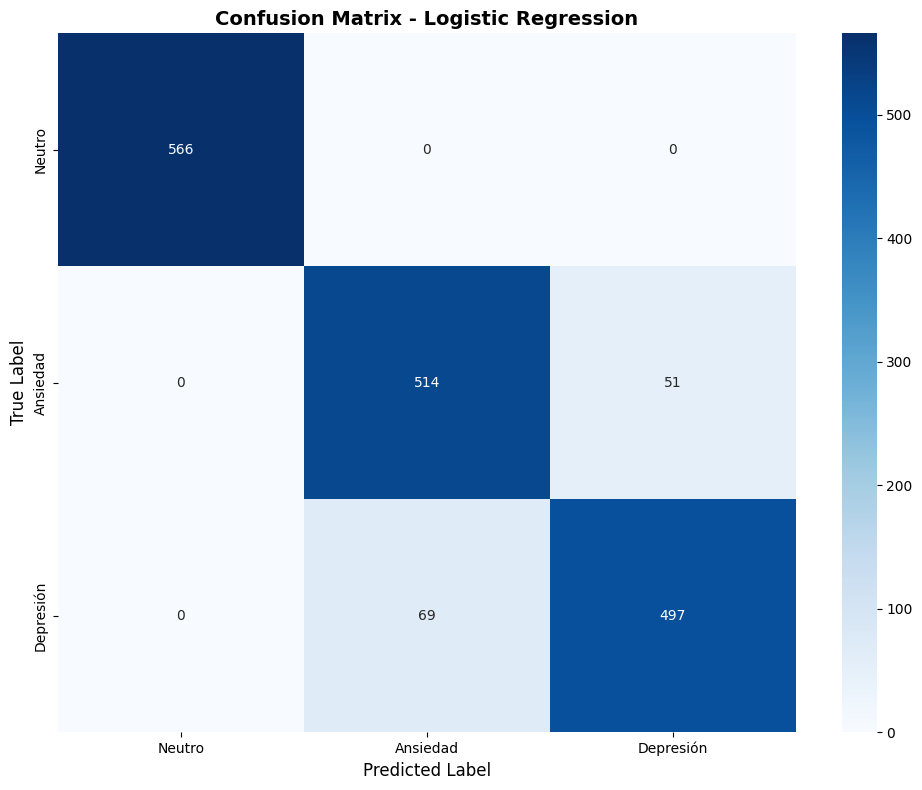


MODELO 2: MULTINOMIAL NAIVE BAYES

Entrenando Naive Bayes...
✓ Modelo entrenado

Evaluando en Validation Set...

RESULTADOS: Naive Bayes (Val)

Métricas Generales:
  Accuracy:  0.8945
  Precision: 0.8952
  Recall:    0.8945
  F1-Score:  0.8944

Métricas por Clase:

  Neutro:
    Precision: 1.0000
    Recall:    1.0000
    F1-Score:  1.0000
    Support:   565

  Ansiedad:
    Precision: 0.8617
    Recall:    0.8145
    F1-Score:  0.8374
    Support:   566

  Depresión:
    Precision: 0.8241
    Recall:    0.8693
    F1-Score:  0.8461
    Support:   566

Evaluando en Test Set...

RESULTADOS: Naive Bayes (Test)

Métricas Generales:
  Accuracy:  0.9028
  Precision: 0.9028
  Recall:    0.9028
  F1-Score:  0.9028

Métricas por Clase:

  Neutro:
    Precision: 1.0000
    Recall:    1.0000
    F1-Score:  1.0000
    Support:   566

  Ansiedad:
    Precision: 0.8584
    Recall:    0.8478
    F1-Score:  0.8531
    Support:   565

  Depresión:
    Precision: 0.8499
    Recall:    0.8604
    F1-Sc

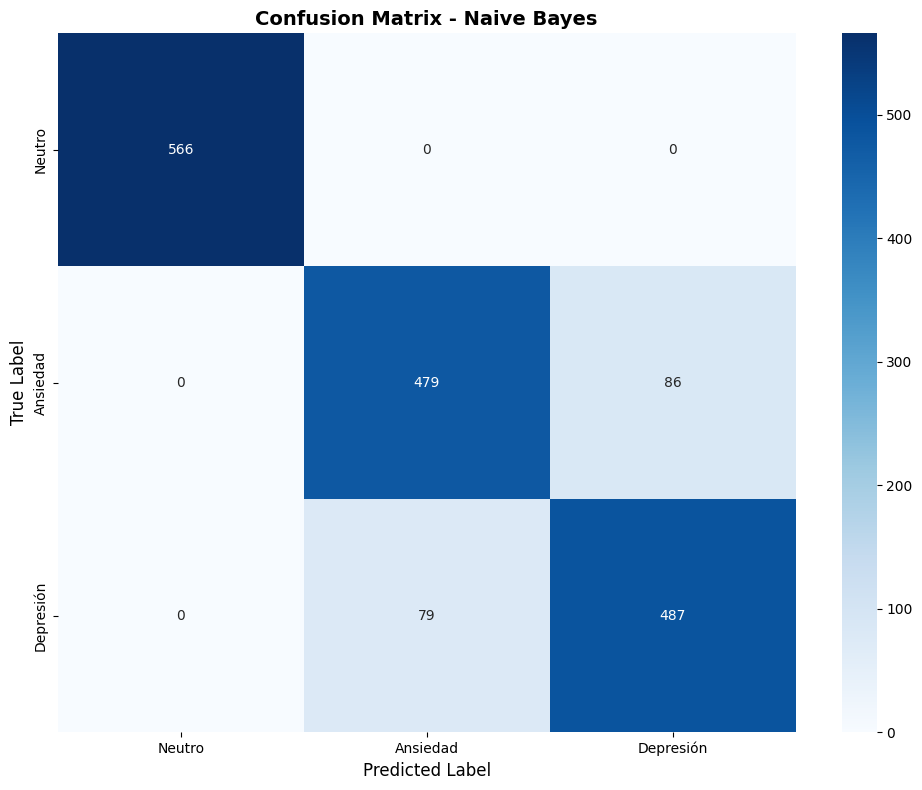


MODELO 3: RANDOM FOREST

Entrenando Random Forest...
✓ Modelo entrenado

Evaluando en Validation Set...

RESULTADOS: Random Forest (Val)

Métricas Generales:
  Accuracy:  0.9175
  Precision: 0.9180
  Recall:    0.9175
  F1-Score:  0.9177

Métricas por Clase:

  Neutro:
    Precision: 1.0000
    Recall:    0.9894
    F1-Score:  0.9947
    Support:   565

  Ansiedad:
    Precision: 0.8855
    Recall:    0.8746
    F1-Score:  0.8800
    Support:   566

  Depresión:
    Precision: 0.8687
    Recall:    0.8887
    F1-Score:  0.8786
    Support:   566

Evaluando en Test Set...

RESULTADOS: Random Forest (Test)

Métricas Generales:
  Accuracy:  0.9204
  Precision: 0.9210
  Recall:    0.9204
  F1-Score:  0.9207

Métricas por Clase:

  Neutro:
    Precision: 0.9910
    Recall:    0.9770
    F1-Score:  0.9840
    Support:   566

  Ansiedad:
    Precision: 0.8918
    Recall:    0.8903
    F1-Score:  0.8911
    Support:   565

  Depresión:
    Precision: 0.8800
    Recall:    0.8940
    F1-Score:

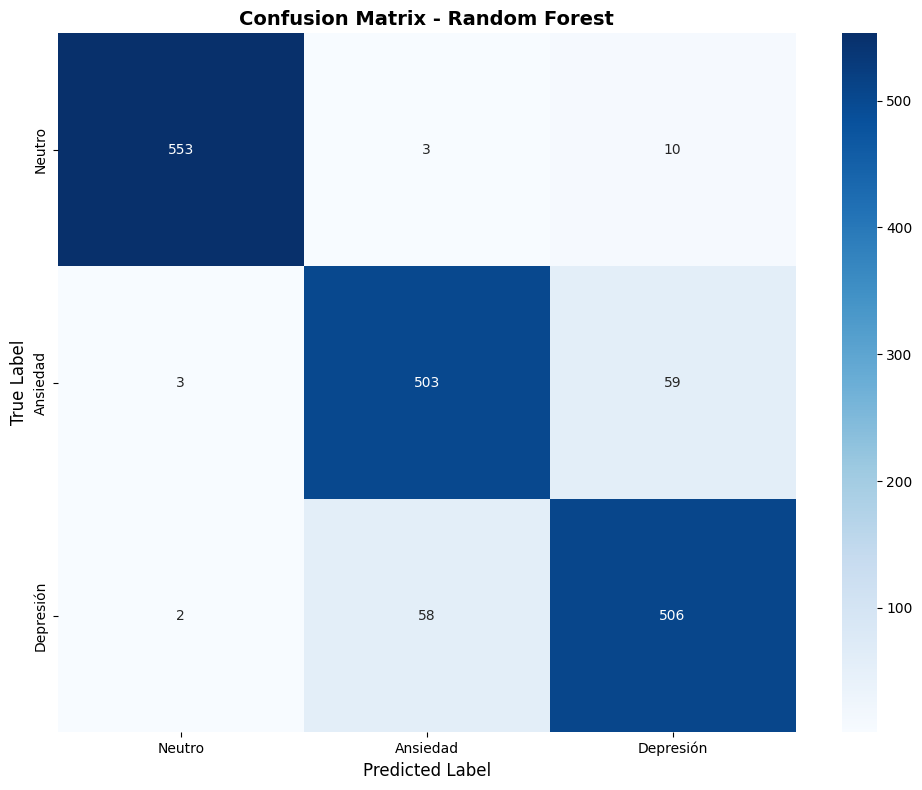


COMPARACIÓN DE MODELOS

--- Comparación en Test Set ---
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.929287   0.929555 0.929287  0.929270
        Naive Bayes  0.902770   0.902805 0.902770  0.902765
      Random Forest  0.920448   0.920978 0.920448  0.920678


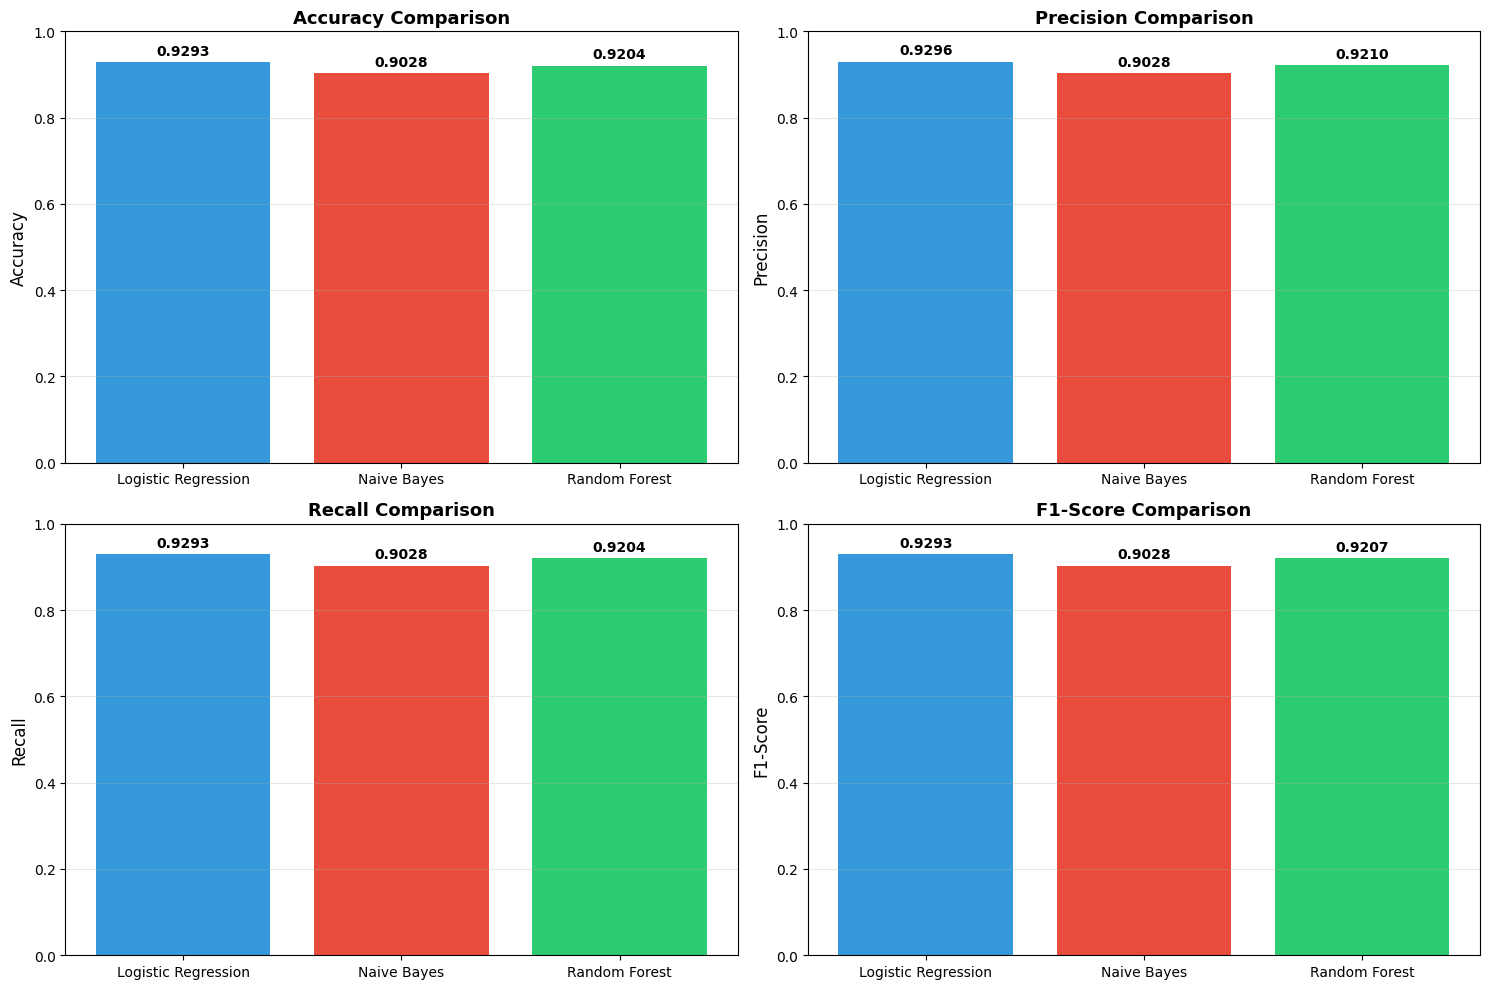


SELECCIÓN DEL MEJOR MODELO

🏆 MEJOR MODELO: Logistic Regression
   F1-Score: 0.9293

GUARDANDO MODELO FINAL
✓ Modelo guardado: /Users/angiediaz/Desktop/Proyecto ML/Models/best_model.pkl
✓ Metadata guardada: /Users/angiediaz/Desktop/Proyecto ML/Models/model_metadata.pkl

GENERANDO REPORTE FINAL
✓ Reporte guardado: /Users/angiediaz/Desktop/Proyecto ML/Results/training_report.txt

✅ ENTRENAMIENTO COMPLETADO

🎯 Resumen:
   • Mejor modelo: Logistic Regression
   • F1-Score: 0.9293
   • Accuracy: 0.9293

📁 Archivos guardados en:
   Models/: /Users/angiediaz/Desktop/Proyecto ML/Models/
   Results/: /Users/angiediaz/Desktop/Proyecto ML/Results/

✅ MODELO LISTO PARA DEPLOYMENT
   Archivos necesarios:
   1. best_model.pkl
   2. tfidf_vectorizer.pkl
   3. model_metadata.pkl

📅 Siguiente fase (22-23 nov):
   → Crear API con Flask
   → Endpoint /predict
   → Integrar con chatbot

🚀 ¡FASE DE ENTRENAMIENTO COMPLETADA!


In [2]:
# ============================================
# CONFIGURACIÓN
# ============================================
TRAIN_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_processed_train.csv"
VAL_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_processed_val.csv"
TEST_FILE = "/Users/angiediaz/Desktop/Proyecto ML/Data/moodbot_processed_test.csv"
OUTPUT_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Models/"
RESULTS_DIR = "/Users/angiediaz/Desktop/Proyecto ML/Results/"

# Crear directorios
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Mapeo de labels
LABEL_NAMES = {
    0: 'Neutro',
    1: 'Ansiedad',
    2: 'Depresión'
}

# Configuración de modelos
RANDOM_STATE = 42

# ============================================
# FUNCIONES AUXILIARES
# ============================================

def plot_confusion_matrix(y_true, y_pred, title, filename):
    """Plotear matriz de confusión"""
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=[LABEL_NAMES[i] for i in range(3)],
                yticklabels=[LABEL_NAMES[i] for i in range(3)])
    plt.title(f'Confusion Matrix - {title}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{RESULTS_DIR}{filename}", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluar modelo con métricas completas"""
    y_pred = model.predict(X_test)
    
    # Métricas básicas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Métricas por clase
    report = classification_report(y_test, y_pred, 
                                   target_names=[LABEL_NAMES[i] for i in range(3)],
                                   output_dict=True)
    
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'report': report,
        'predictions': y_pred
    }
    
    return results

def print_results(results):
    """Imprimir resultados de forma clara"""
    print(f"\n{'='*70}")
    print(f"RESULTADOS: {results['model_name']}")
    print(f"{'='*70}")
    
    print(f"\nMétricas Generales:")
    print(f"  Accuracy:  {results['accuracy']:.4f}")
    print(f"  Precision: {results['precision']:.4f}")
    print(f"  Recall:    {results['recall']:.4f}")
    print(f"  F1-Score:  {results['f1_score']:.4f}")
    
    print(f"\nMétricas por Clase:")
    for label_id, label_name in LABEL_NAMES.items():
        if label_name in results['report']:
            metrics = results['report'][label_name]
            print(f"\n  {label_name}:")
            print(f"    Precision: {metrics['precision']:.4f}")
            print(f"    Recall:    {metrics['recall']:.4f}")
            print(f"    F1-Score:  {metrics['f1-score']:.4f}")
            print(f"    Support:   {int(metrics['support'])}")

# ============================================
# CARGAR DATOS
# ============================================

print("=" * 70)
print("ENTRENAMIENTO DE MODELOS ML - MOODBOT")
print("=" * 70)

print("\n📂 Cargando datasets procesados...")
df_train = pd.read_csv(TRAIN_FILE)
df_val = pd.read_csv(VAL_FILE)
df_test = pd.read_csv(TEST_FILE)

print(f"✓ Train: {len(df_train)} muestras")
print(f"✓ Val:   {len(df_val)} muestras")
print(f"✓ Test:  {len(df_test)} muestras")

# Preparar datos
X_train = df_train['text'].values
y_train = df_train['label'].values

X_val = df_val['text'].values
y_val = df_val['label'].values

X_test = df_test['text'].values
y_test = df_test['label'].values

print("\n--- Distribución de Labels ---")
print("\nTrain:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nValidation:")
print(pd.Series(y_val).value_counts().sort_index())
print("\nTest:")
print(pd.Series(y_test).value_counts().sort_index())

# ============================================
# VECTORIZACIÓN TF-IDF
# ============================================

print("\n" + "=" * 70)
print("VECTORIZACIÓN TF-IDF")
print("=" * 70)

print("\nCreando vectorizador TF-IDF...")
vectorizer = TfidfVectorizer(
    max_features=5000,      # Top 5000 palabras más importantes
    min_df=2,               # Palabra debe aparecer en al menos 2 documentos
    max_df=0.8,             # Palabra no puede estar en más del 80% de documentos
    ngram_range=(1, 2),     # Unigramas y bigramas
    sublinear_tf=True       # Escala logarítmica para TF
)

print("Ajustando vectorizador con training data...")
X_train_tfidf = vectorizer.fit_transform(X_train)
print(f"✓ Matriz TF-IDF (train): {X_train_tfidf.shape}")

print("Transformando validation y test data...")
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)
print(f"✓ Matriz TF-IDF (val):   {X_val_tfidf.shape}")
print(f"✓ Matriz TF-IDF (test):  {X_test_tfidf.shape}")

# Top features
feature_names = vectorizer.get_feature_names_out()
print(f"\n✓ Vocabulario: {len(feature_names)} features")
print(f"  Ejemplos: {', '.join(feature_names[:10])}...")

# Guardar vectorizador
vectorizer_path = f"{OUTPUT_DIR}tfidf_vectorizer.pkl"
joblib.dump(vectorizer, vectorizer_path)
print(f"\n✓ Vectorizador guardado: {vectorizer_path}")

# ============================================
# MODELO 1: LOGISTIC REGRESSION
# ============================================

print("\n" + "=" * 70)
print("MODELO 1: LOGISTIC REGRESSION")
print("=" * 70)

print("\nEntrenando Logistic Regression...")
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=RANDOM_STATE,
    class_weight='balanced',  # Maneja desbalance automáticamente
    solver='lbfgs',
    multi_class='multinomial'
)

lr_model.fit(X_train_tfidf, y_train)
print("✓ Modelo entrenado")

# Evaluar en validation
print("\nEvaluando en Validation Set...")
lr_val_results = evaluate_model(lr_model, X_val_tfidf, y_val, "Logistic Regression (Val)")
print_results(lr_val_results)

# Evaluar en test
print("\nEvaluando en Test Set...")
lr_test_results = evaluate_model(lr_model, X_test_tfidf, y_test, "Logistic Regression (Test)")
print_results(lr_test_results)

# Confusion matrix
plot_confusion_matrix(y_test, lr_test_results['predictions'], 
                     "Logistic Regression", 
                     "confusion_matrix_logistic_regression.png")

# ============================================
# MODELO 2: NAIVE BAYES
# ============================================

print("\n" + "=" * 70)
print("MODELO 2: MULTINOMIAL NAIVE BAYES")
print("=" * 70)

print("\nEntrenando Naive Bayes...")
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_tfidf, y_train)
print("✓ Modelo entrenado")

# Evaluar en validation
print("\nEvaluando en Validation Set...")
nb_val_results = evaluate_model(nb_model, X_val_tfidf, y_val, "Naive Bayes (Val)")
print_results(nb_val_results)

# Evaluar en test
print("\nEvaluando en Test Set...")
nb_test_results = evaluate_model(nb_model, X_test_tfidf, y_test, "Naive Bayes (Test)")
print_results(nb_test_results)

# Confusion matrix
plot_confusion_matrix(y_test, nb_test_results['predictions'],
                     "Naive Bayes",
                     "confusion_matrix_naive_bayes.png")

# ============================================
# MODELO 3: RANDOM FOREST (Opcional)
# ============================================

print("\n" + "=" * 70)
print("MODELO 3: RANDOM FOREST")
print("=" * 70)

print("\nEntrenando Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=RANDOM_STATE,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train_tfidf, y_train)
print("✓ Modelo entrenado")

# Evaluar en validation
print("\nEvaluando en Validation Set...")
rf_val_results = evaluate_model(rf_model, X_val_tfidf, y_val, "Random Forest (Val)")
print_results(rf_val_results)

# Evaluar en test
print("\nEvaluando en Test Set...")
rf_test_results = evaluate_model(rf_model, X_test_tfidf, y_test, "Random Forest (Test)")
print_results(rf_test_results)

# Confusion matrix
plot_confusion_matrix(y_test, rf_test_results['predictions'],
                     "Random Forest",
                     "confusion_matrix_random_forest.png")

# ============================================
# COMPARACIÓN DE MODELOS
# ============================================

print("\n" + "=" * 70)
print("COMPARACIÓN DE MODELOS")
print("=" * 70)

# Tabla comparativa
comparison_data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [
        lr_test_results['accuracy'],
        nb_test_results['accuracy'],
        rf_test_results['accuracy']
    ],
    'Precision': [
        lr_test_results['precision'],
        nb_test_results['precision'],
        rf_test_results['precision']
    ],
    'Recall': [
        lr_test_results['recall'],
        nb_test_results['recall'],
        rf_test_results['recall']
    ],
    'F1-Score': [
        lr_test_results['f1_score'],
        nb_test_results['f1_score'],
        rf_test_results['f1_score']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n--- Comparación en Test Set ---")
print(comparison_df.to_string(index=False))

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = comparison_df[metric].values
    bars = ax.bar(comparison_df['Model'], values, color=['#3498db', '#e74c3c', '#2ecc71'])
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir valores en barras
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ============================================
# SELECCIONAR MEJOR MODELO
# ============================================

print("\n" + "=" * 70)
print("SELECCIÓN DEL MEJOR MODELO")
print("=" * 70)

# Determinar mejor modelo por F1-Score
best_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_f1 = comparison_df.loc[best_idx, 'F1-Score']

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")

# Seleccionar el modelo ganador
if best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_results = lr_test_results
elif best_model_name == 'Naive Bayes':
    best_model = nb_model
    best_results = nb_test_results
else:
    best_model = rf_model
    best_results = rf_test_results

# ============================================
# GUARDAR MEJOR MODELO
# ============================================

print("\n" + "=" * 70)
print("GUARDANDO MODELO FINAL")
print("=" * 70)

# Guardar modelo
model_path = f"{OUTPUT_DIR}best_model.pkl"
joblib.dump(best_model, model_path)
print(f"✓ Modelo guardado: {model_path}")

# Guardar metadata
metadata = {
    'model_name': best_model_name,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'accuracy': best_results['accuracy'],
    'precision': best_results['precision'],
    'recall': best_results['recall'],
    'f1_score': best_results['f1_score'],
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'vocabulary_size': len(feature_names),
    'label_mapping': LABEL_NAMES
}

metadata_path = f"{OUTPUT_DIR}model_metadata.pkl"
joblib.dump(metadata, metadata_path)
print(f"✓ Metadata guardada: {metadata_path}")

# ============================================
# REPORTE FINAL
# ============================================

print("\n" + "=" * 70)
print("GENERANDO REPORTE FINAL")
print("=" * 70)

report = f"""
{'='*70}
REPORTE DE ENTRENAMIENTO - MOODBOT
{'='*70}

FECHA: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*70}
1. DATASET
{'='*70}

Training:   {len(df_train)} muestras
Validation: {len(df_val)} muestras
Test:       {len(df_test)} muestras
Total:      {len(df_train) + len(df_val) + len(df_test)} muestras

Distribución de Labels (Test):
{pd.Series(y_test).value_counts().sort_index().to_string()}

{'='*70}
2. VECTORIZACIÓN
{'='*70}

Método: TF-IDF
Features: {len(feature_names)}
Max Features: 5000
N-grams: (1, 2) - unigramas y bigramas
Min DF: 2
Max DF: 0.8

{'='*70}
3. MODELOS ENTRENADOS
{'='*70}

{comparison_df.to_string(index=False)}

{'='*70}
4. MEJOR MODELO
{'='*70}

Modelo Seleccionado: {best_model_name}

Métricas en Test Set:
- Accuracy:  {best_results['accuracy']:.4f}
- Precision: {best_results['precision']:.4f}
- Recall:    {best_results['recall']:.4f}
- F1-Score:  {best_results['f1_score']:.4f}

Métricas por Clase:
"""

for label_id, label_name in LABEL_NAMES.items():
    if label_name in best_results['report']:
        metrics = best_results['report'][label_name]
        report += f"""
{label_name}:
  Precision: {metrics['precision']:.4f}
  Recall:    {metrics['recall']:.4f}
  F1-Score:  {metrics['f1-score']:.4f}
  Support:   {int(metrics['support'])}
"""

report += f"""
{'='*70}
5. ARCHIVOS GENERADOS
{'='*70}

Modelos:
- {model_path}
- {vectorizer_path}
- {metadata_path}

Visualizaciones:
- {RESULTS_DIR}confusion_matrix_logistic_regression.png
- {RESULTS_DIR}confusion_matrix_naive_bayes.png
- {RESULTS_DIR}confusion_matrix_random_forest.png
- {RESULTS_DIR}model_comparison.png

{'='*70}
6. PRÓXIMOS PASOS
{'='*70}

✓ Modelo entrenado y guardado
✓ Listo para deployment

Siguiente fase (22-23 nov):
1. Crear API con Flask/FastAPI
2. Endpoint /predict
3. Integrar con frontend (Vercel)

Para deployment necesitarás:
- best_model.pkl
- tfidf_vectorizer.pkl
- model_metadata.pkl

{'='*70}
FIN DEL REPORTE
{'='*70}
"""

report_path = f"{RESULTS_DIR}training_report.txt"
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Reporte guardado: {report_path}")

# ============================================
# RESUMEN FINAL
# ============================================

print("\n" + "=" * 70)
print("✅ ENTRENAMIENTO COMPLETADO")
print("=" * 70)

print(f"\n🎯 Resumen:")
print(f"   • Mejor modelo: {best_model_name}")
print(f"   • F1-Score: {best_f1:.4f}")
print(f"   • Accuracy: {best_results['accuracy']:.4f}")

print(f"\n📁 Archivos guardados en:")
print(f"   Models/: {OUTPUT_DIR}")
print(f"   Results/: {RESULTS_DIR}")

print(f"\n✅ MODELO LISTO PARA DEPLOYMENT")
print(f"   Archivos necesarios:")
print(f"   1. best_model.pkl")
print(f"   2. tfidf_vectorizer.pkl")
print(f"   3. model_metadata.pkl")

print(f"\n📅 Siguiente fase (22-23 nov):")
print(f"   → Crear API con Flask")
print(f"   → Endpoint /predict")
print(f"   → Integrar con chatbot")

print("\n" + "=" * 70)
print("🚀 ¡FASE DE ENTRENAMIENTO COMPLETADA!")
print("=" * 70)